Proyecto de Análisis de Datos
============

***Rendimiento Académico*** \
**Autores:**
- *Henri Gerard Gabert Hidalgo - B93096*
- *José Eduardo López Corella - C24343*
- *Juan Pablo Morgan Sandí - C15319*



In [1]:
# Tratamiento de advertencias

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# Lectura de datos

In [2]:
from ucimlrepo import fetch_ucirepo

  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 

df_mat = pd.read_excel('data/student-mat.xlsx')
df_por = pd.read_excel('data/student-por.xlsx')

# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
print(df_mat)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
pd.set_option('display.max_columns', None)
df_mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         6   5   6   6  
1     1       3         4   5   5   6  
2     3       3        10   7   8  10  
3     1       5         2  15  14  15  
4     2       5         4   6  10  10

In [4]:
# Mostrar información de los datos
df_por.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  
0     1       3         4   0  11  11  
1     1       3         2   9  11  11  
2     3       3         6  12  13  12  
3     1       5         0  14  14  14  
4     2       5         0  11  13  13

In [5]:

df_mat[[df_mat.columns[2], df_mat.columns[-1]]].describe()

age          G3
count  395.000000  395.000000
mean    16.696203   10.415190
std      1.276043    4.581443
min     15.000000    0.000000
25%     16.000000    8.000000
50%     17.000000   11.000000
75%     18.000000   14.000000
max     22.000000   20.000000

In [6]:
df_por[[df_por.columns[2], df_por.columns[-1]]].describe()

age          G3
count  649.000000  649.000000
mean    16.744222   11.906009
std      1.218138    3.230656
min     15.000000    0.000000
25%     16.000000   10.000000
50%     17.000000   12.000000
75%     18.000000   14.000000
max     22.000000   19.000000

##  Valores atípicos 

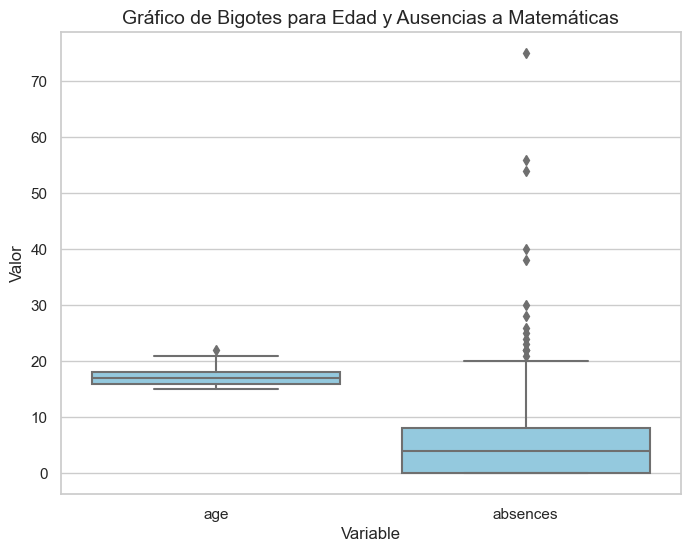

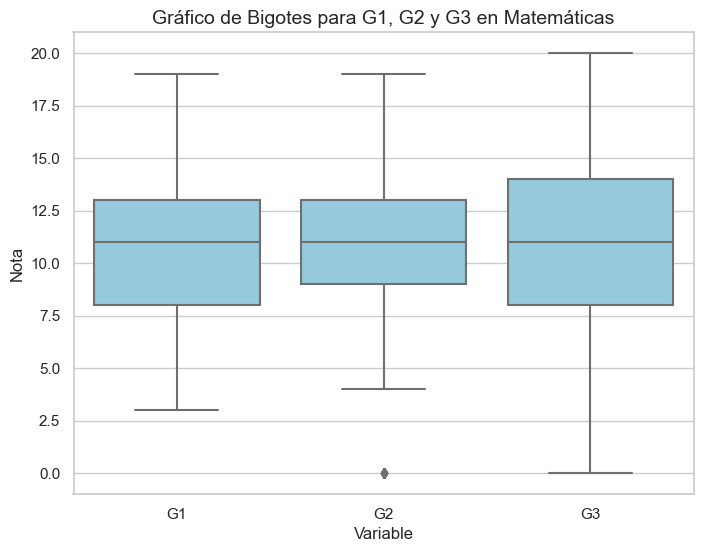

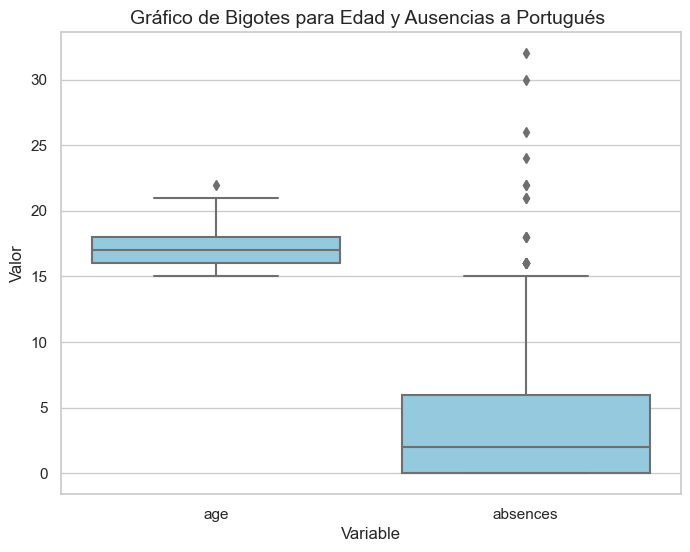

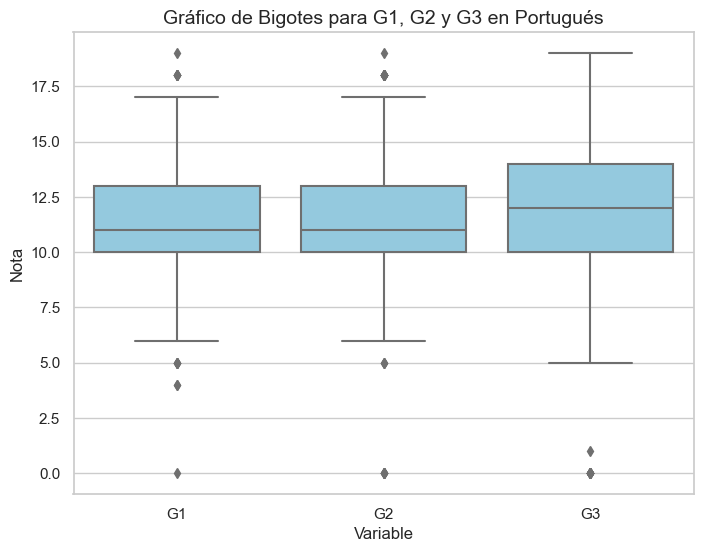

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer los datos
d1 = pd.read_csv("data/student-mat.csv", sep=";")
d2 = pd.read_csv("data/student-por.csv", sep=";")
  


# Configurar el gráfico con seaborn
sns.set(style="whitegrid")

# Seleccionar las columnas que quieres graficar
columnas = ['age', 'absences']
data = d1[columnas]

# Convertir el DataFrame a formato largo para Seaborn
df_melted = data.melt(var_name='Variable', value_name='Valor')

# Crear el gráfico de bigotes vertical para 'age' y 'absences'
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x='Variable', y='Valor', data=df_melted, color="skyblue")

# Agregar título y etiquetas
plt.title('Gráfico de Bigotes para Edad y Ausencias a Matemáticas', fontsize=14)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Valor', fontsize=12)

plt.savefig('boxplot_Edad_Ausencias_mate.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()


# Configurar el gráfico con seaborn
sns.set(style="whitegrid")

# Seleccionar las columnas que quieres graficar
columnas_y = ['G1', 'G2', 'G3']
data_y = d1[columnas_y]

# Convertir el DataFrame a formato largo para Seaborn
df_y_melted = data_y.melt(var_name='Variable', value_name='Valor')

# Crear el gráfico de bigotes vertical para G1, G2 y G3
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x='Variable', y='Valor', data=df_y_melted, color="skyblue")

# Agregar título y etiquetas
plt.title('Gráfico de Bigotes para G1, G2 y G3 en Matemáticas', fontsize=14)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Nota', fontsize=12)

plt.savefig('boxplot_G1_G2_G3_mate.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


# Configurar el gráfico con seaborn
sns.set(style="whitegrid")

# Seleccionar las columnas que quieres graficar
columnas = ['age', 'absences']
data = d2[columnas]

# Convertir el DataFrame a formato largo para Seaborn
df_melted = data.melt(var_name='Variable', value_name='Valor')

# Crear el gráfico de bigotes vertical para 'age' y 'absences'
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x='Variable', y='Valor', data=df_melted, color="skyblue")

# Agregar título y etiquetas
plt.title('Gráfico de Bigotes para Edad y Ausencias a Portugués ', fontsize=14)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Valor', fontsize=12)

plt.savefig('boxplot_Edad_Ausencias.png', dpi=300, bbox_inches='tight')
# Mostrar el gráfico
plt.show()


# Configurar el gráfico con seaborn
sns.set(style="whitegrid")

# Seleccionar las columnas que quieres graficar
columnas_y = ['G1', 'G2', 'G3']
data_y = d2[columnas_y]

# Convertir el DataFrame a formato largo para Seaborn
df_y_melted = data_y.melt(var_name='Variable', value_name='Valor')

# Crear el gráfico de bigotes vertical para G1, G2 y G3
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x='Variable', y='Valor', data=df_y_melted, color="skyblue")

# Agregar título y etiquetas
plt.title('Gráfico de Bigotes para G1, G2 y G3 en Portugués', fontsize=14)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Nota', fontsize=12)

plt.savefig('boxplot_G1_G2_G3.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

## Funciones de gráficos

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# LISTA DE VARIABLES CUANTITATIVAS 
variables_cuantitativas = ['age', 'absences']

# Función para crear gráfico de distribución para una variable
def grafico_distribucion(variable, data):
    plt.figure(figsize=(10, 6))
    
    # Histograma + KDE
    sns.histplot(data[variable], kde=True, color='skyblue', bins=30)
    
    # Añadir línea de media
    mean_val = data[variable].mean()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {mean_val:.2f}')
    
    # Añadir línea de mediana
    median_val = data[variable].median()
    plt.axvline(median_val, color='green', linestyle='--', linewidth=2, 
                label=f'Mediana: {median_val:.2f}')
    
    # Personalización
    plt.title(f'Distribución de {variable}', fontsize=16)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend()
    plt.show()

<Figure size 1000x600 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumimos que df es tu DataFrame
# df = pd.read_csv('tus_datos.csv')

# Configuración estética
sns.set(style="whitegrid")

# Lista de variables categóricas (reemplaza con las tuyas)
variables_categoricas = ['sex','address', 'famsize', 'Pstatus','Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 
                        'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
                        'activities','nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'] 

# Función para crear gráficos de distribución categórica
def grafico_categorico(variable, dff, max_categorias=10):
    # Crear figura con dos subplots
    plt.figure(figsize=(15, 6))
    
    # Gráfico de barras (countplot)
    plt.subplot(1, 2, 1)
    if dff[variable].nunique() > max_categorias:
        # Si hay muchas categorías, mostrar solo las principales
        top_categories = dff[variable].value_counts().nlargest(max_categorias).index
        data = dff[dff[variable].isin(top_categories)]
        sns.countplot(data=data, y=variable, order=top_categories, palette="viridis")
        plt.title(f'Top {max_categorias} categorías de {variable}')
    else:
        sns.countplot(data=dff, y=variable, palette="viridis")
        plt.title(f'Distribución de {variable}')
    plt.xlabel('Frecuencia')
    
    # Gráfico de torta (solo si no hay muchas categorías)
    plt.subplot(1, 2, 2)
    if dff[variable].nunique() <= 8:  # Solo hacer pie chart para pocas categorías
        counts = dff[variable].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette("pastel"))
        plt.title(f'Proporción de {variable}')
        plt.axis('equal')  # Para que el círculo sea perfecto
    else:
        plt.text(0.5, 0.5, f'Demasiadas categorías\n({dff[variable].nunique()})', 
                ha='center', va='center')
        plt.axis('off')  # Ocultar ejes
    
    plt.tight_layout()
    plt.show()



# Gráficos

## Gráficos para matemáticas

### Gráficos de distribución

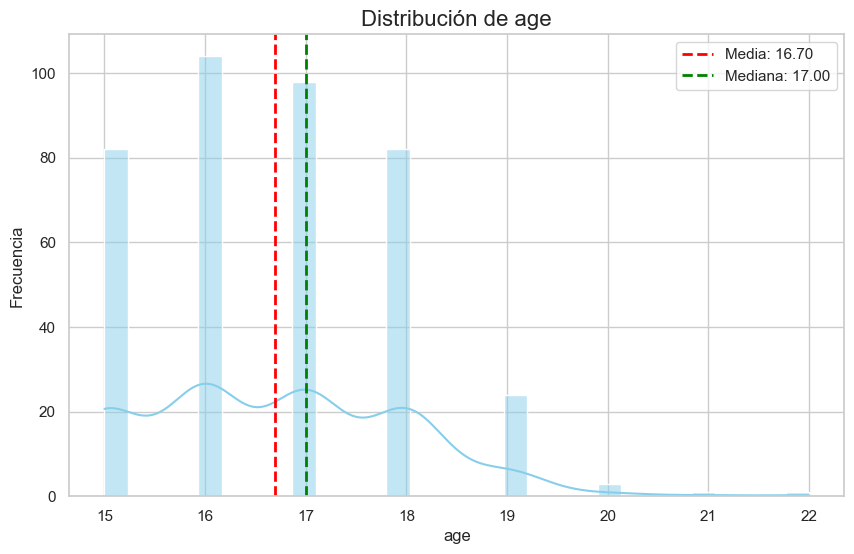

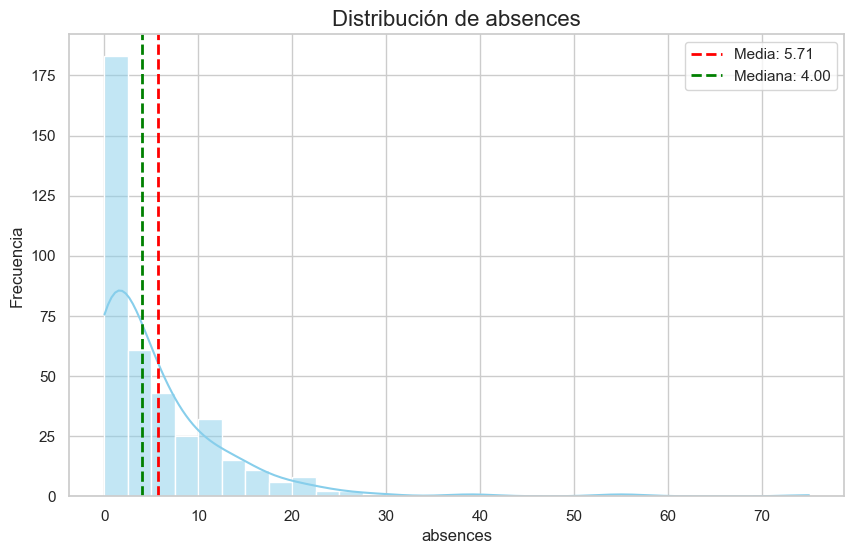

In [10]:
# Ejemplo de uso (para cada variable)
for variable in variables_cuantitativas:
    grafico_distribucion(variable, df_mat)

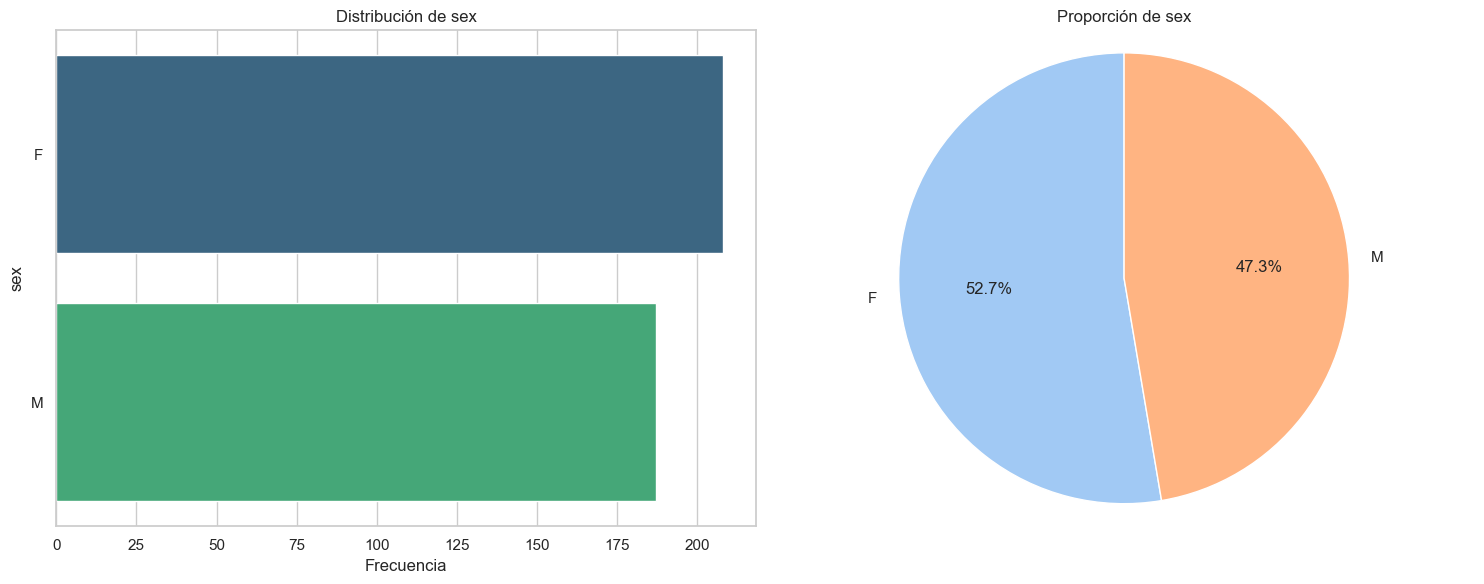

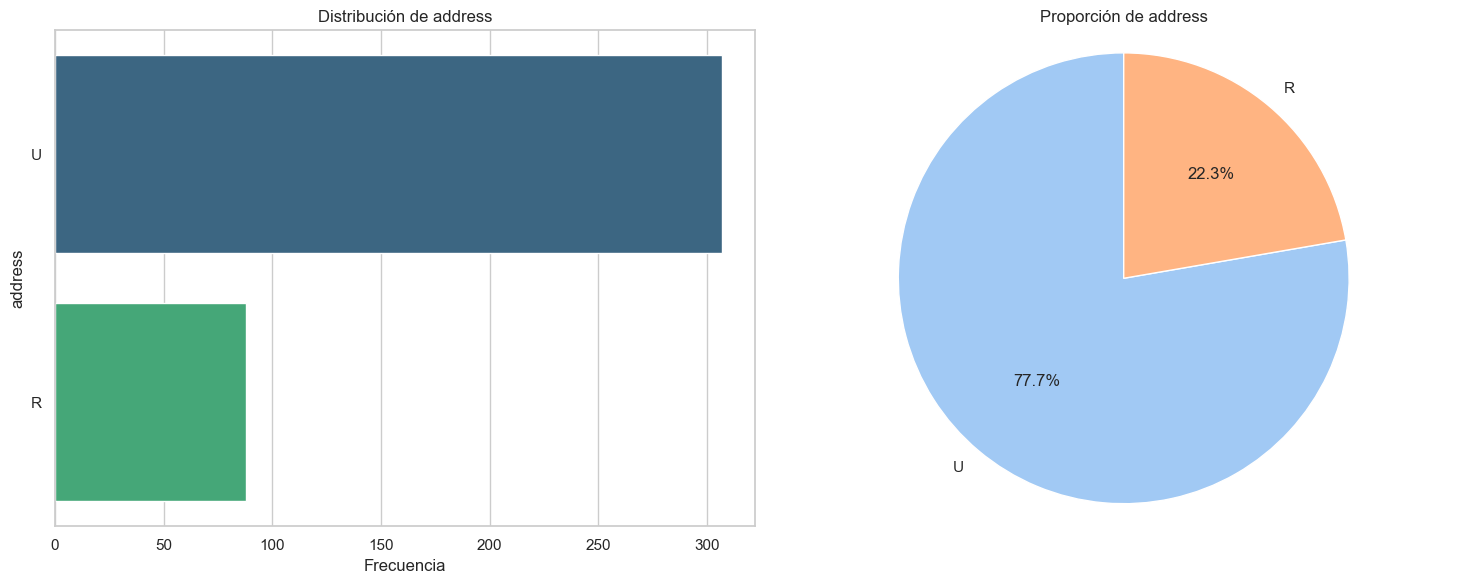

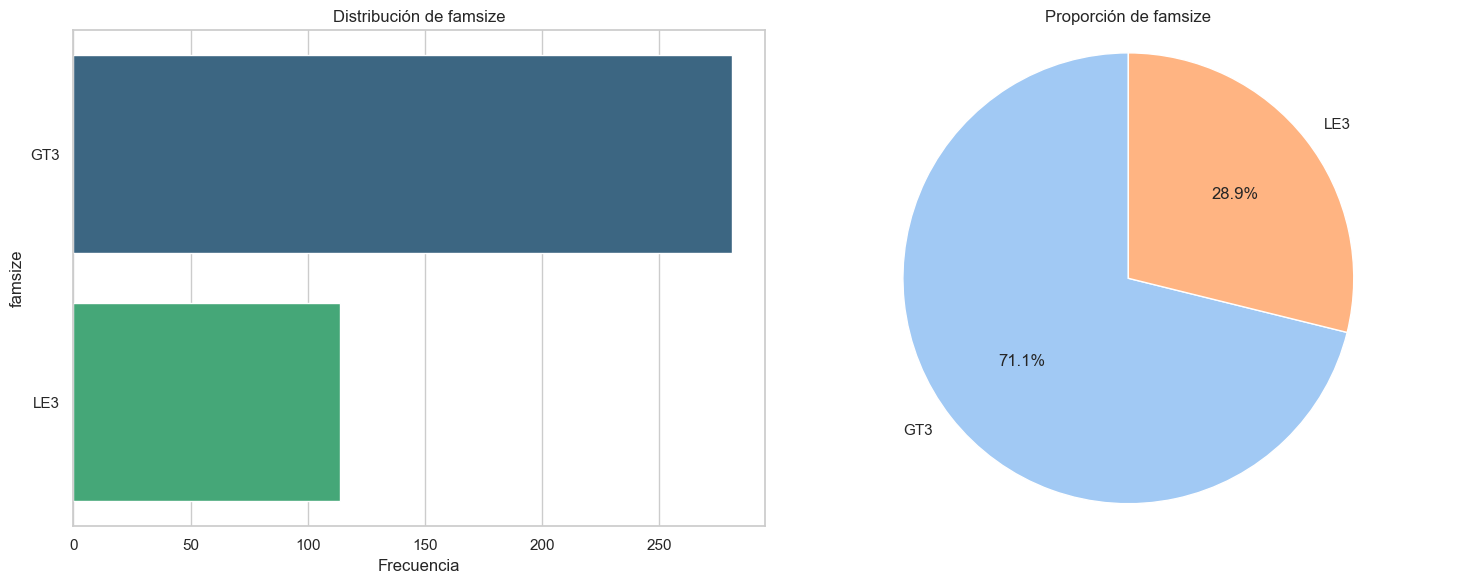

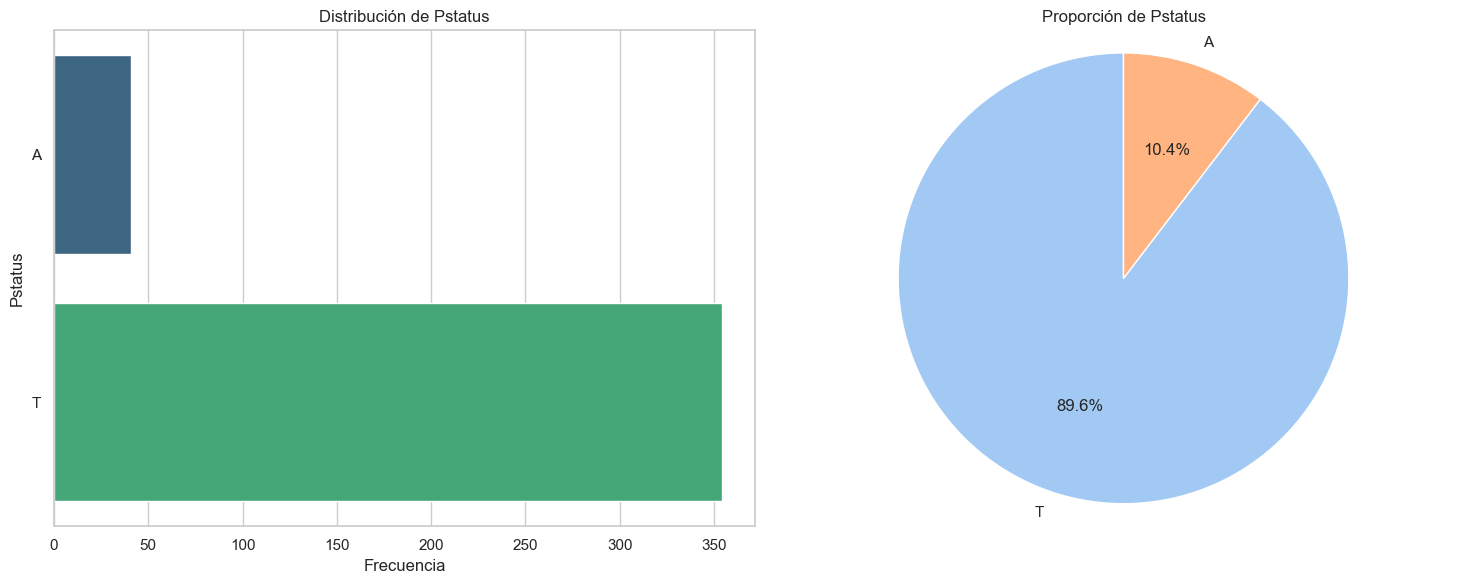

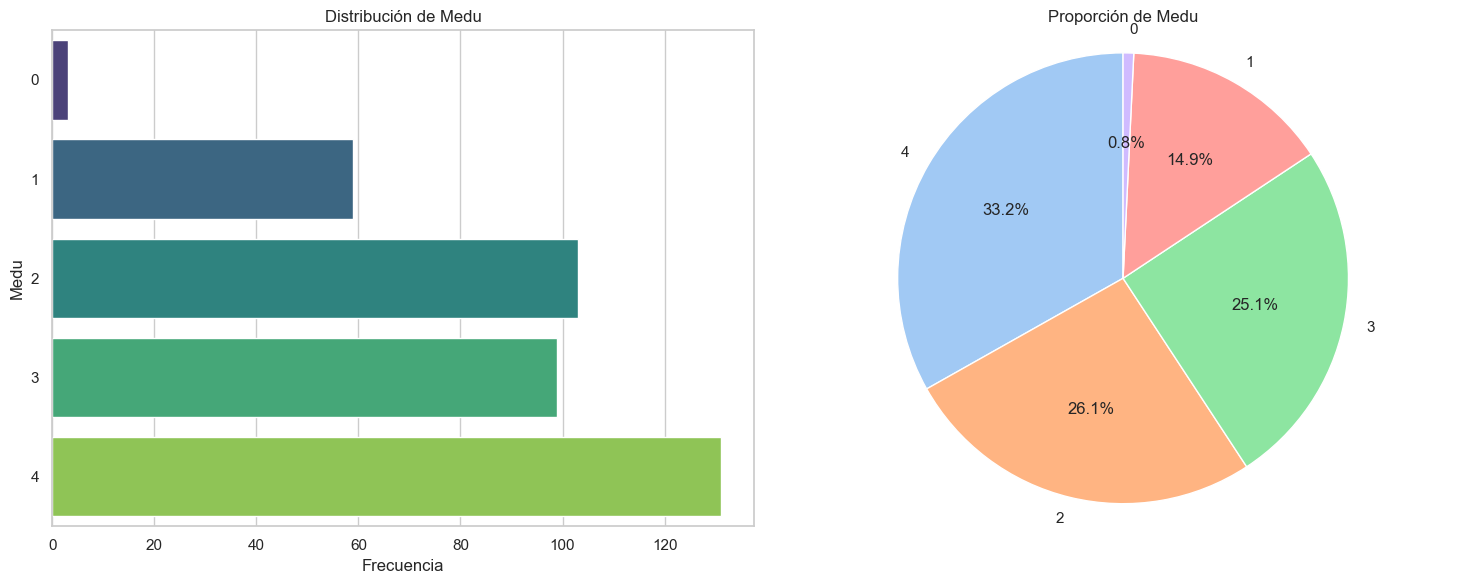

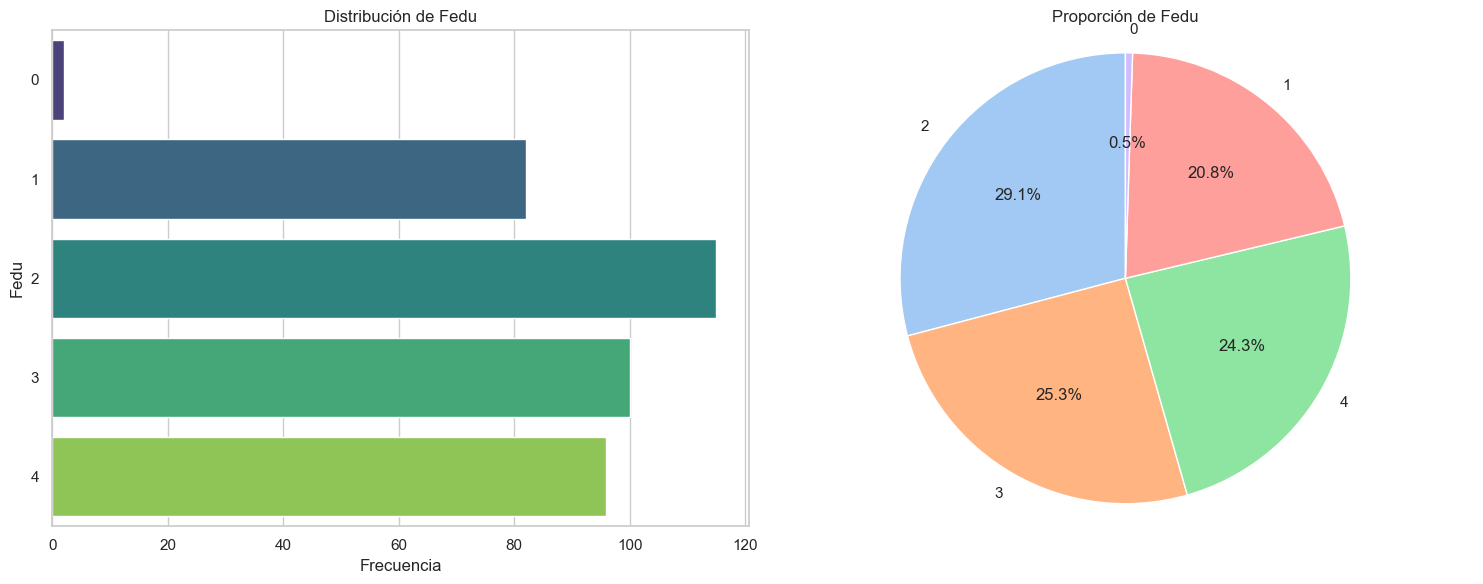

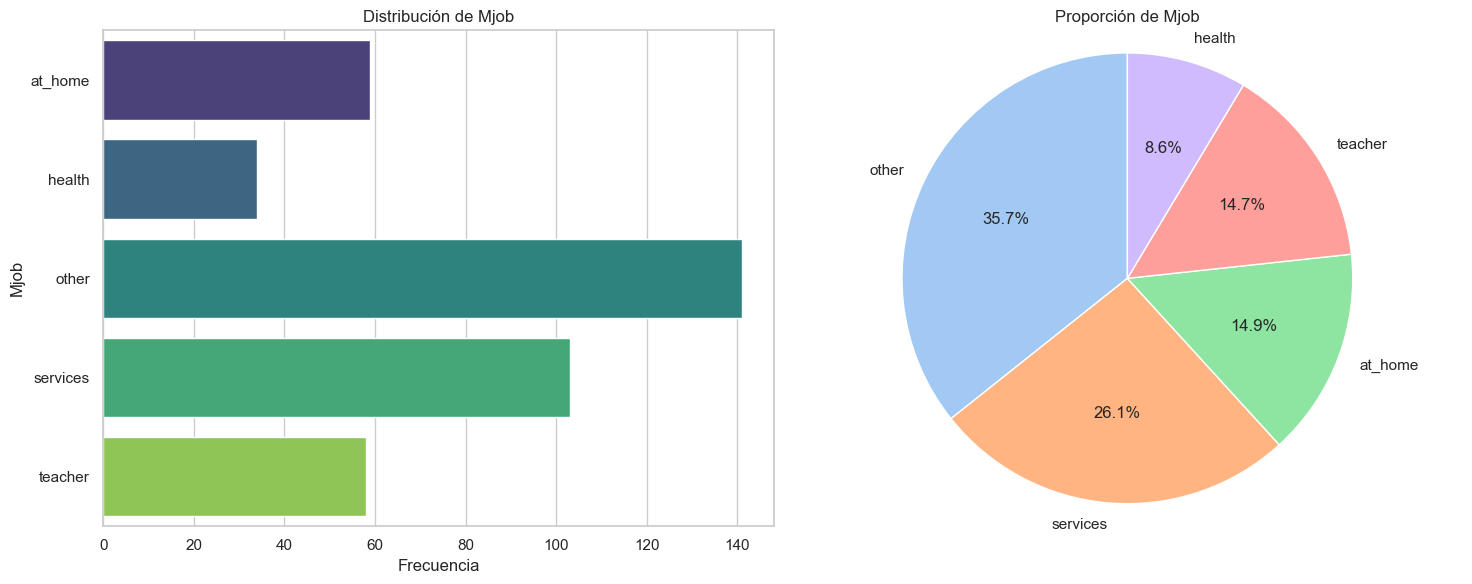

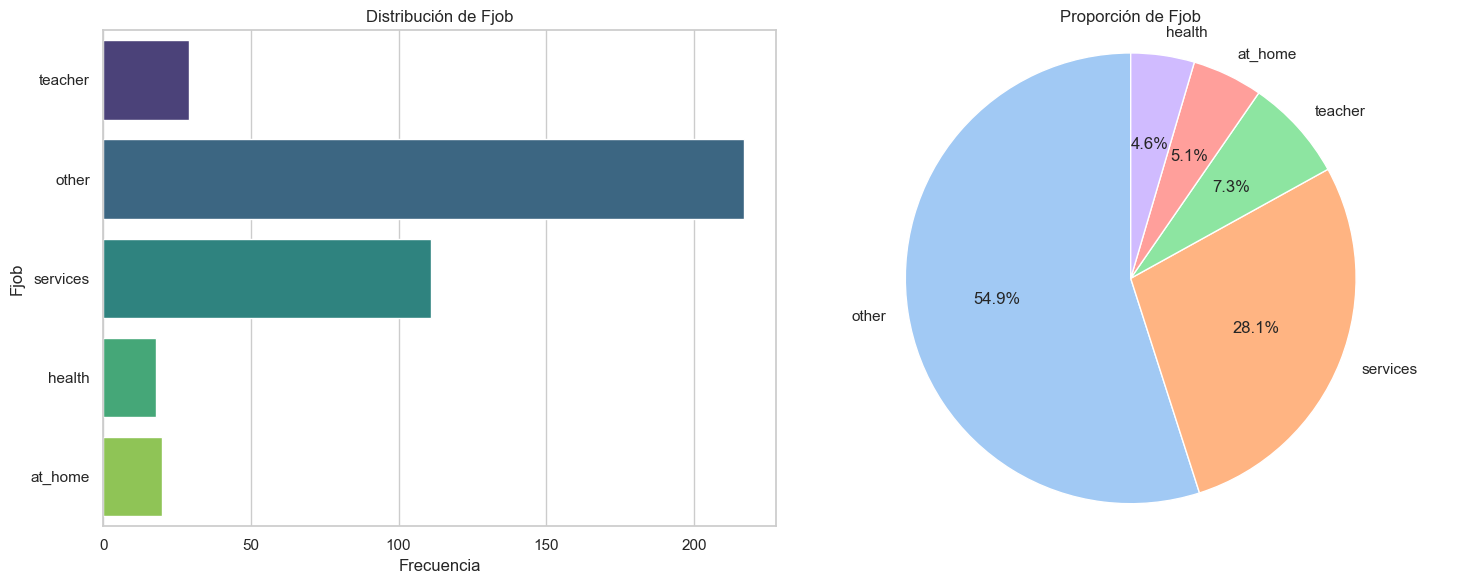

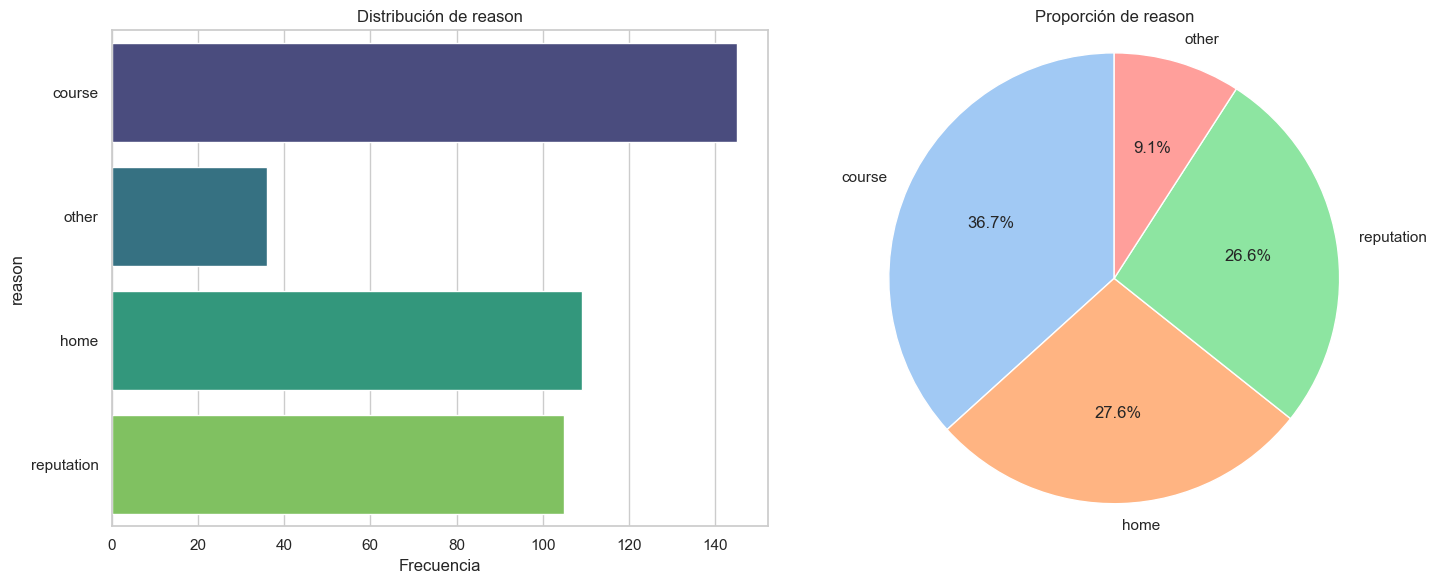

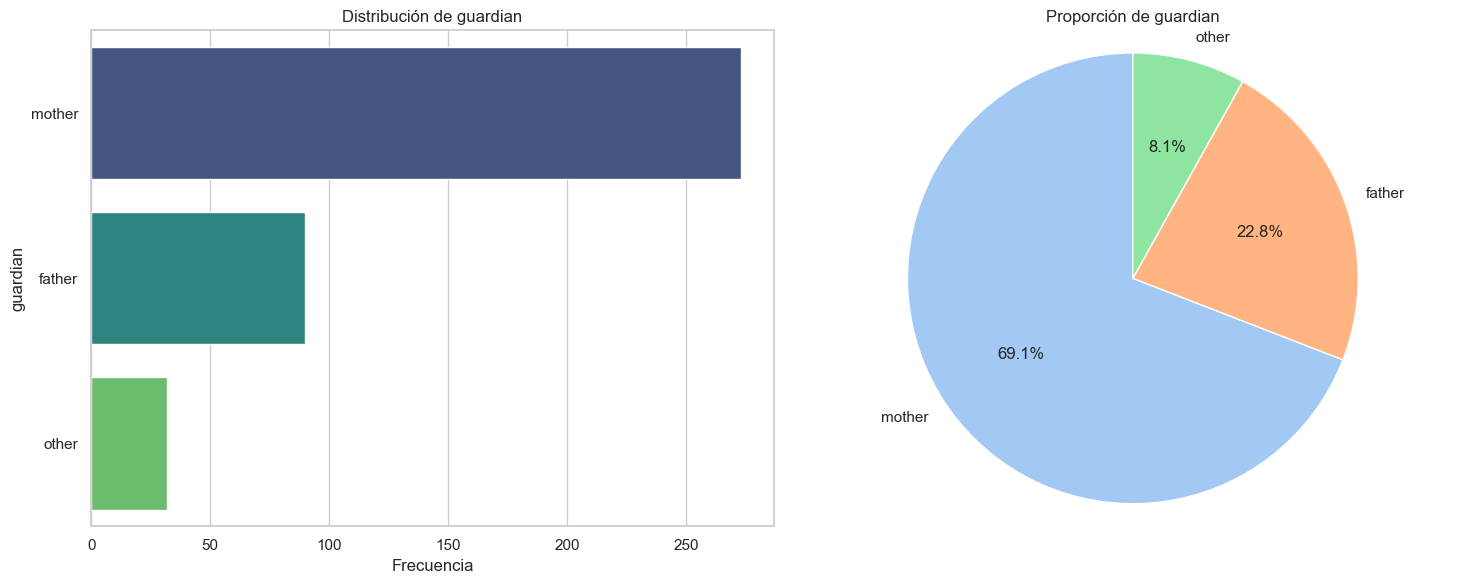

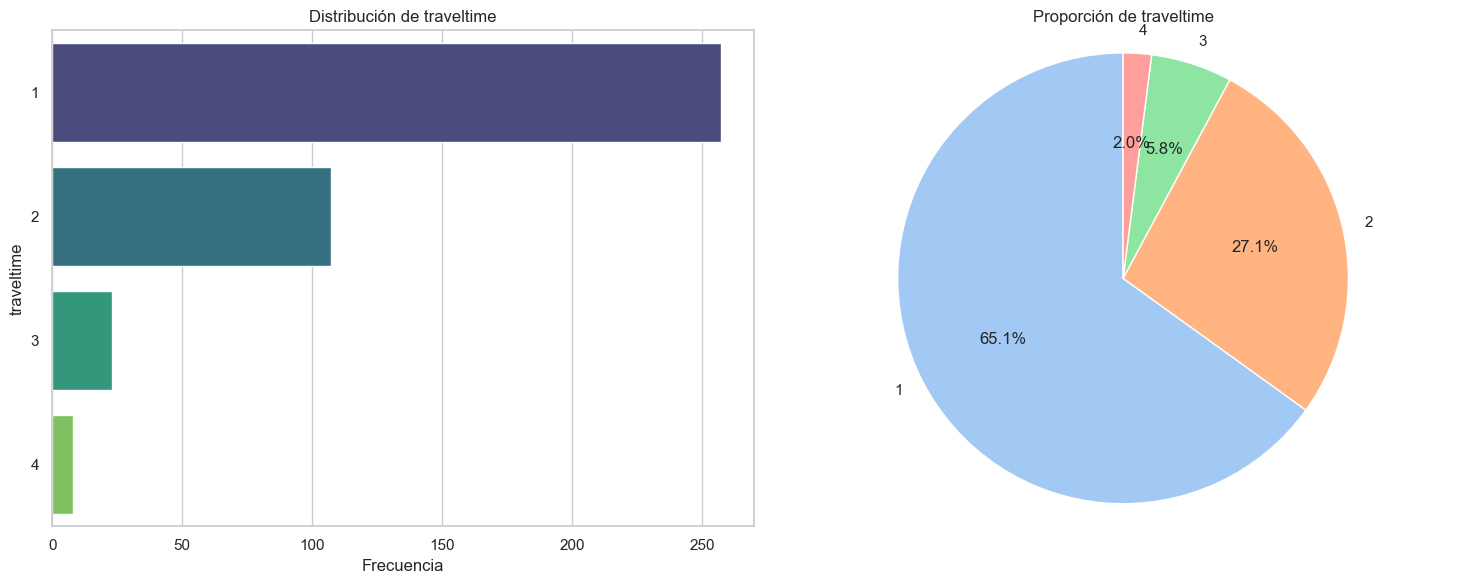

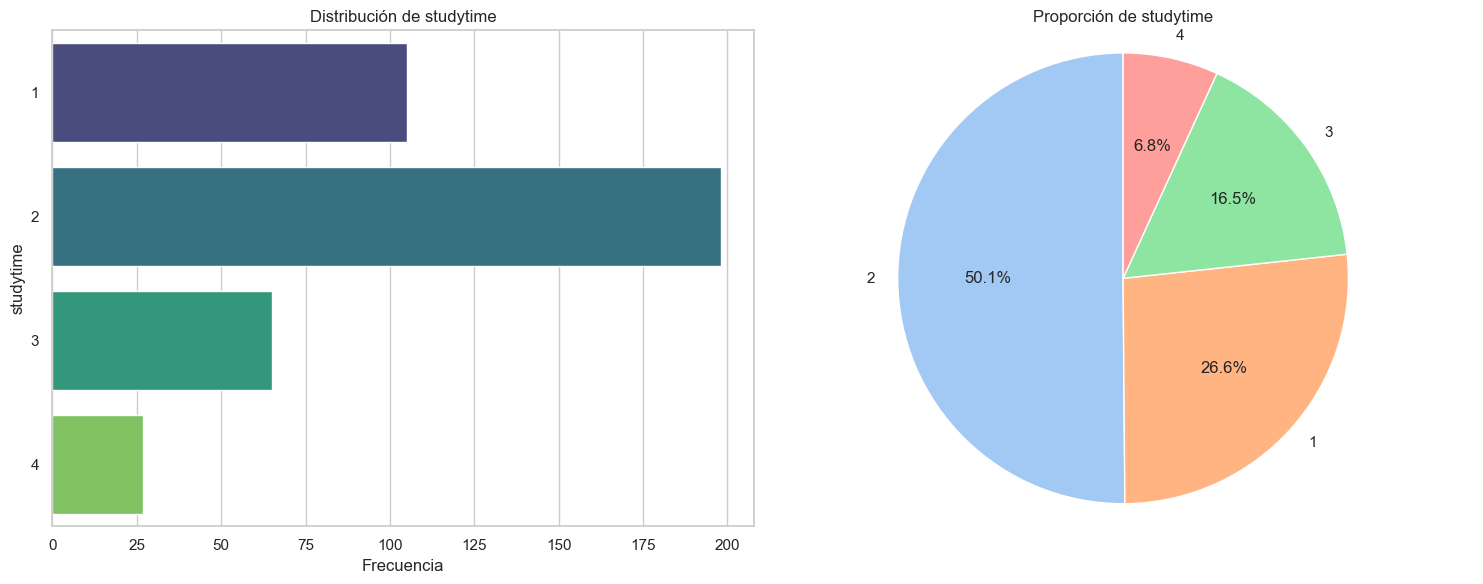

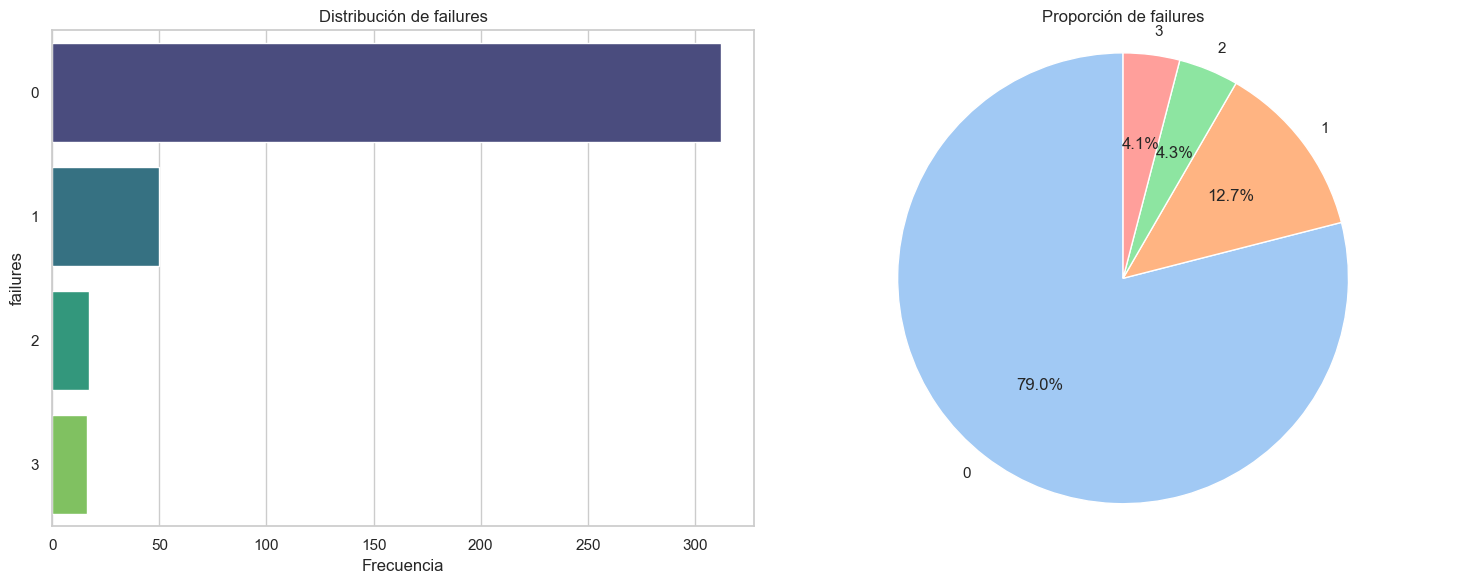

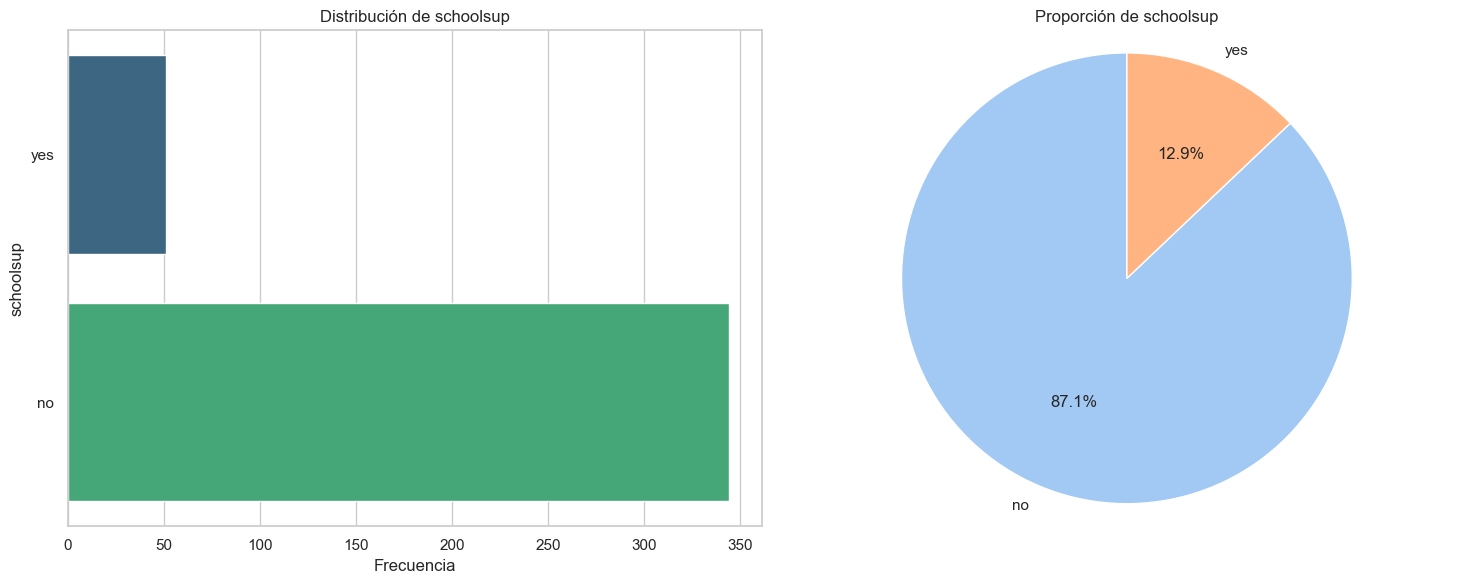

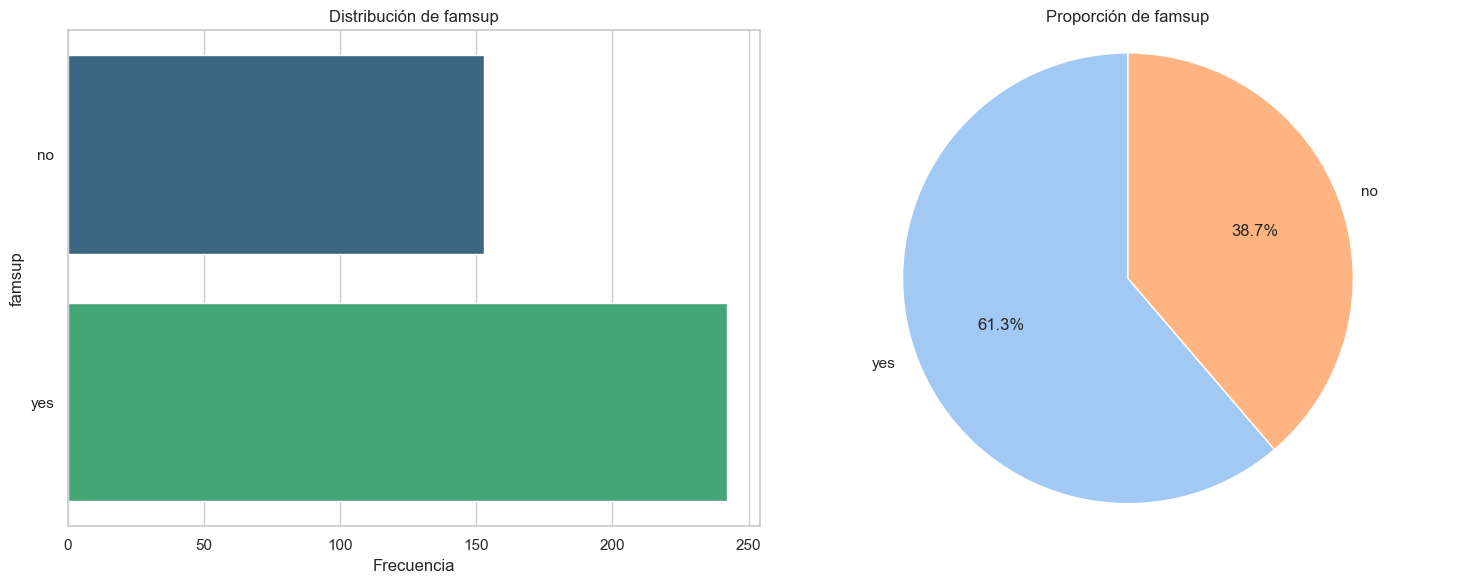

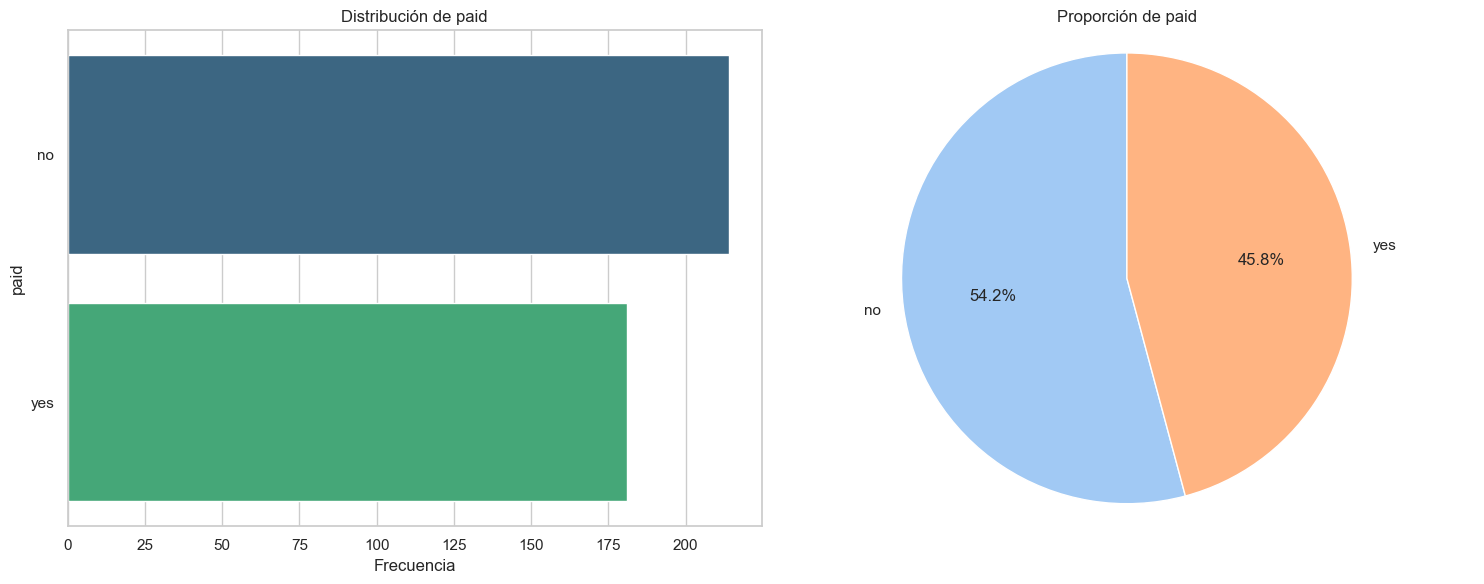

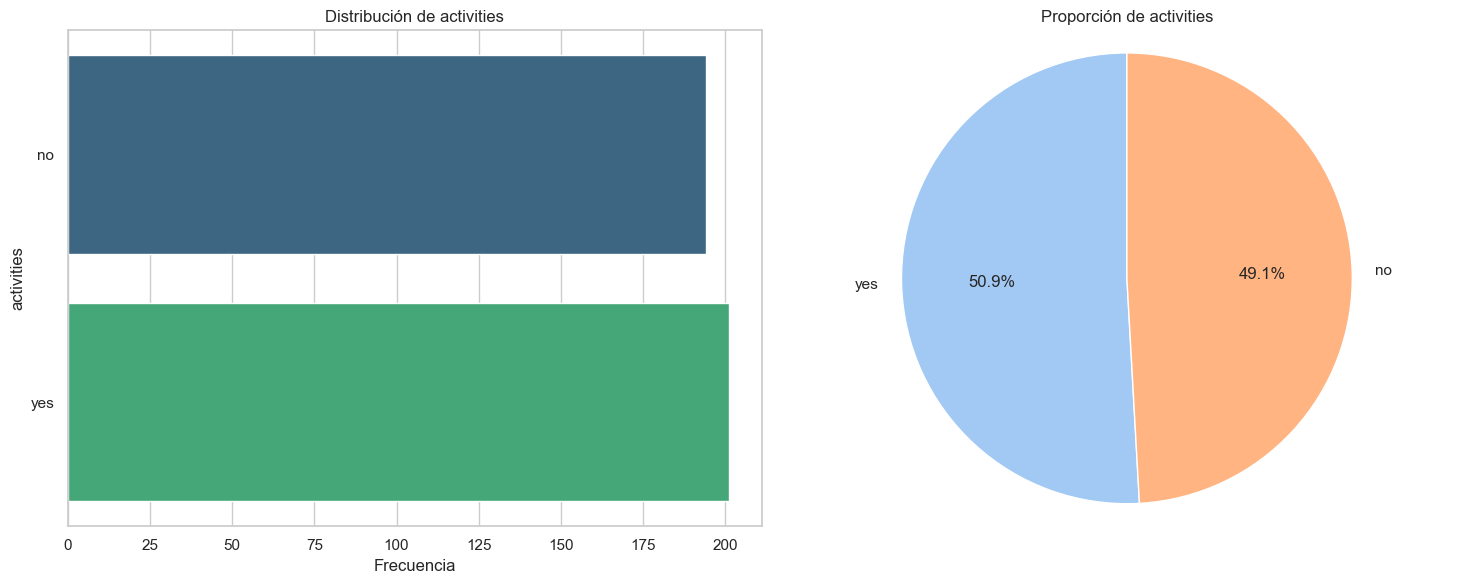

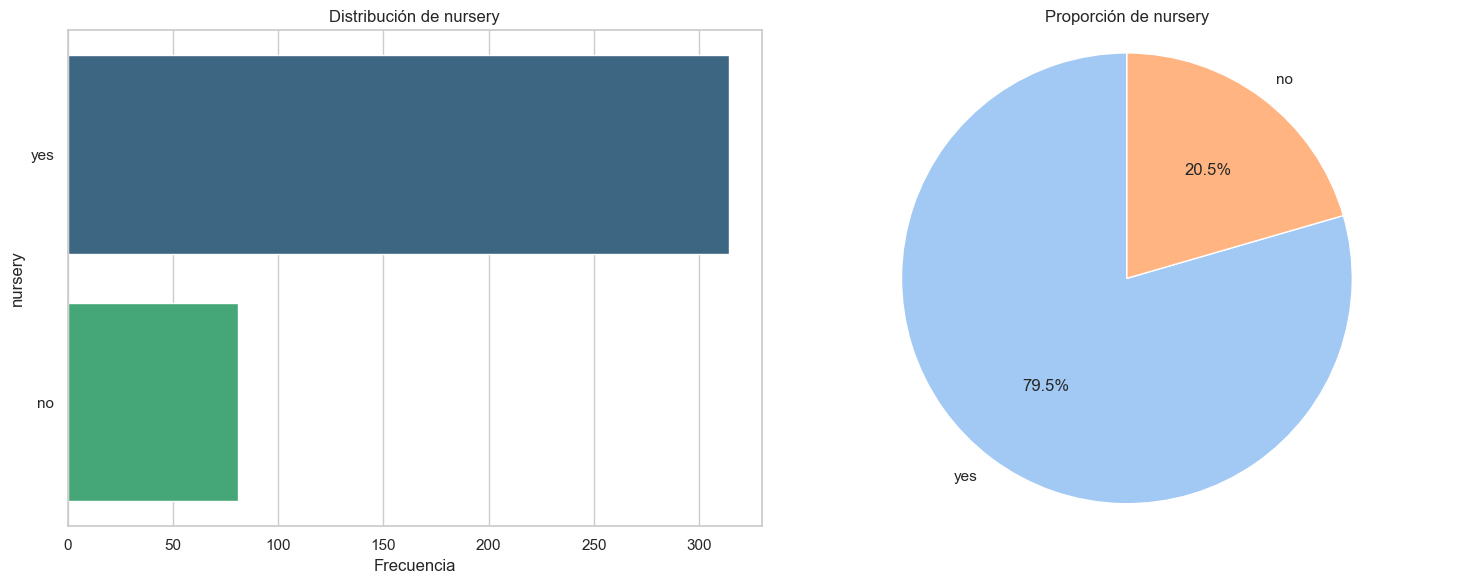

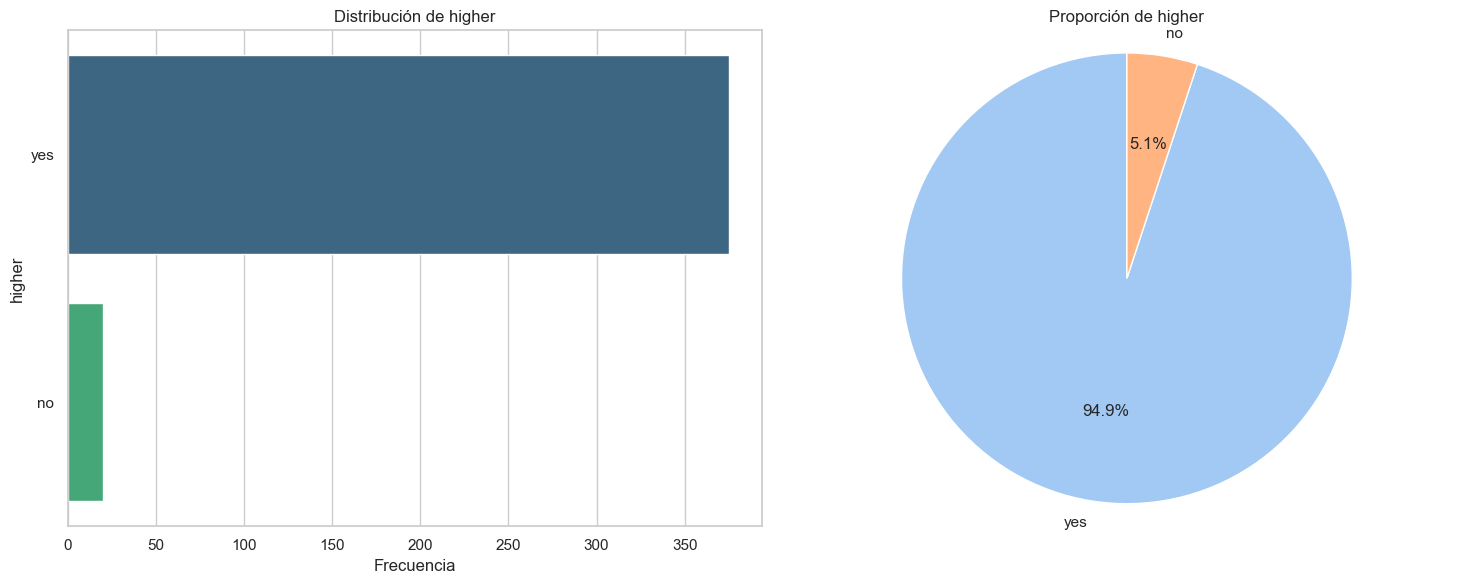

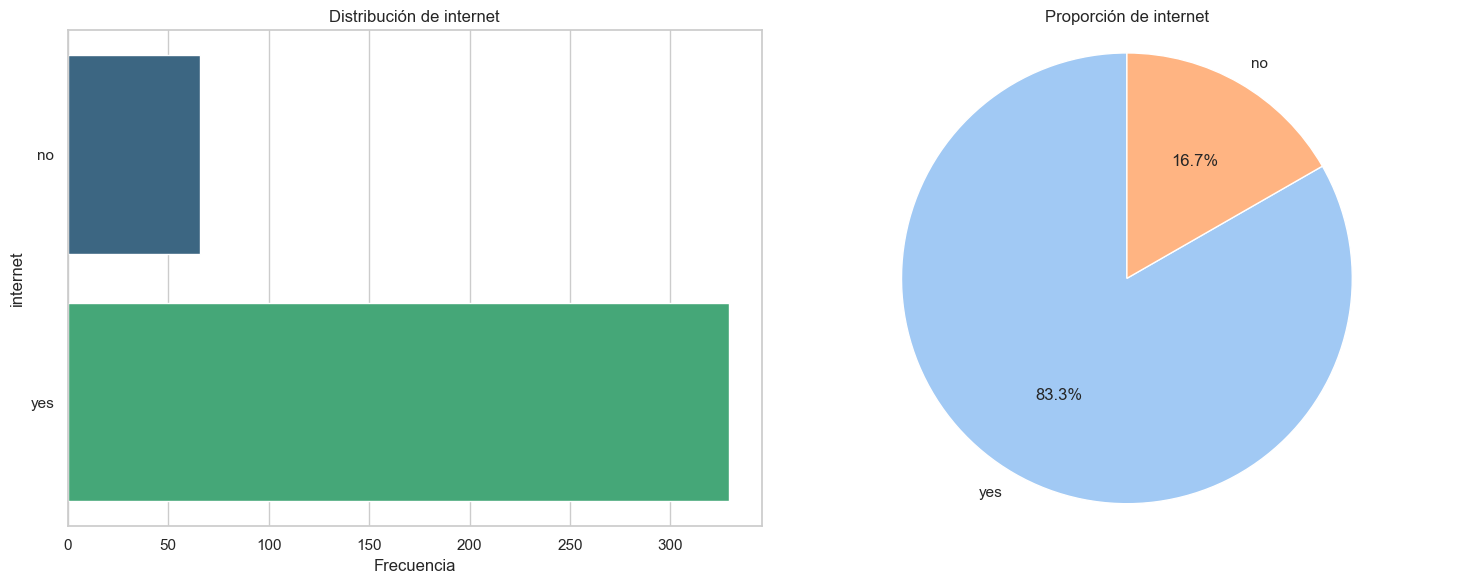

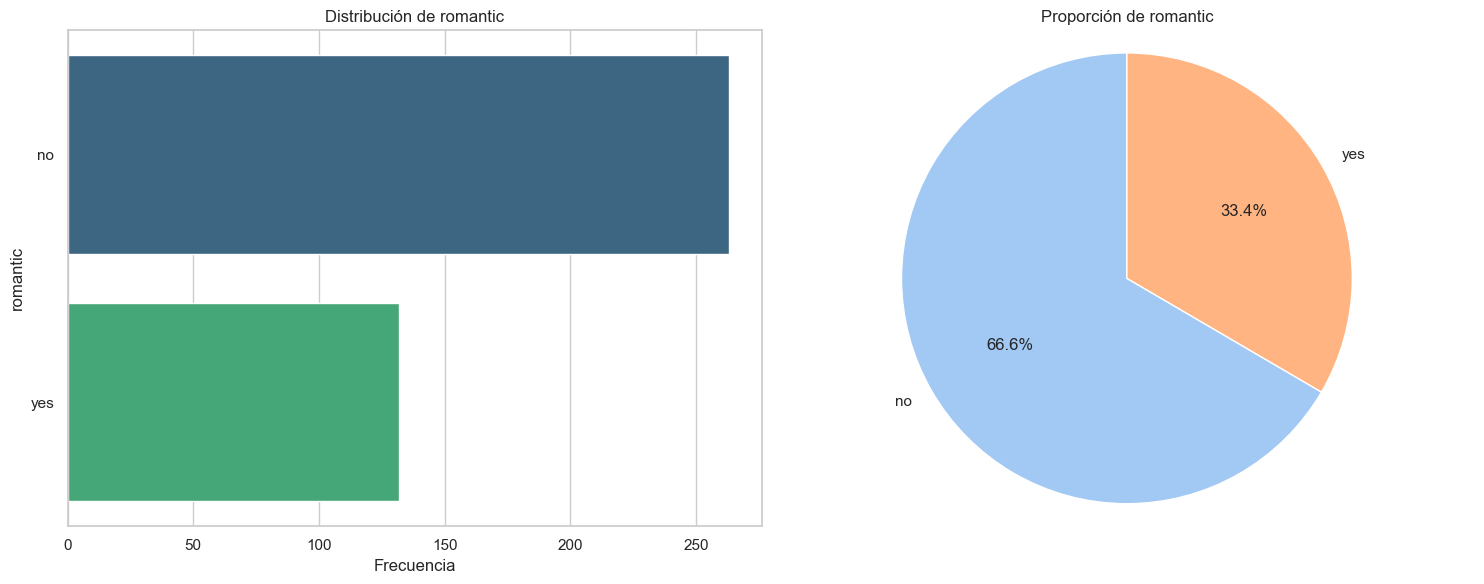

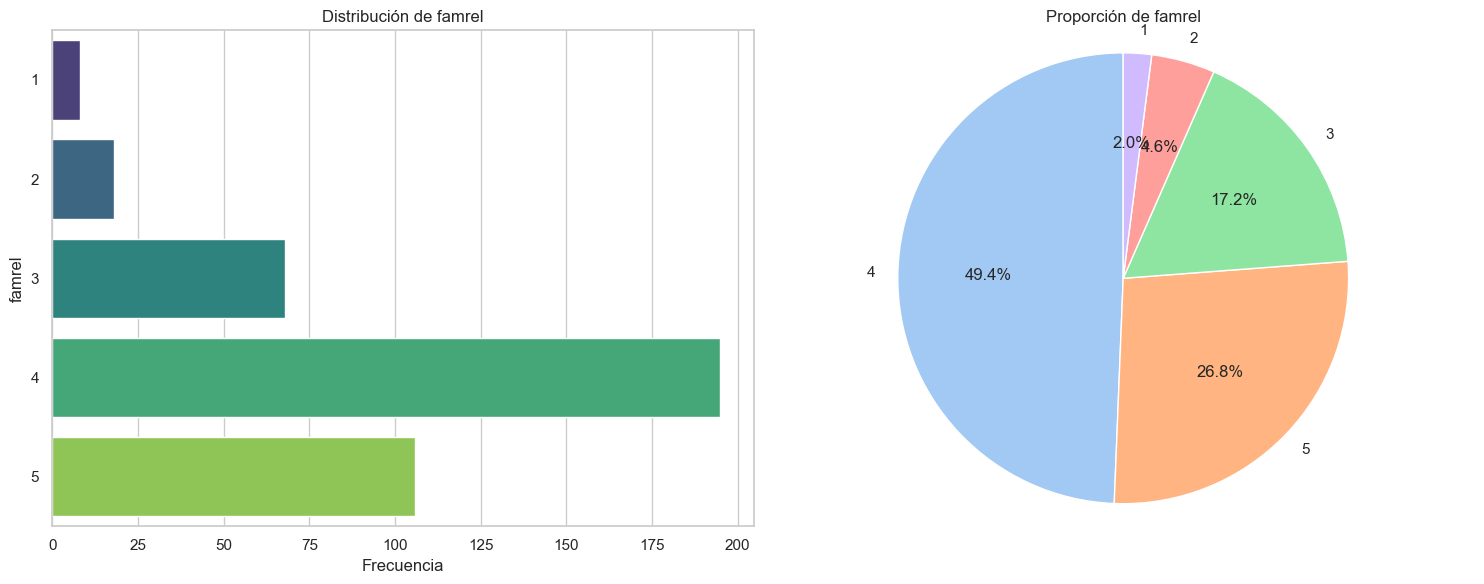

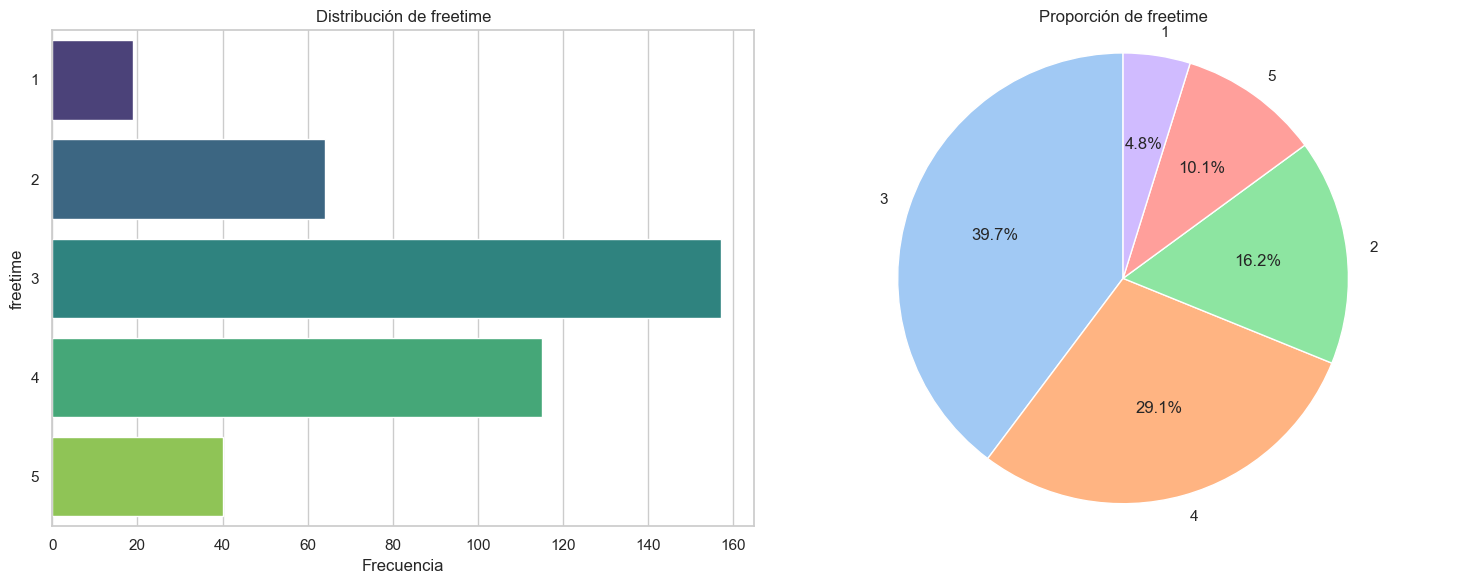

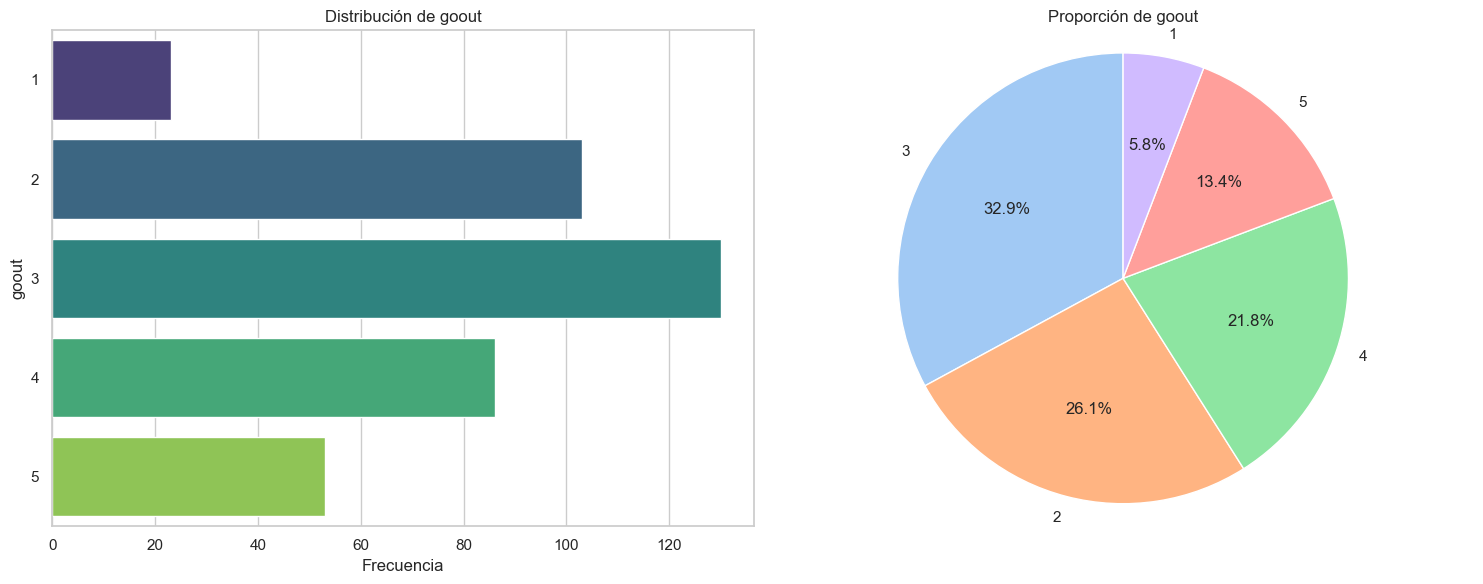

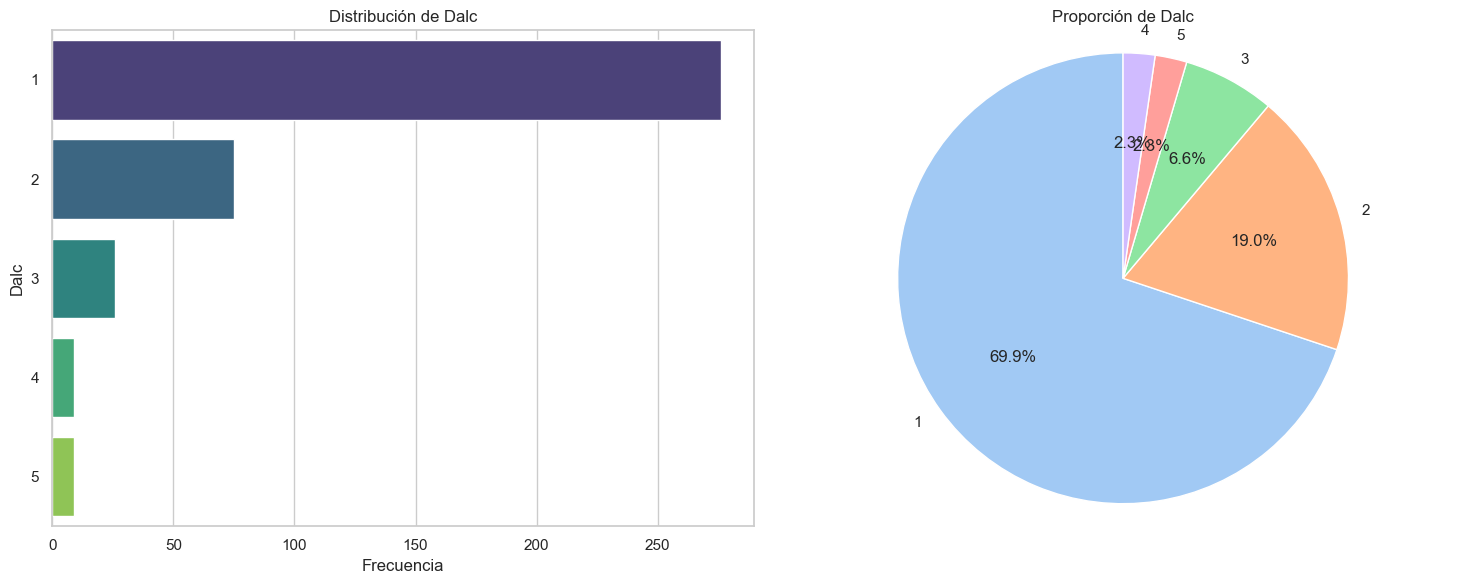

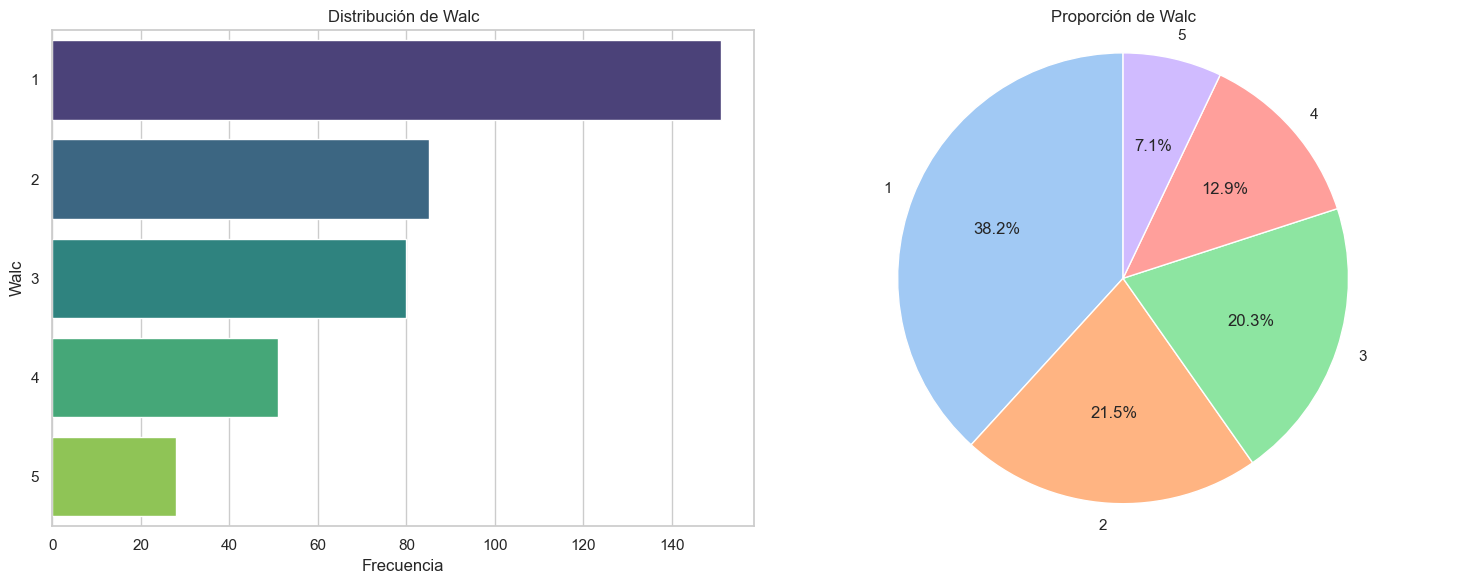

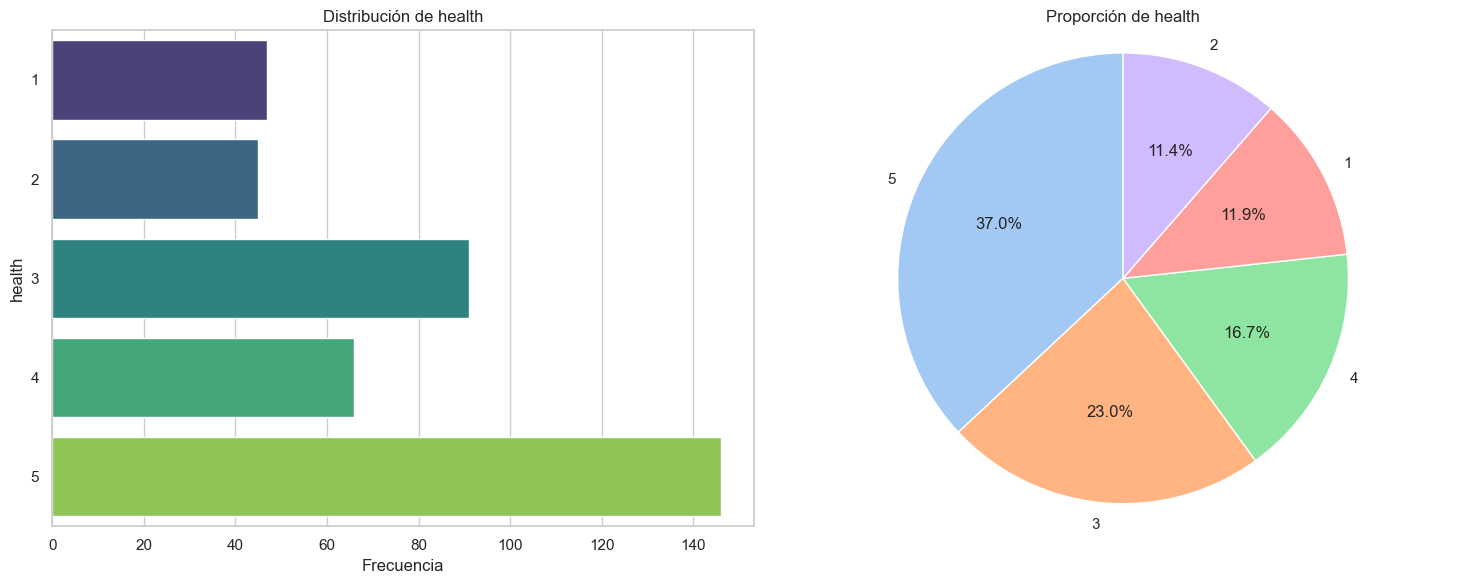

In [11]:
# Ejemplo de uso para cada variable categórica
for variable in variables_categoricas:
    grafico_categorico(variable, df_mat)

### Gráficos de relación

<Figure size 1000x600 with 0 Axes>

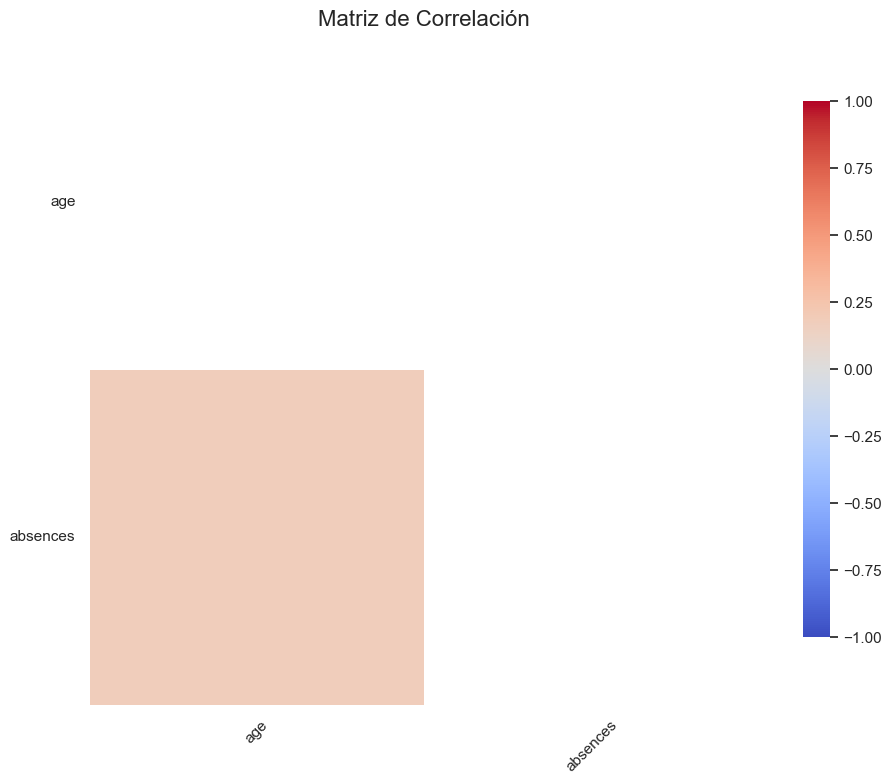

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuración
sns.set(style="white")
plt.figure(figsize=(10, 6))

# --- 1. MATRIZ DE CORRELACIÓN (Para variables cuantitativas) ---
def matriz_correlacion(df, variables_cuantitativas):
    # Calcular matriz de correlación
    corr_matrix = df[variables_cuantitativas].corr(method='pearson')  # También puede ser 'spearman' o 'kendall'
    
    # Máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt=".2f", 
                cmap="coolwarm",
                vmin=-1, 
                vmax=1,
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .8})
    
    plt.title("Matriz de Correlación", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

matriz_correlacion(df_mat, variables_cuantitativas)

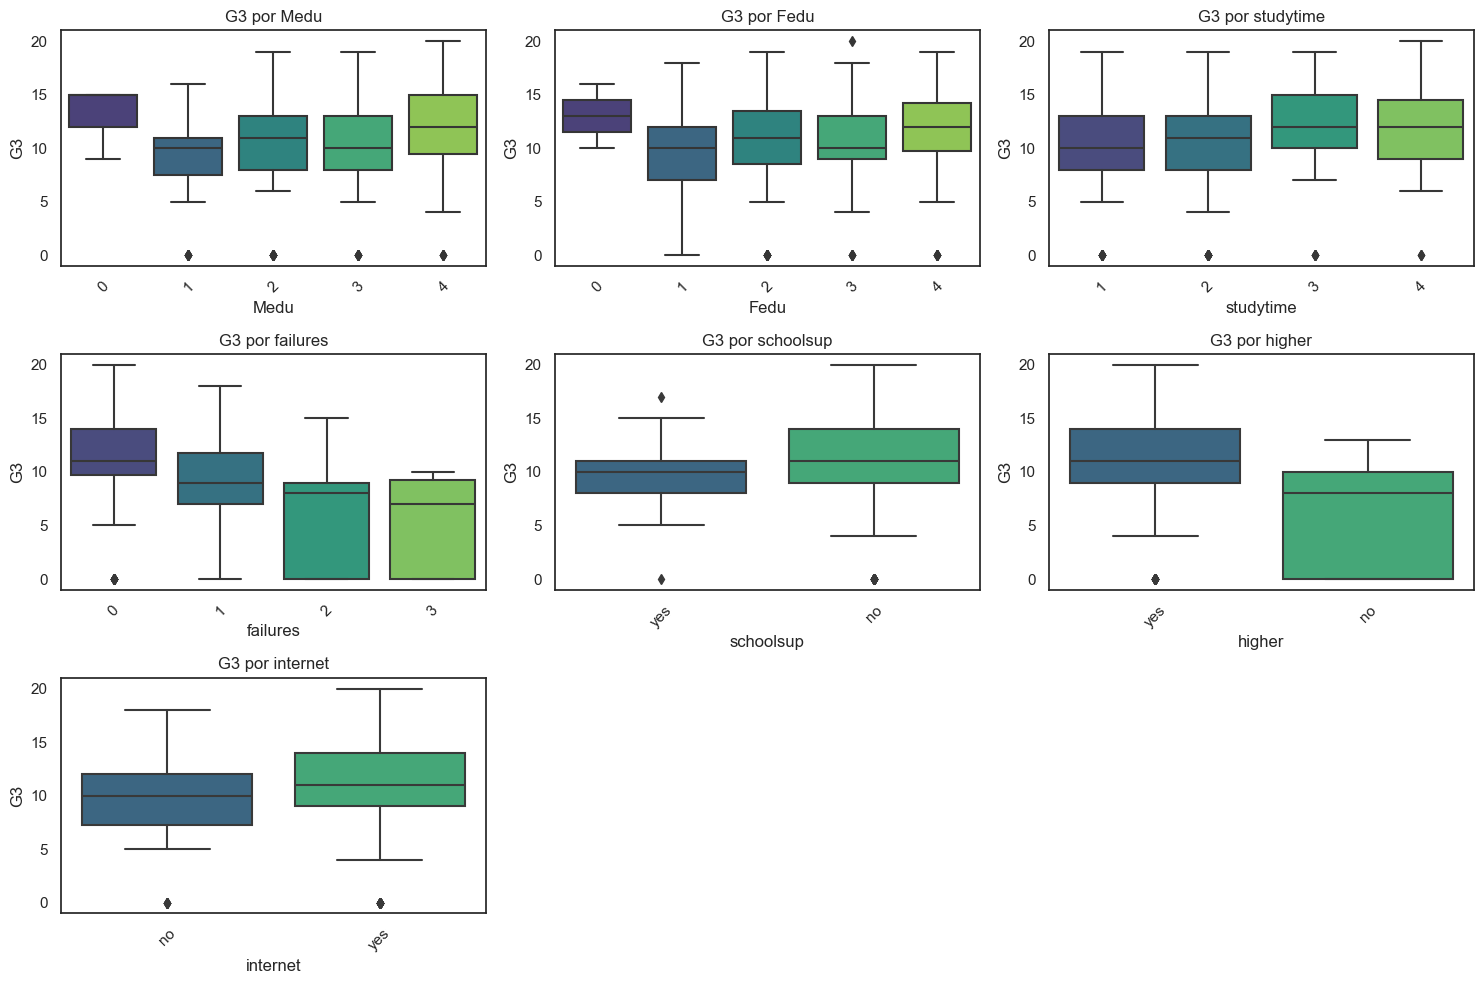

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables clave vs G3 (nota final)
variables_interes = ['Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'higher', 'internet']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_interes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_mat, x=var, y='G3', palette='viridis')
    plt.title(f'G3 por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

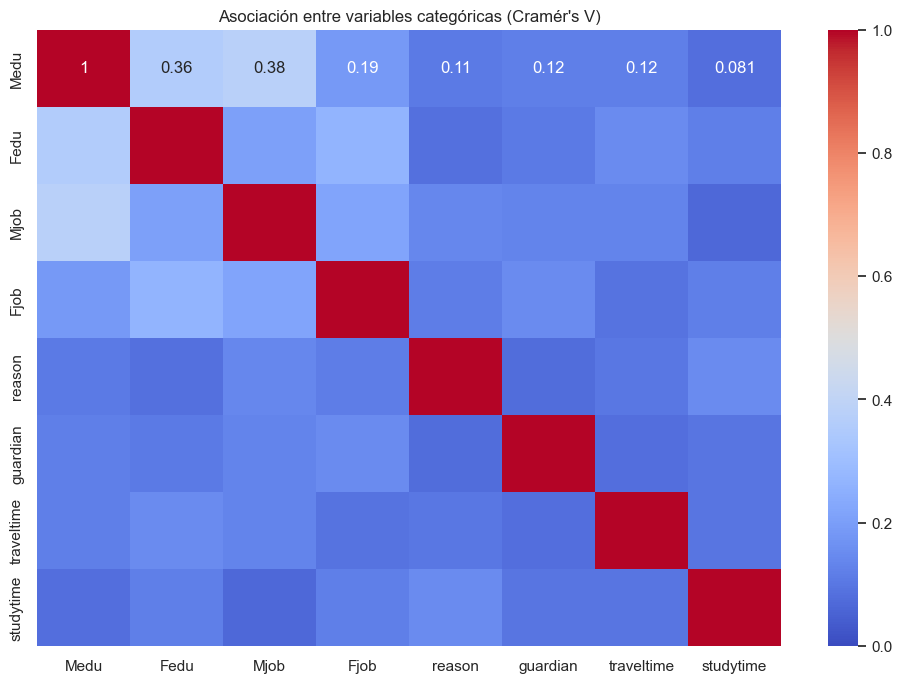

In [14]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Seleccionar categóricas (excluyendo binarias para simplificar)
categoricas = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime']

# Matriz de Cramér's V
corr_matrix = pd.DataFrame(index=categoricas, columns=categoricas)
for col1 in categoricas:
    for col2 in categoricas:
        corr_matrix.loc[col1, col2] = cramers_v(df_mat[col1], df_mat[col2])

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Asociación entre variables categóricas (Cramér's V)")
plt.show()

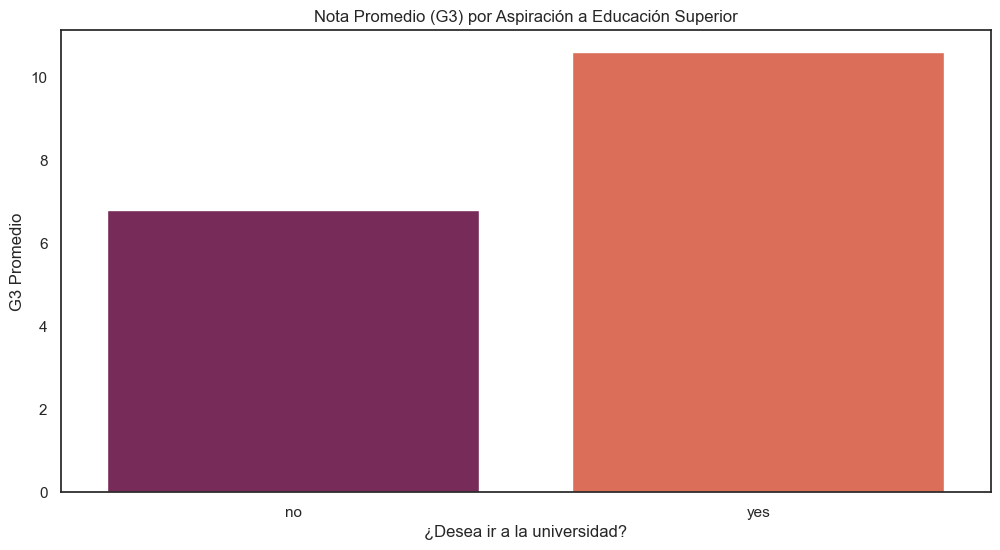

In [15]:
binarias = ['schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']

plt.figure(figsize=(12, 6))
df_grouped = df_mat.groupby('higher')['G3'].mean().reset_index()
sns.barplot(data=df_grouped, x='higher', y='G3', palette='rocket')
plt.title("Nota Promedio (G3) por Aspiración a Educación Superior")
plt.ylabel("G3 Promedio")
plt.xlabel("¿Desea ir a la universidad?")
plt.show()

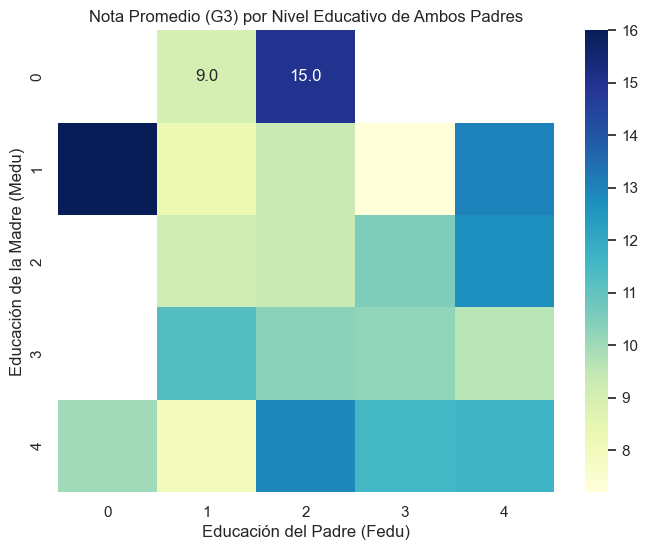

In [16]:
# Agrupar por dos variables categóricas y calcular G3 promedio
pivot_table = df_mat.pivot_table(values='G3', index='Medu', columns='Fedu', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Nota Promedio (G3) por Nivel Educativo de Ambos Padres")
plt.xlabel("Educación del Padre (Fedu)")
plt.ylabel("Educación de la Madre (Medu)")
plt.show()

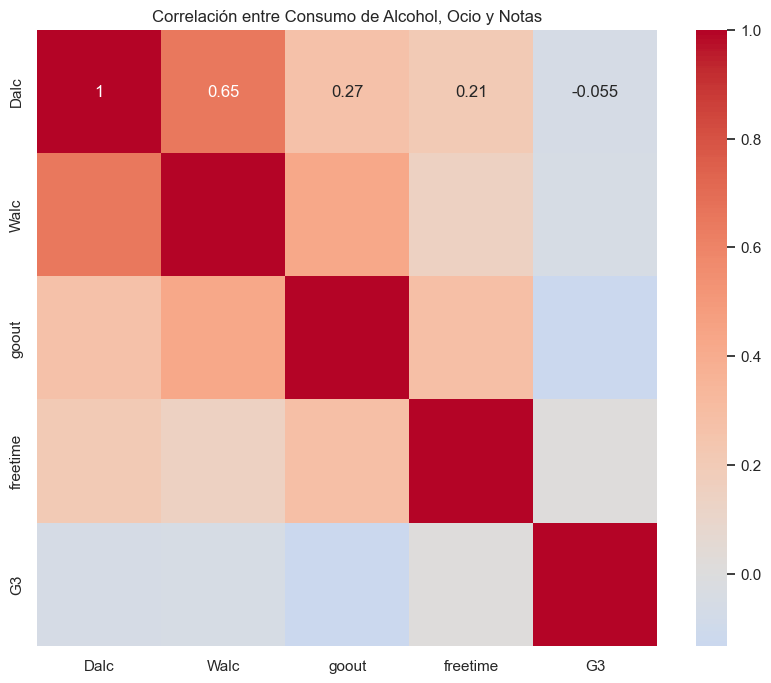

In [17]:
alcohol_vars = ['Dalc', 'Walc', 'goout', 'freetime']

plt.figure(figsize=(10, 8))
sns.heatmap(df_mat[alcohol_vars + ['G3']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlación entre Consumo de Alcohol, Ocio y Notas")
plt.show()

## Gráficos para portugués

### Gráficos de distribución

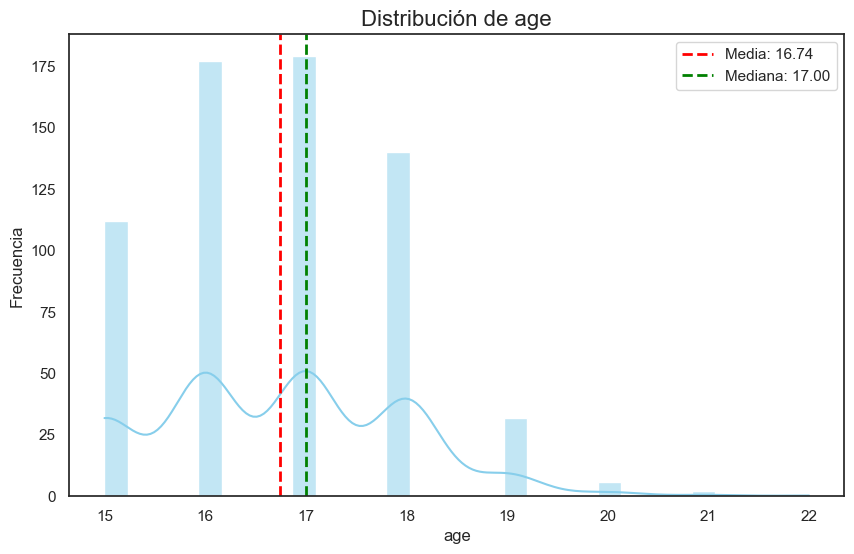

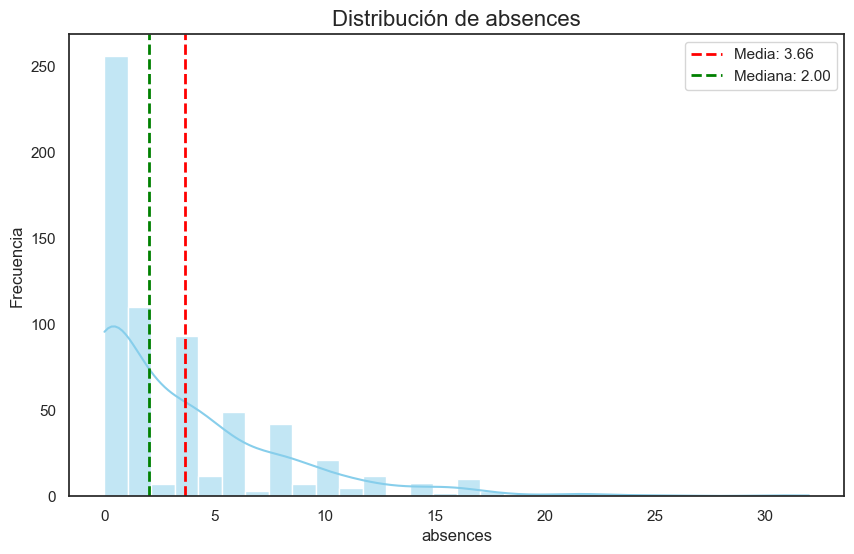

In [18]:
# Ejemplo de uso (para cada variable)
for variable in variables_cuantitativas:
    grafico_distribucion(variable, df_por)

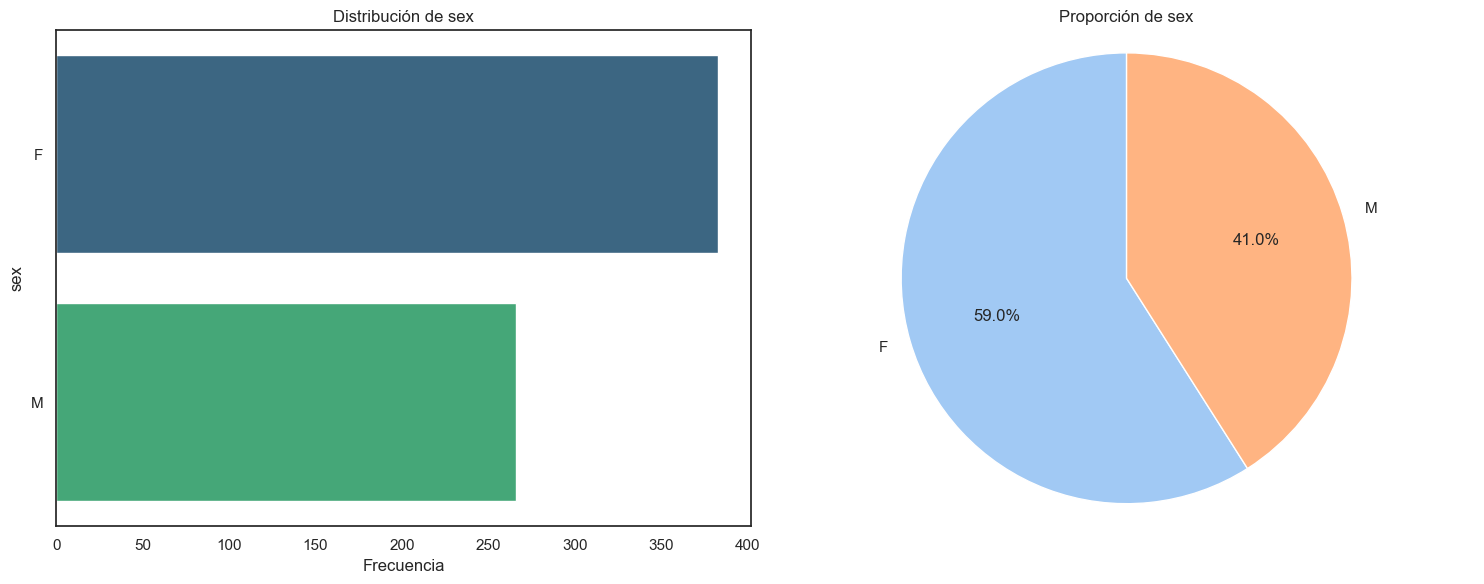

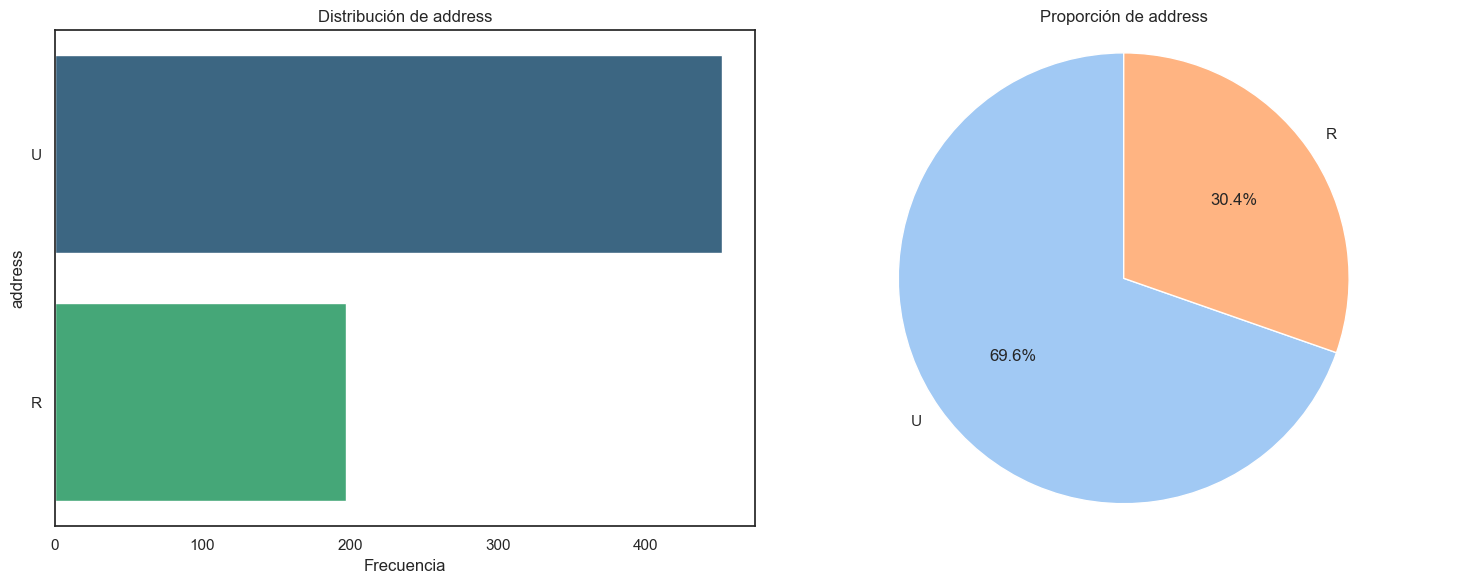

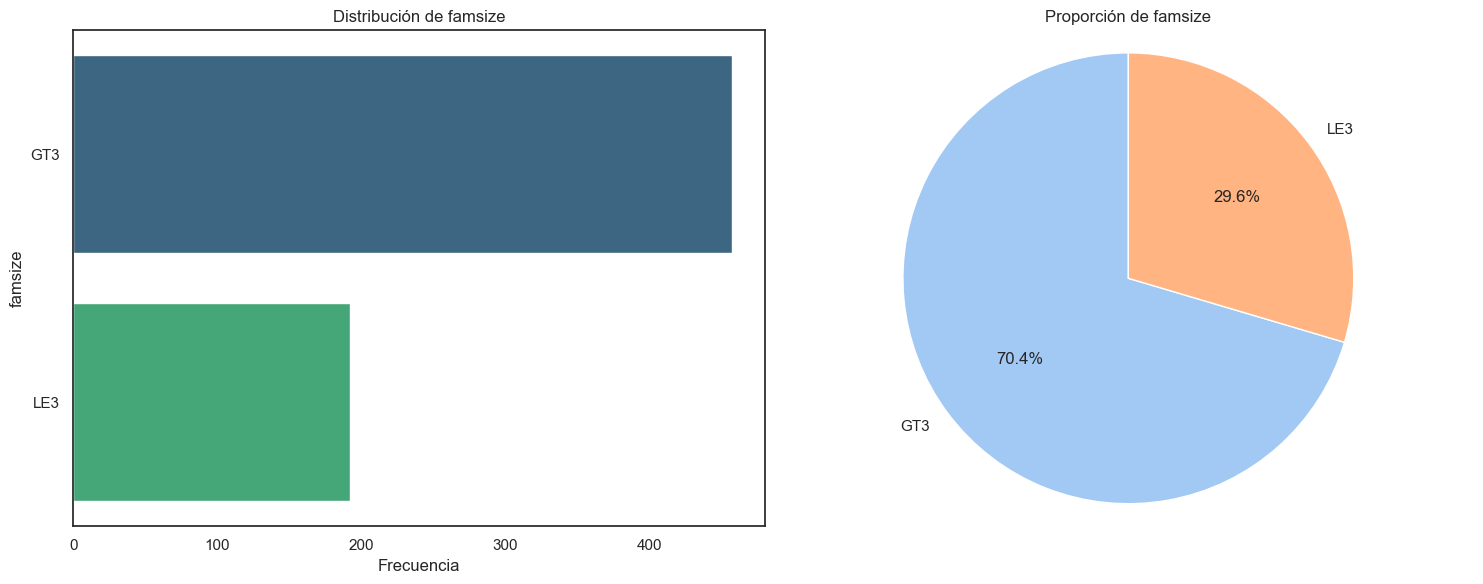

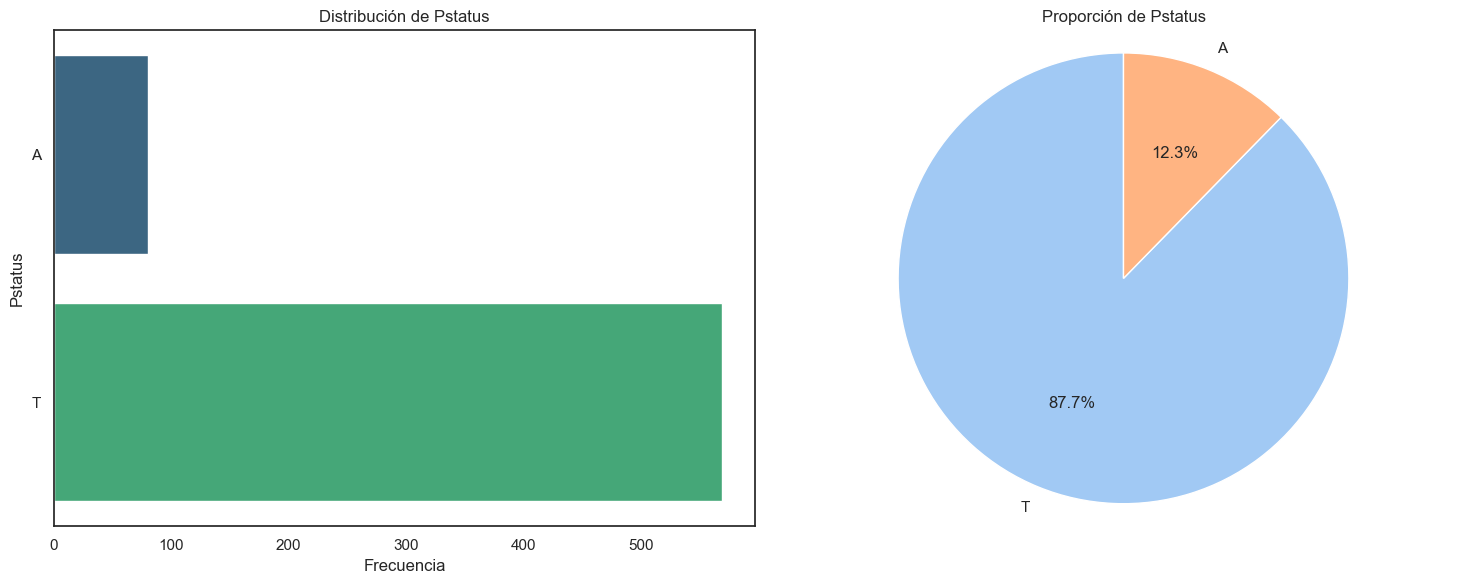

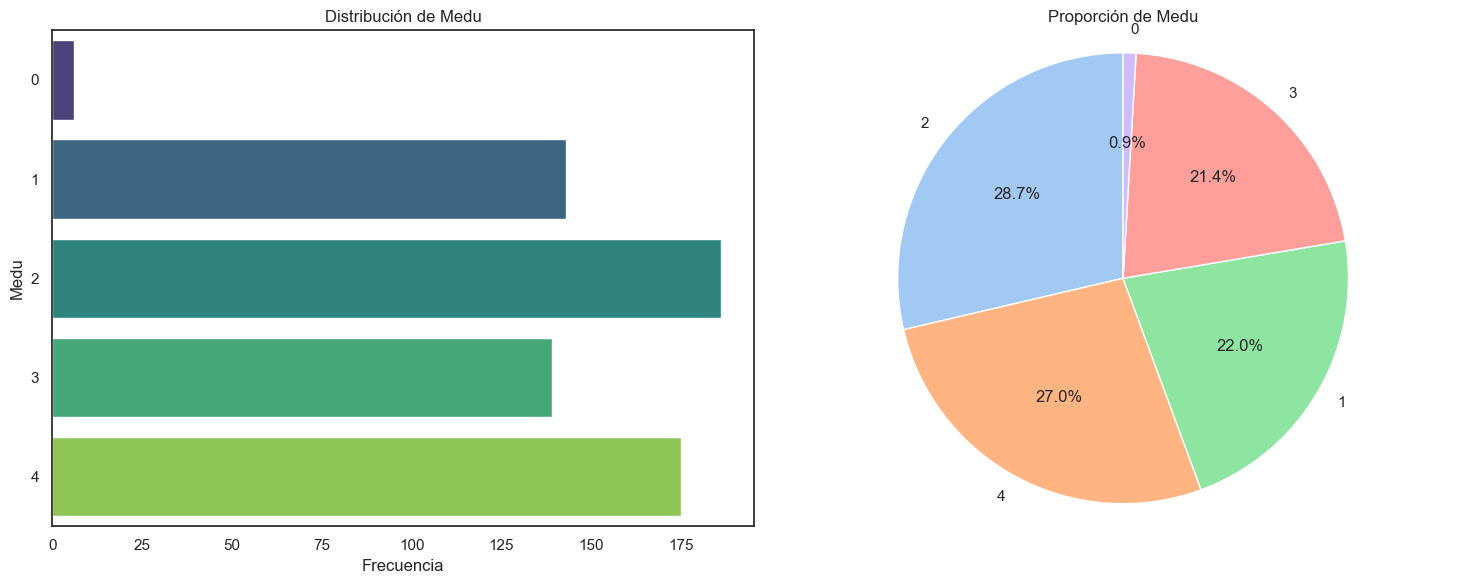

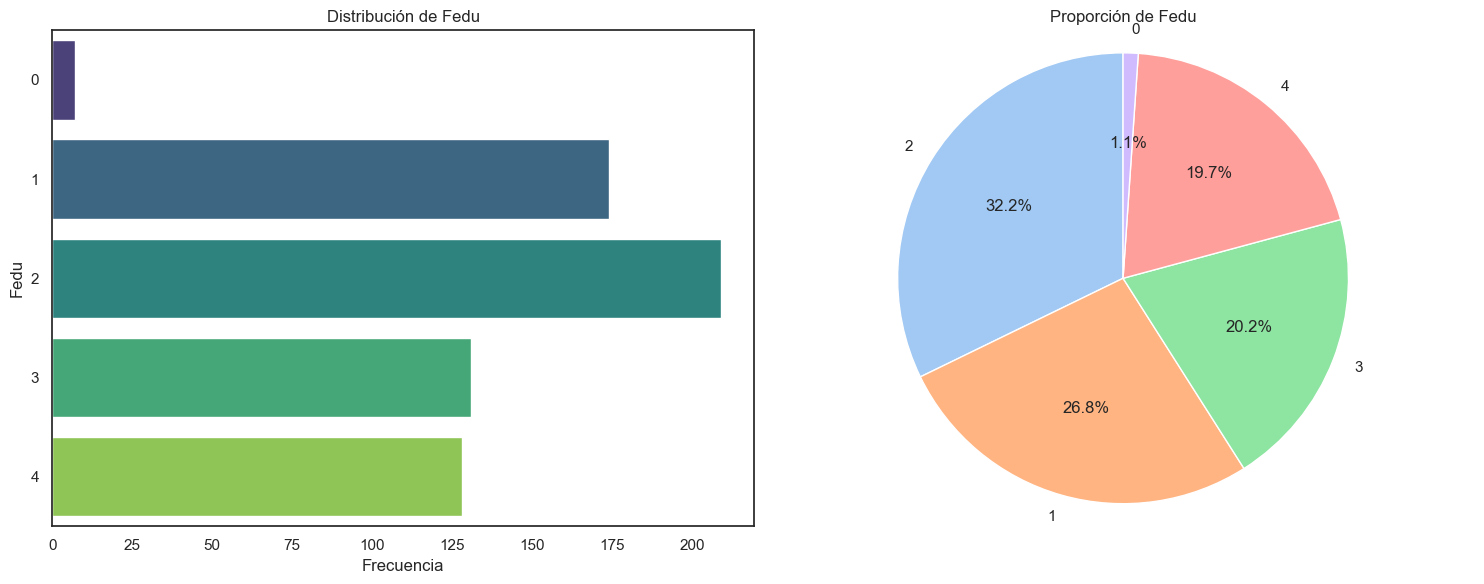

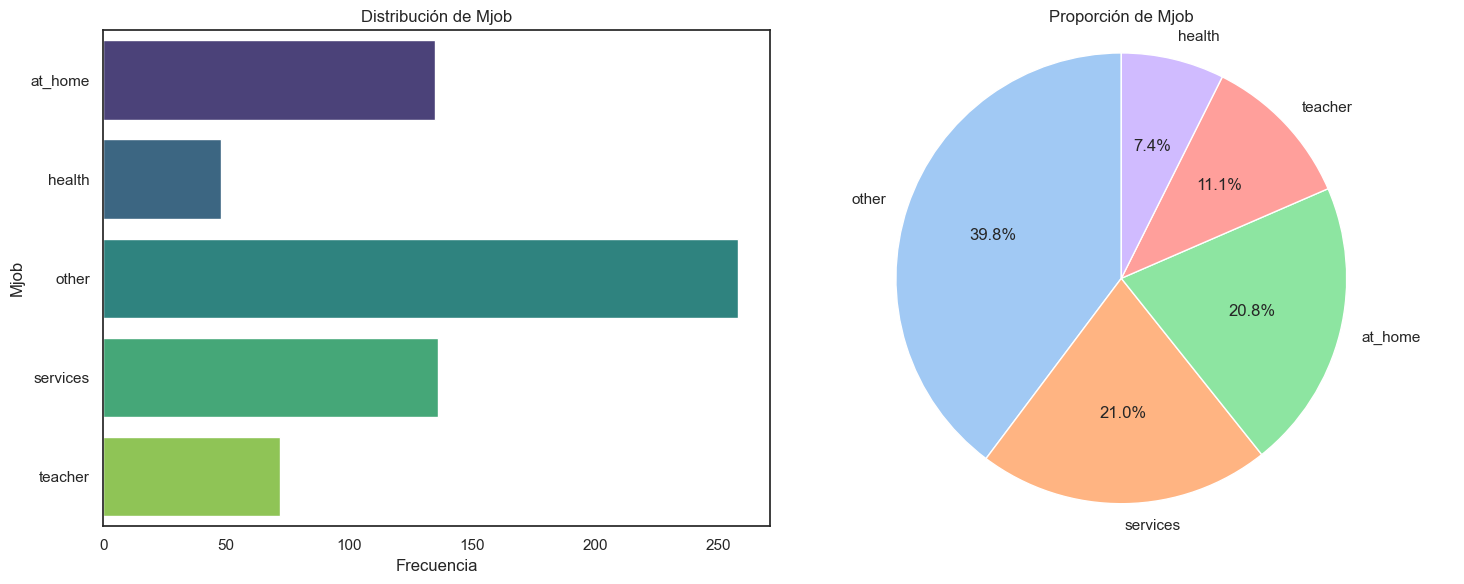

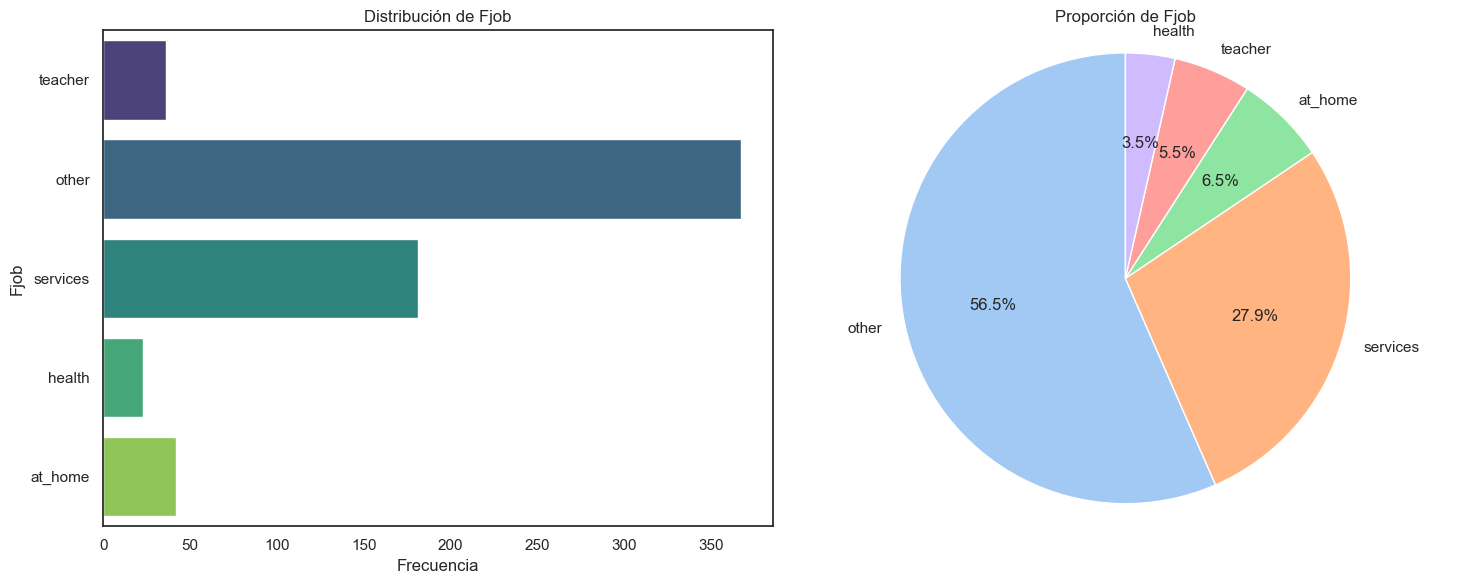

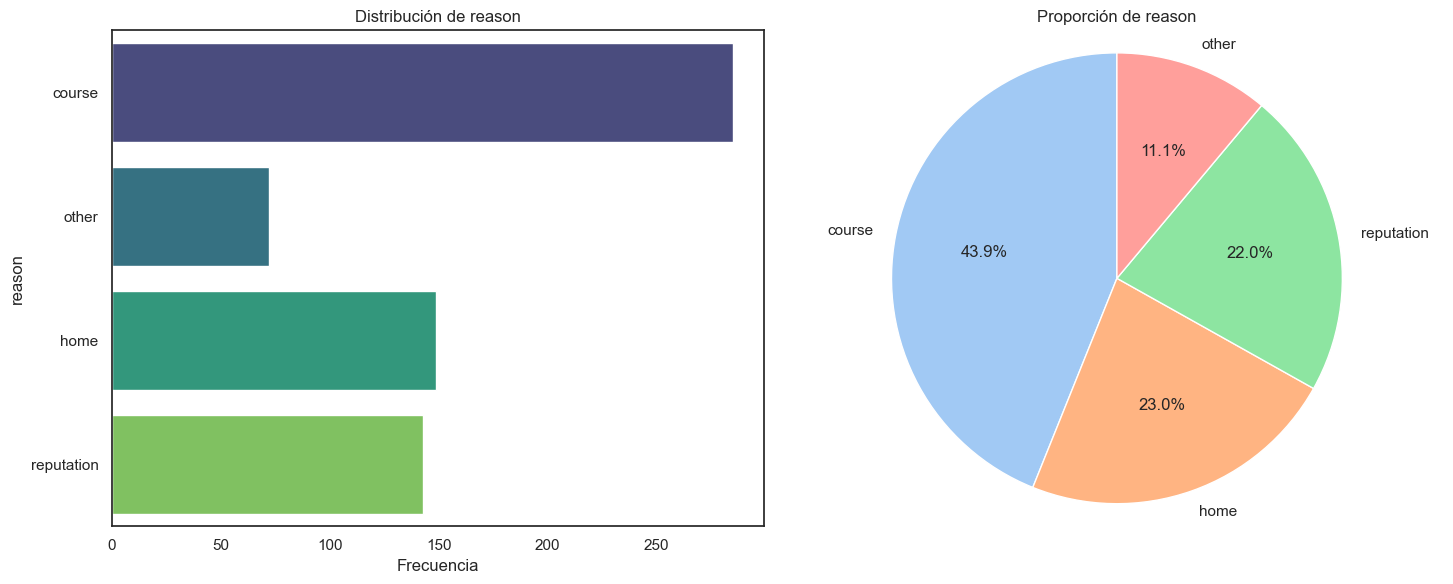

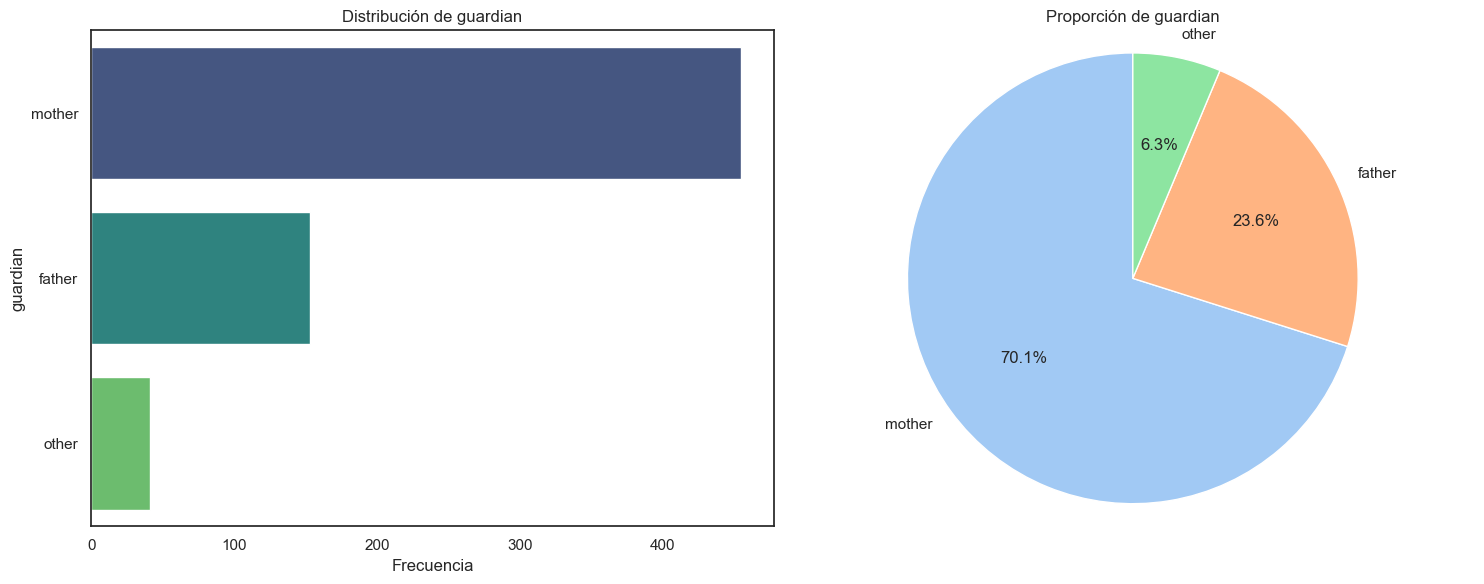

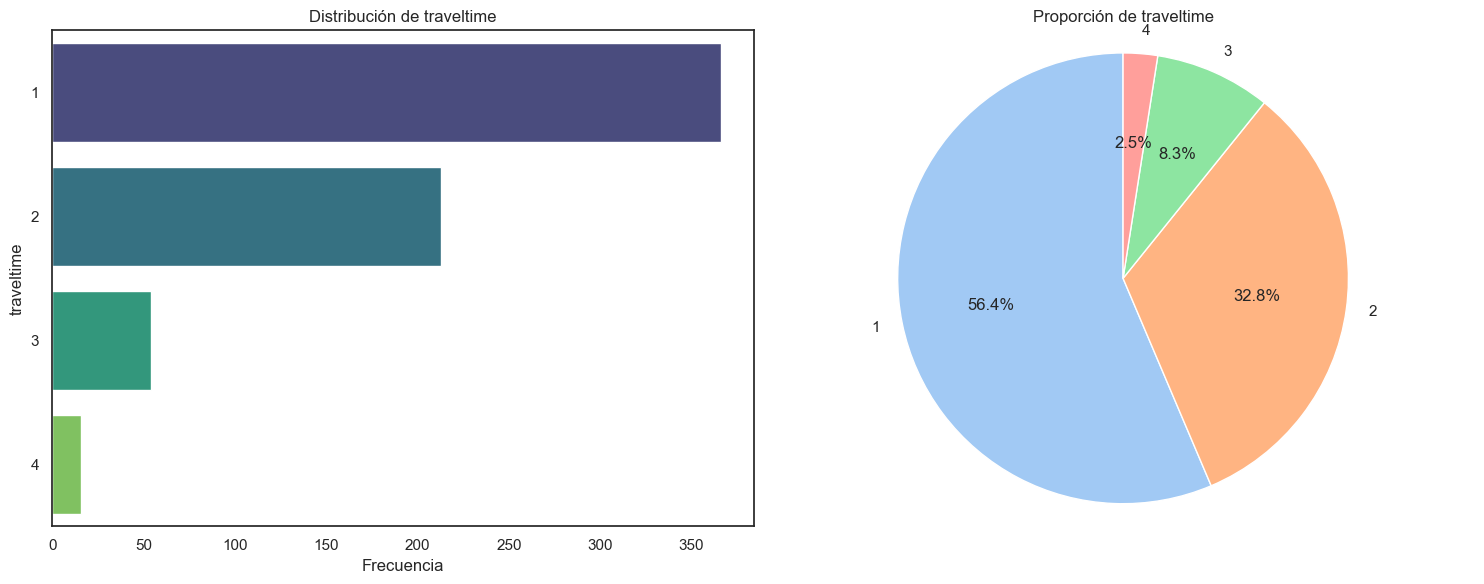

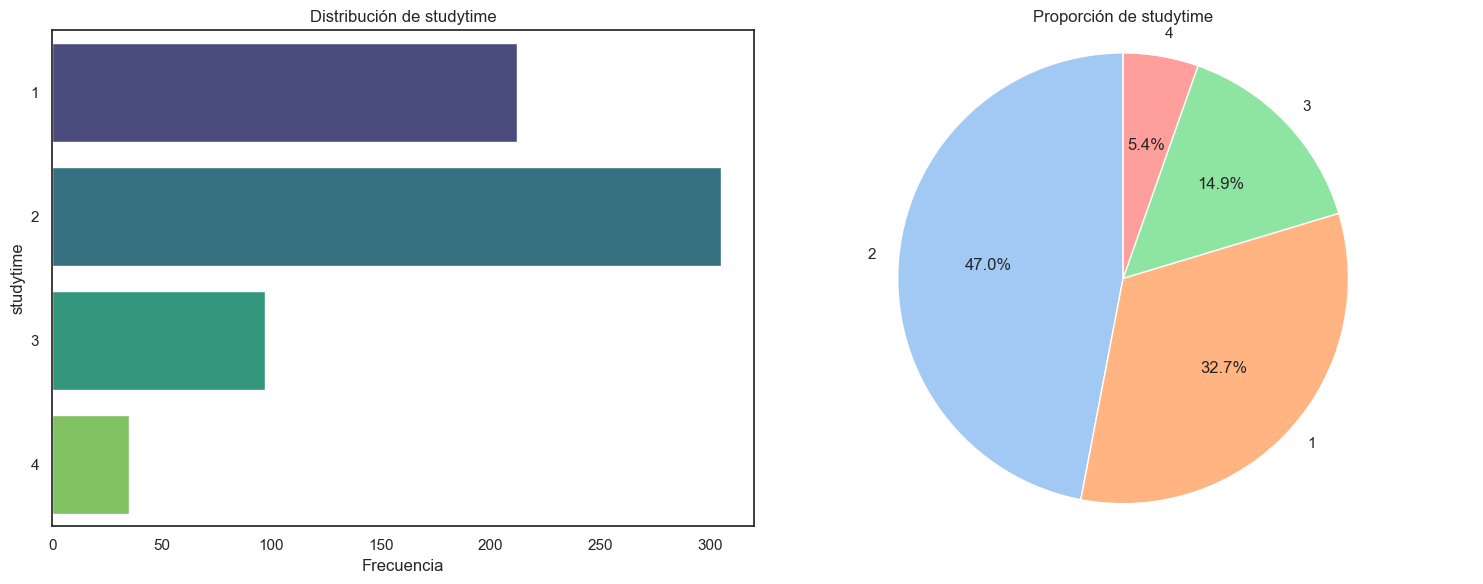

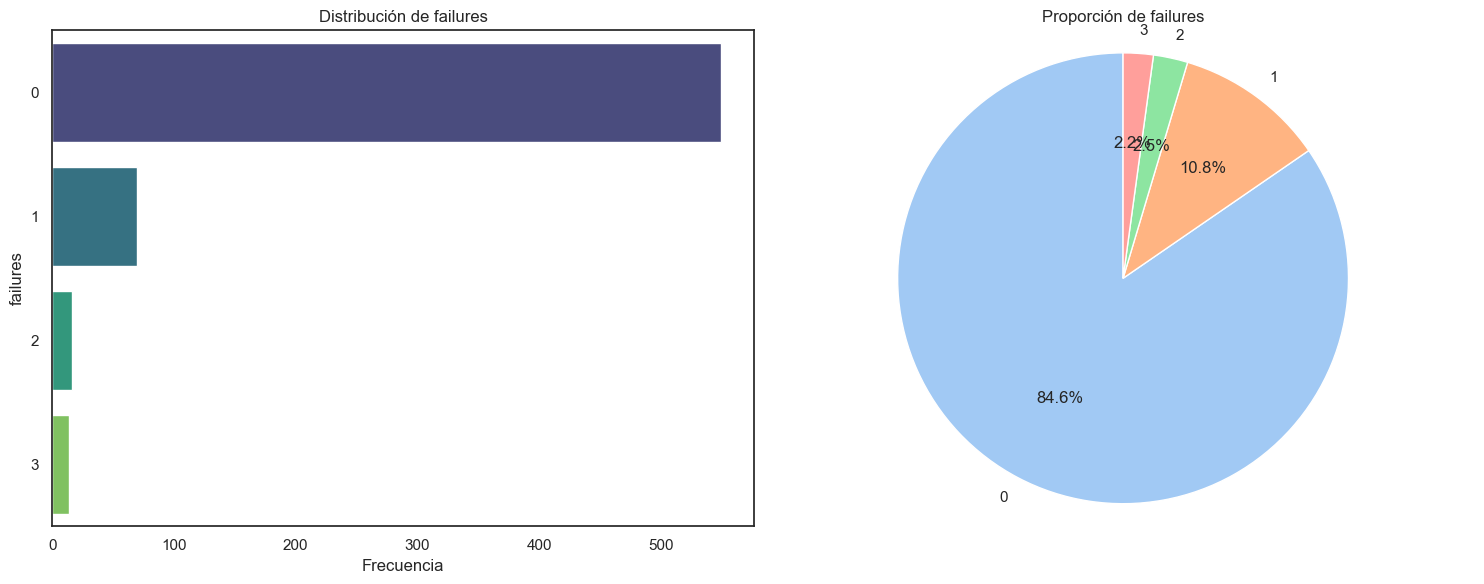

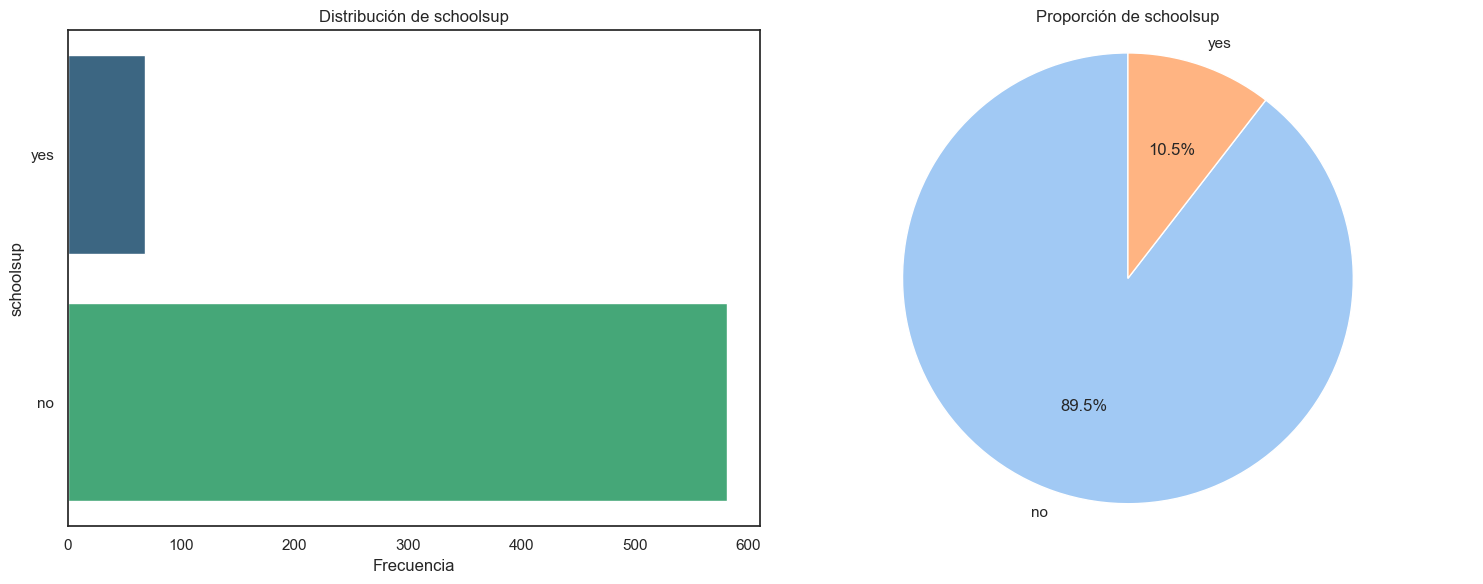

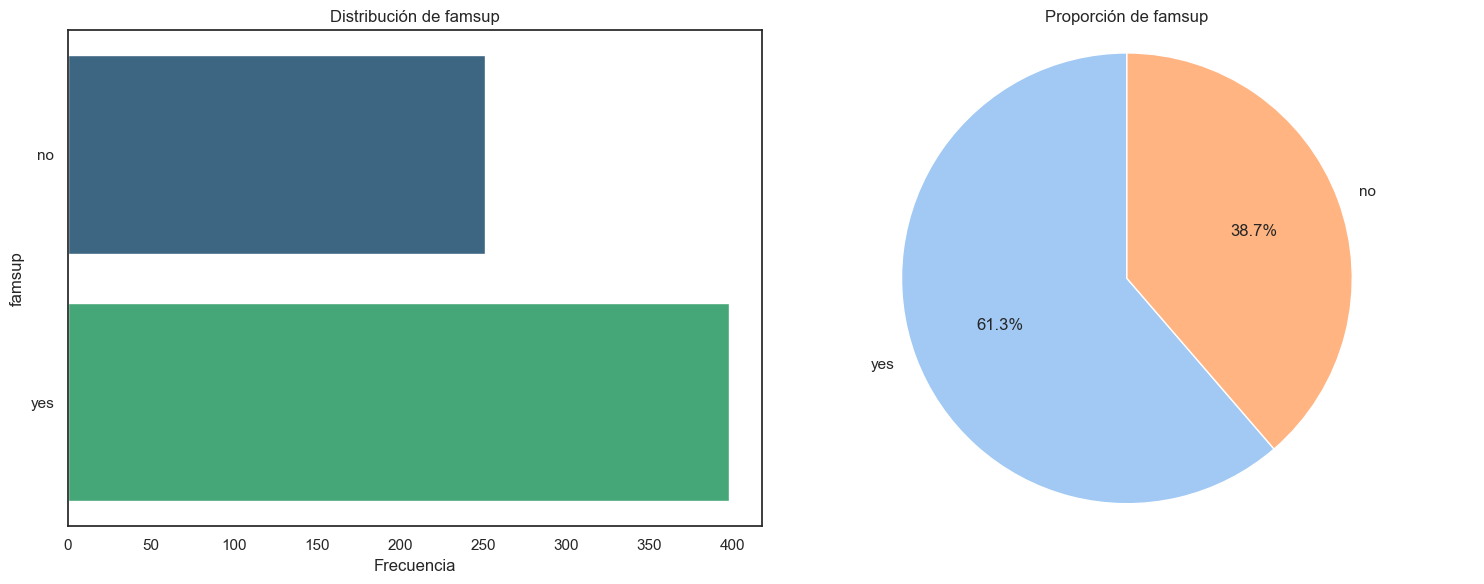

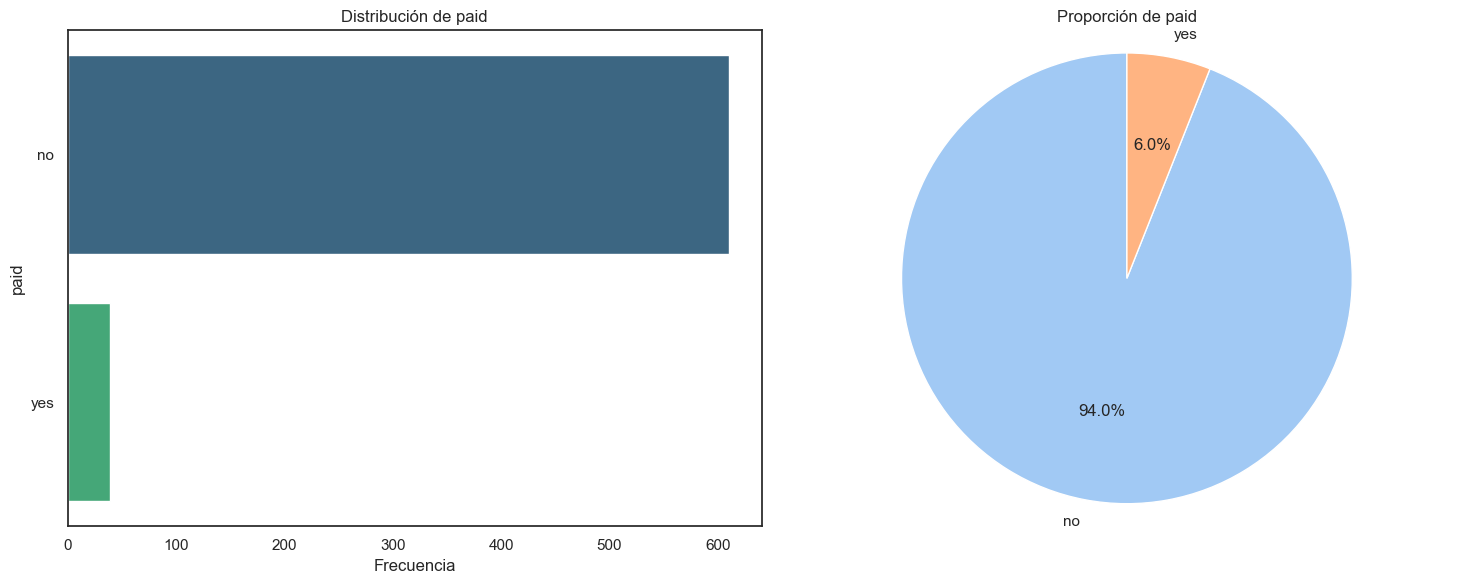

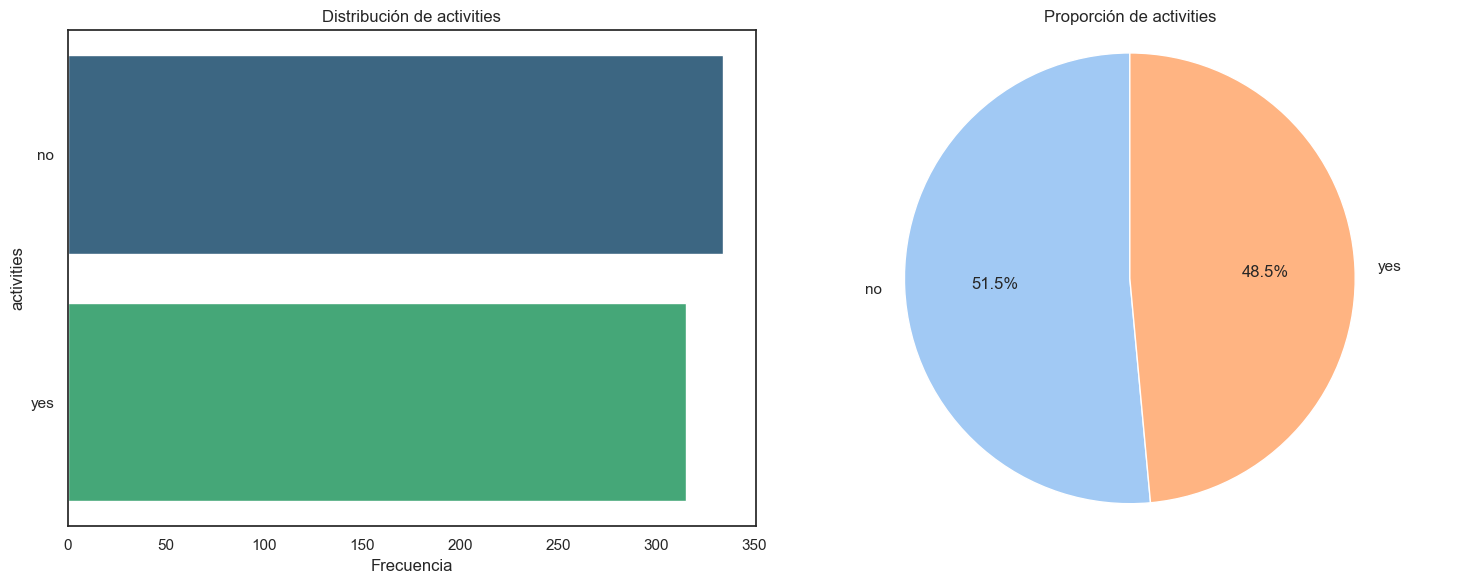

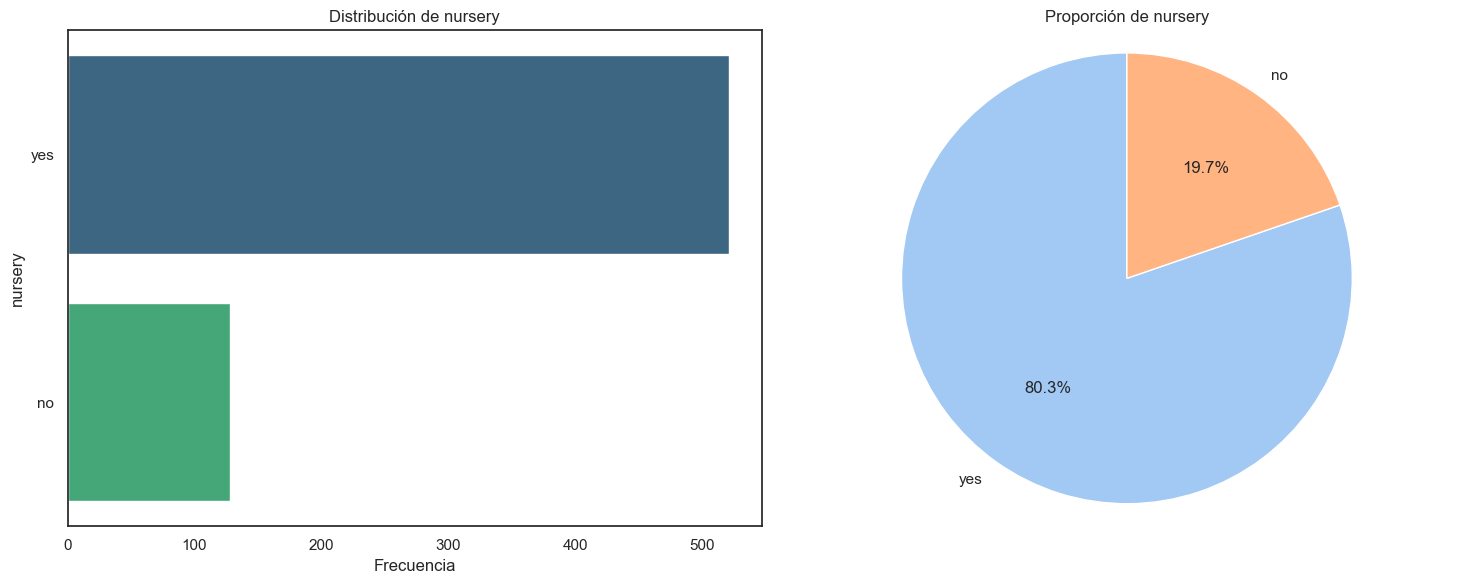

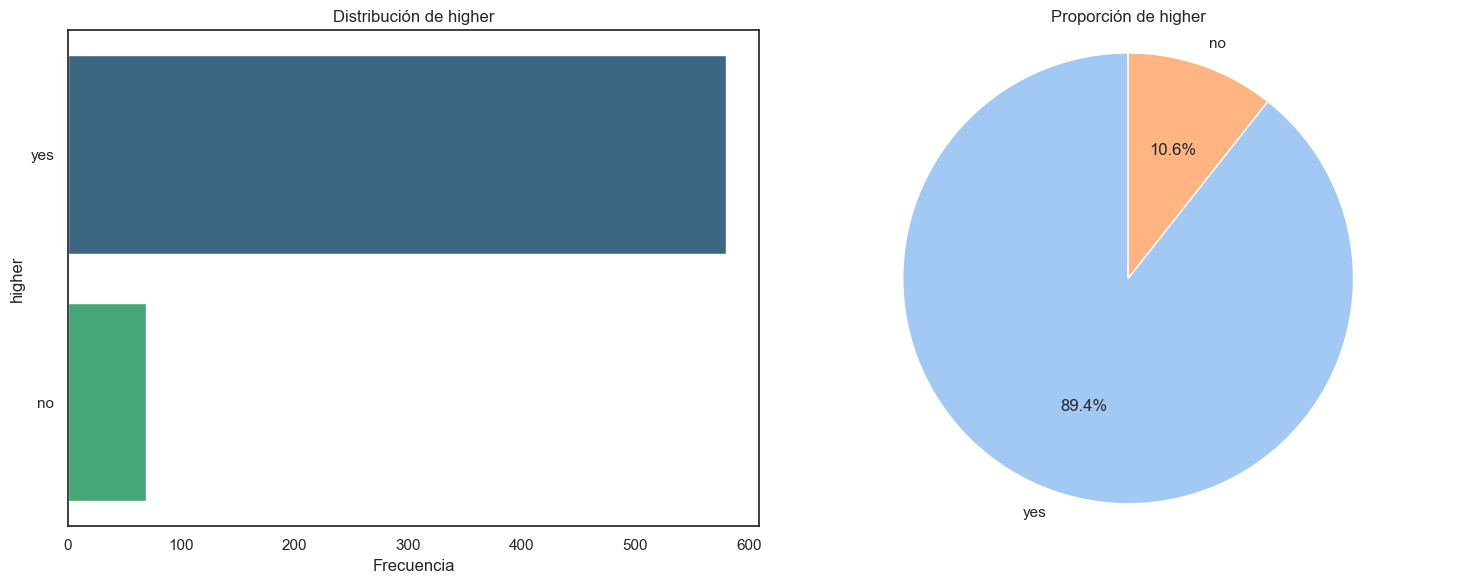

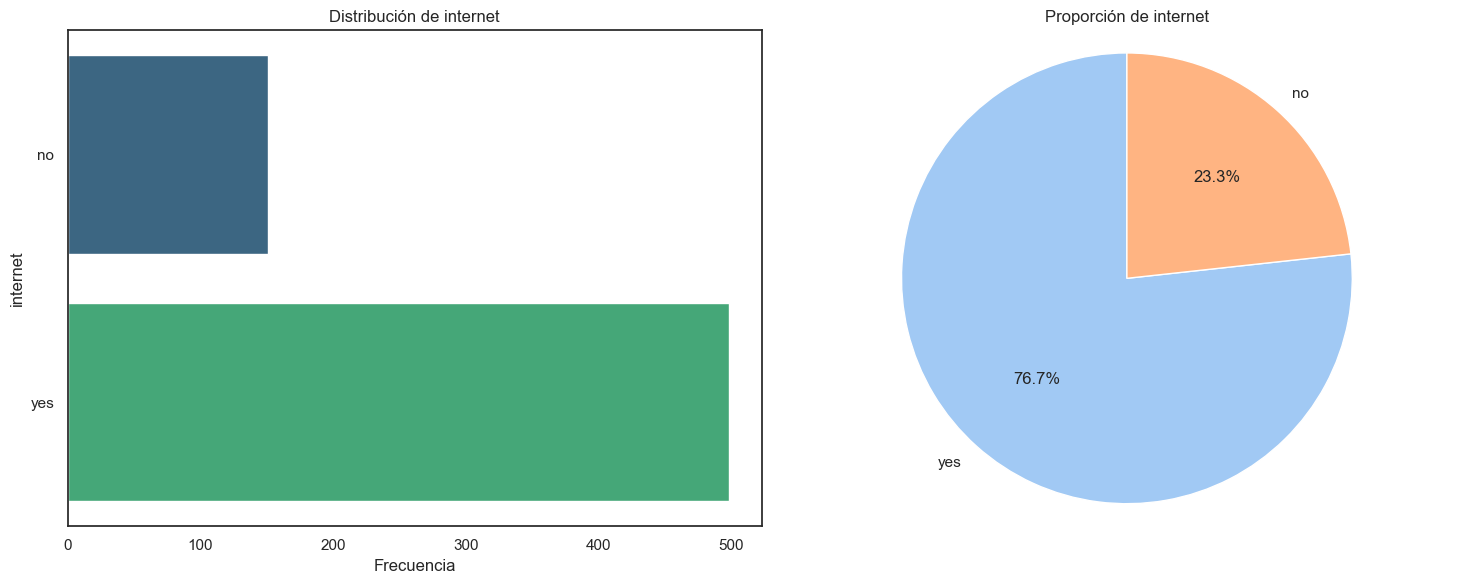

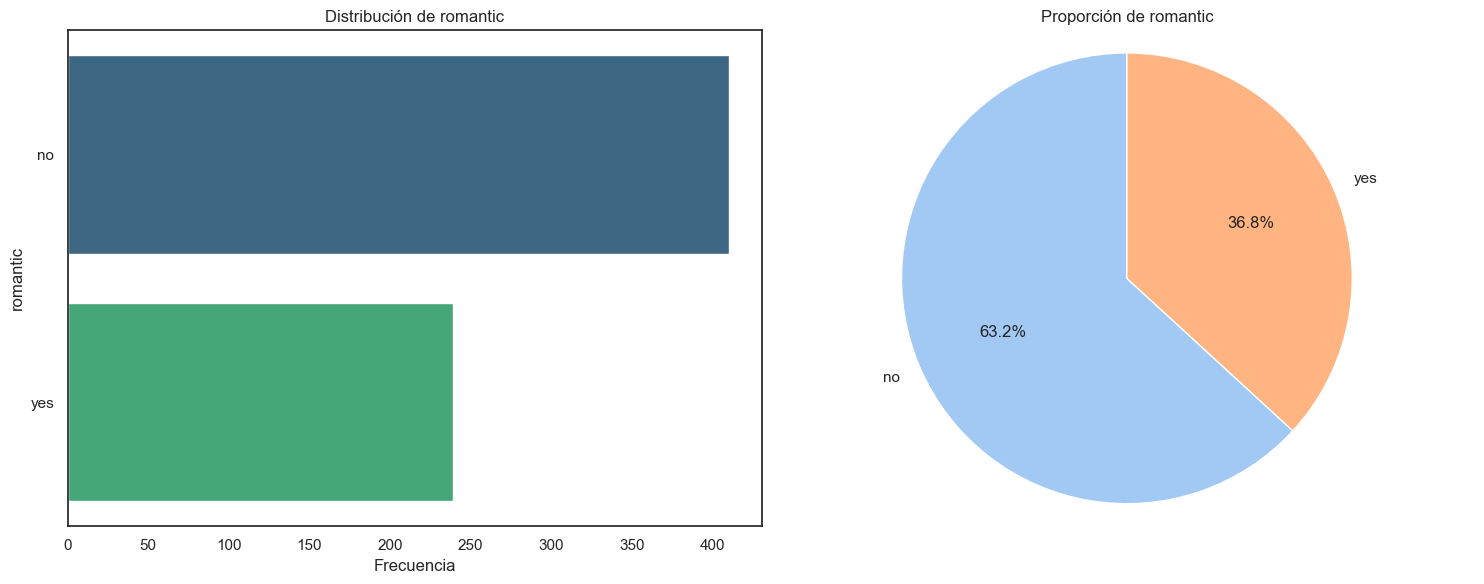

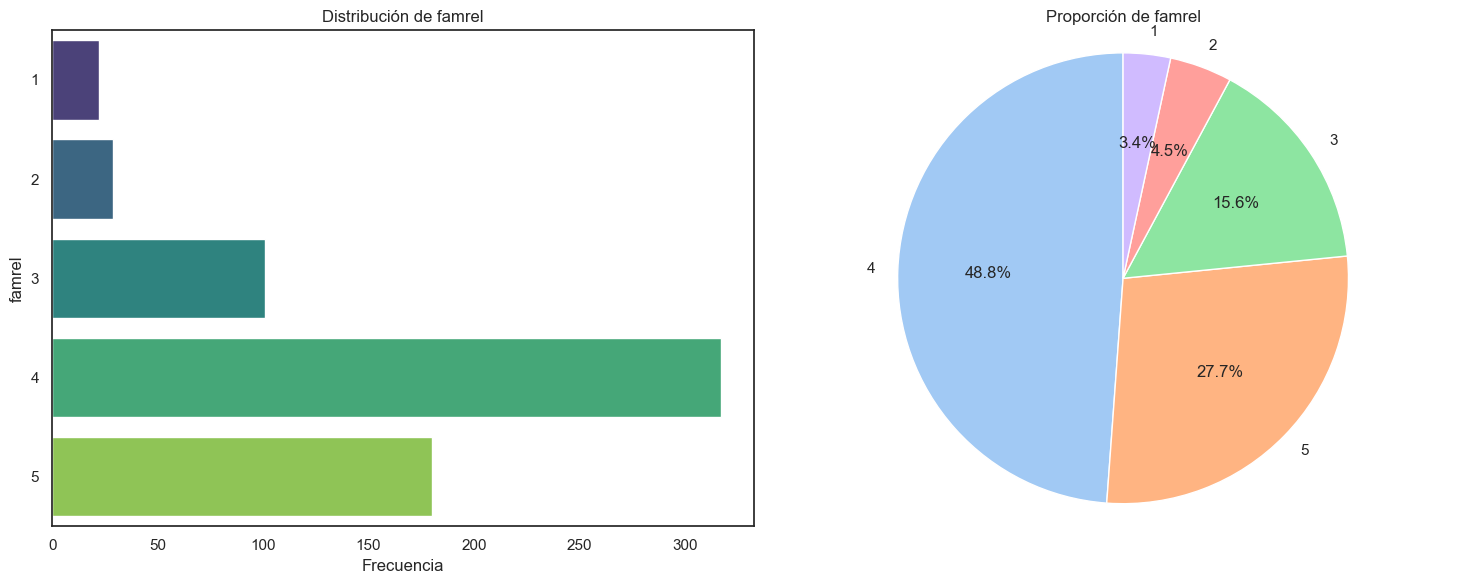

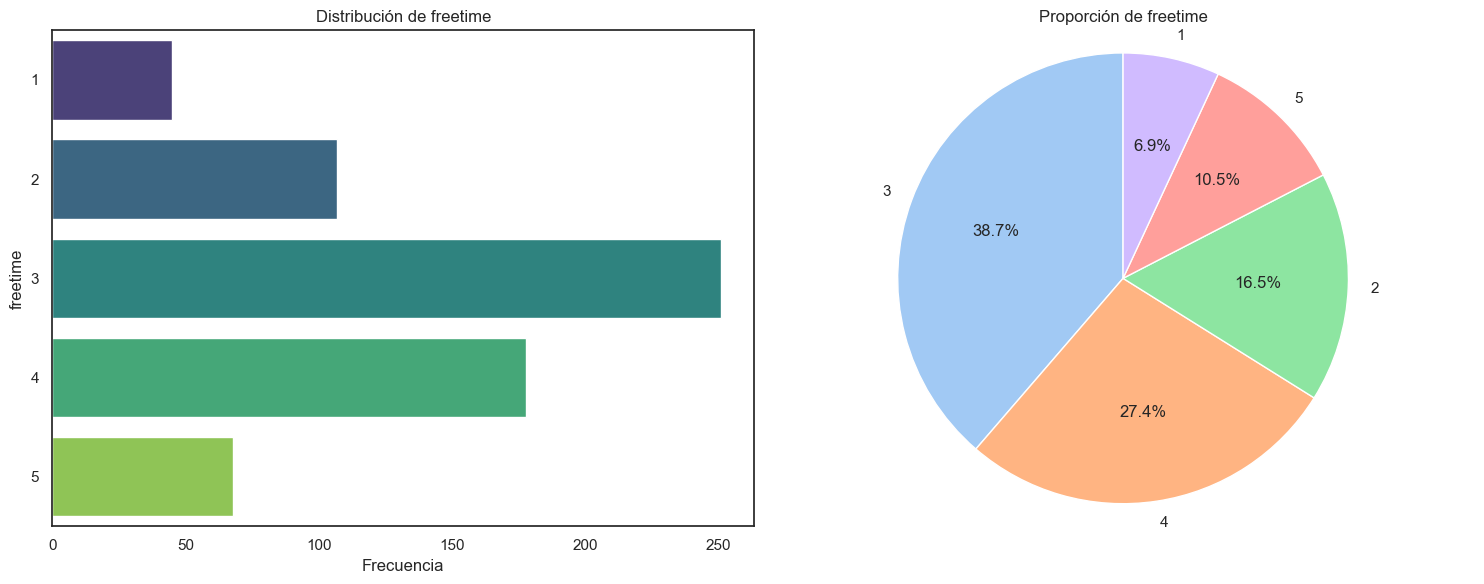

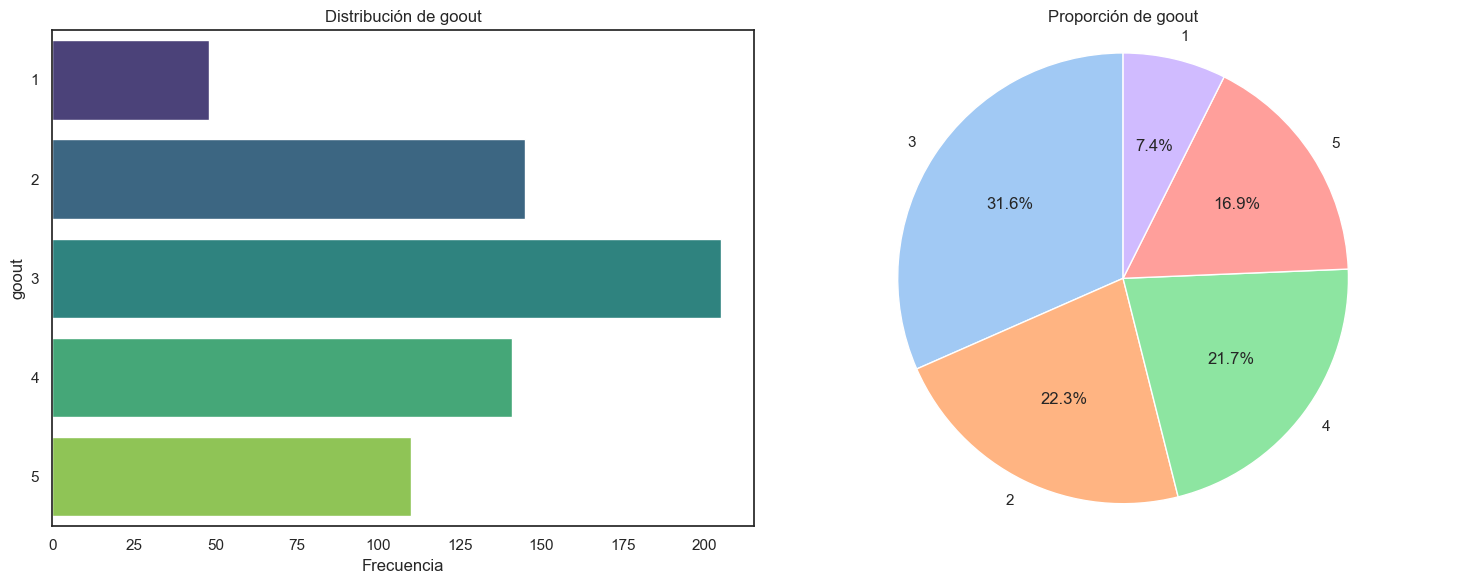

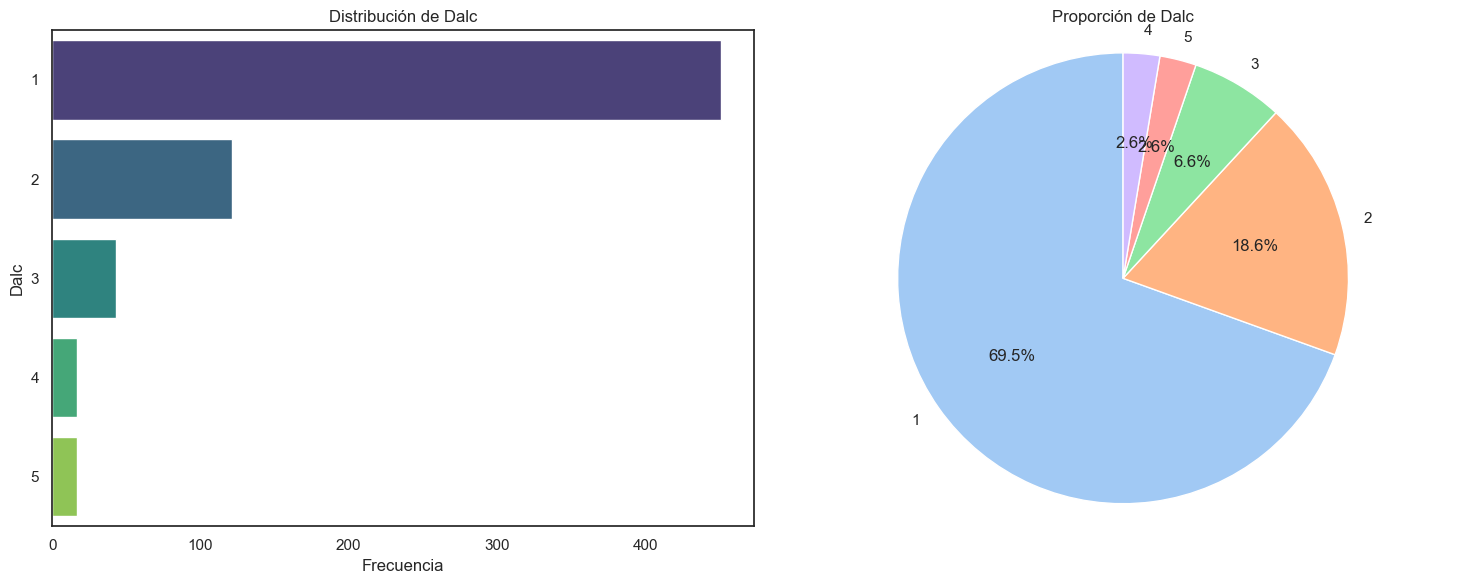

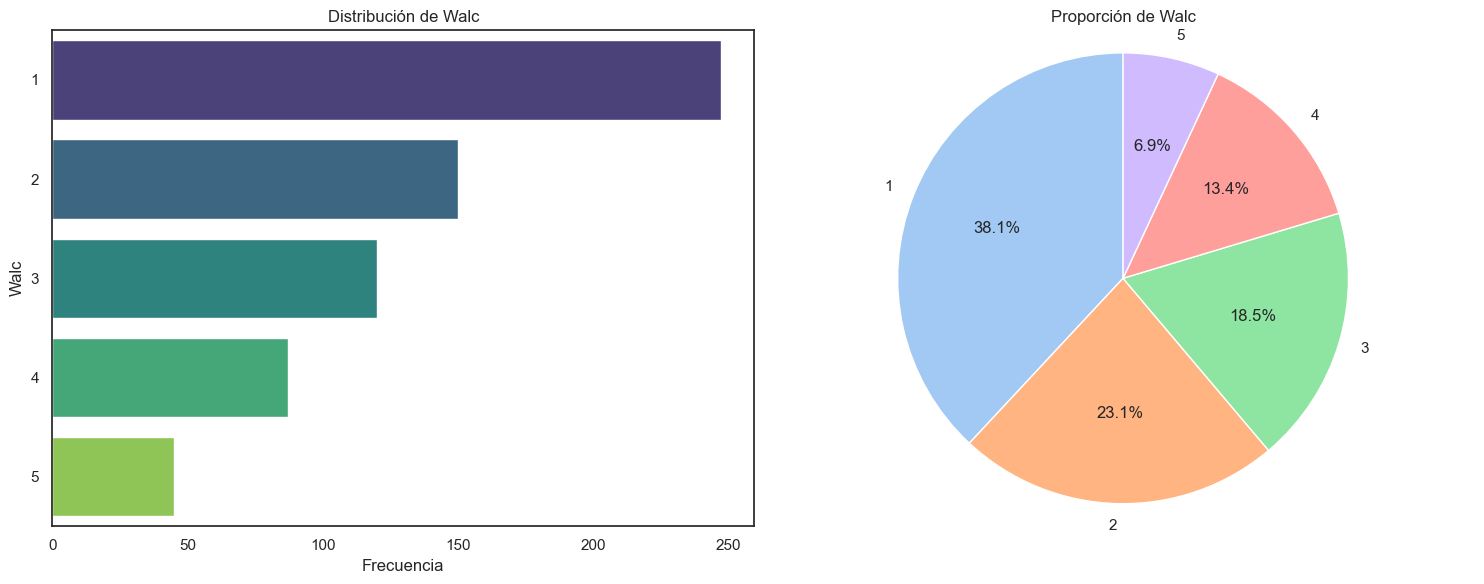

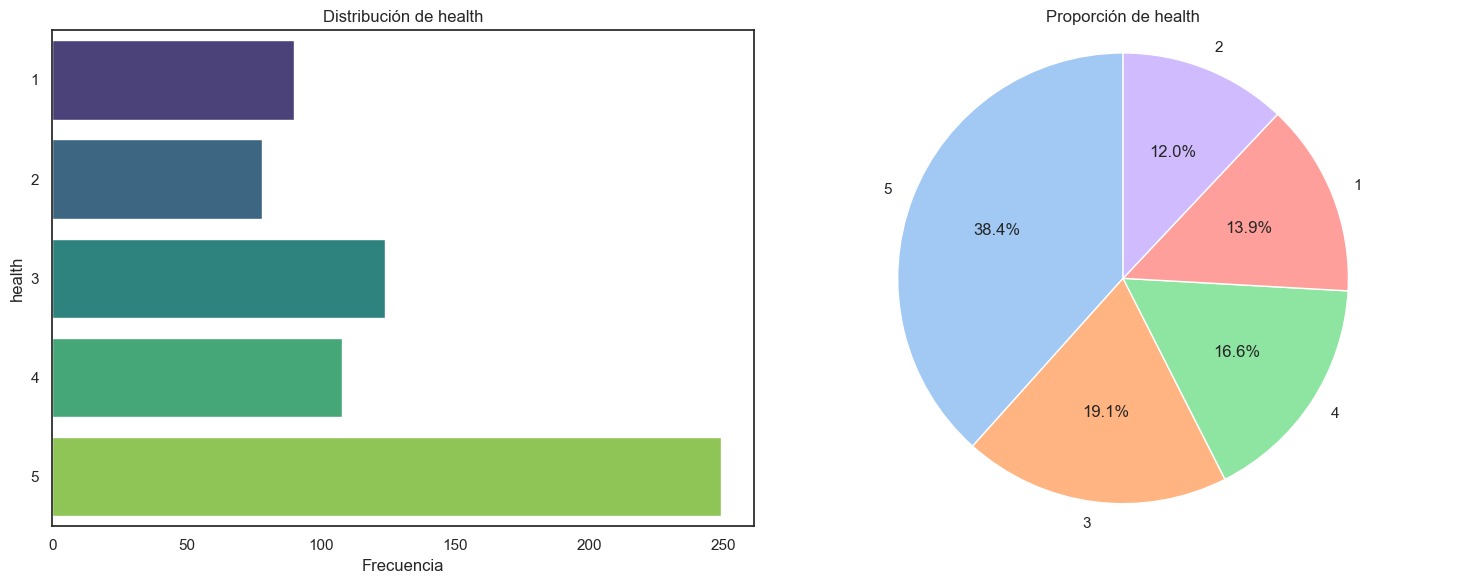

In [19]:
# Ejemplo de uso para cada variable categórica
for variable in variables_categoricas:
    grafico_categorico(variable, df_por)

### Gráficos de relación

<Figure size 1000x600 with 0 Axes>

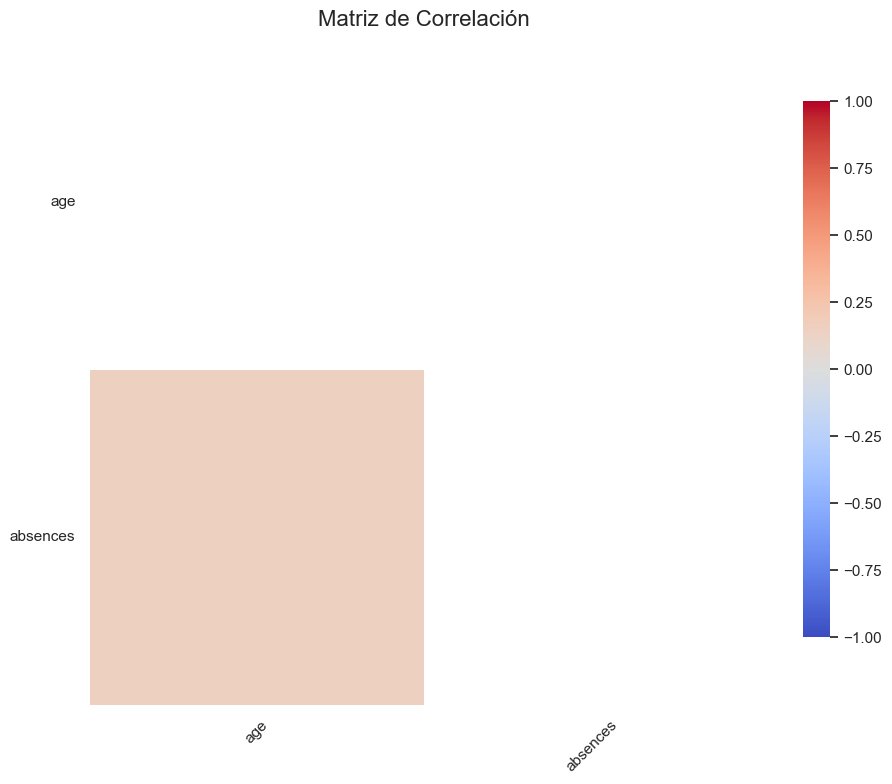

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configuración
sns.set(style="white")
plt.figure(figsize=(10, 6))

# --- 1. MATRIZ DE CORRELACIÓN (Para variables cuantitativas) ---
def matriz_correlacion(df, variables_cuantitativas):
    # Calcular matriz de correlación
    corr_matrix = df[variables_cuantitativas].corr(method='pearson')  # También puede ser 'spearman' o 'kendall'
    
    # Máscara para el triángulo superior
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                fmt=".2f", 
                cmap="coolwarm",
                vmin=-1, 
                vmax=1,
                center=0,
                square=True,
                linewidths=.5,
                cbar_kws={"shrink": .8})
    
    plt.title("Matriz de Correlación", fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

matriz_correlacion(df_por, variables_cuantitativas)

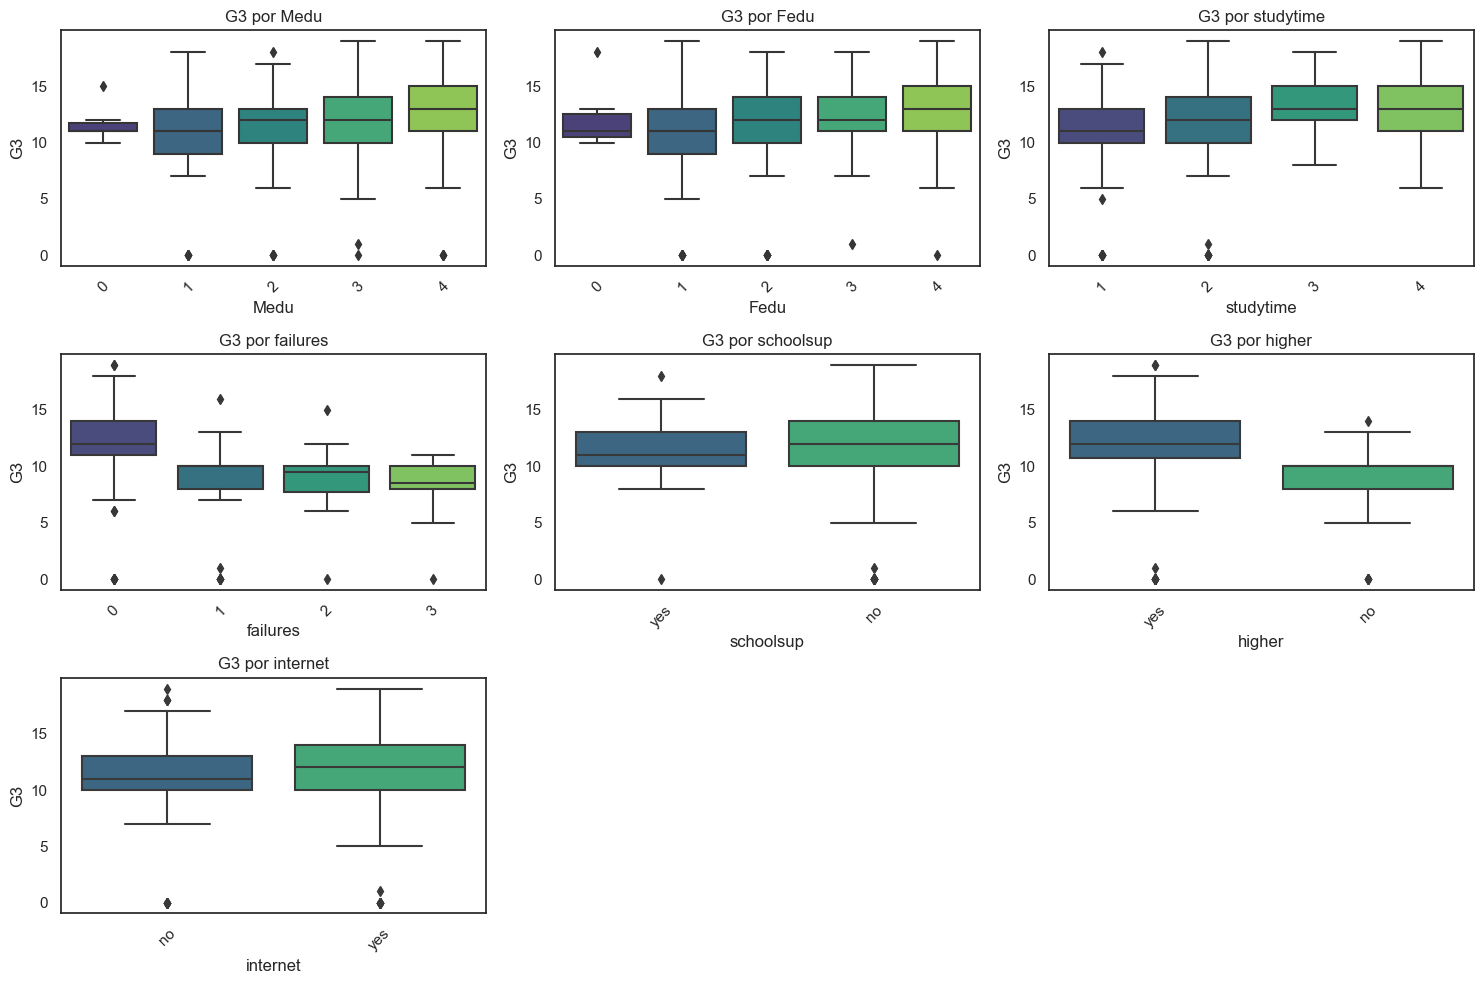

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables clave vs G3 (nota final)
variables_interes = ['Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'higher', 'internet']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_interes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_por, x=var, y='G3', palette='viridis')
    plt.title(f'G3 por {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

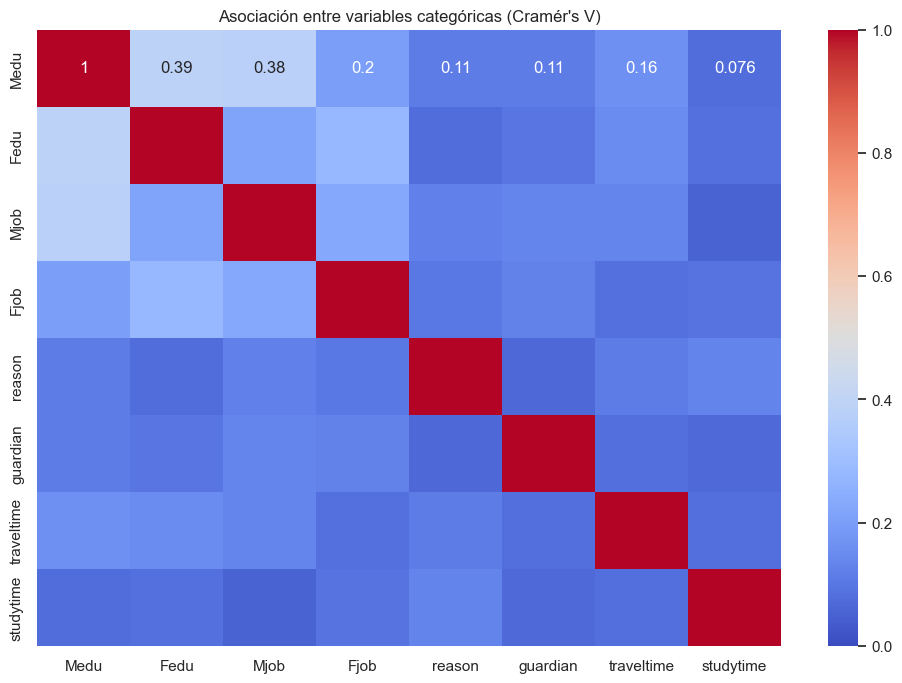

In [22]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Seleccionar categóricas (excluyendo binarias para simplificar)
categoricas = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime']

# Matriz de Cramér's V
corr_matrix = pd.DataFrame(index=categoricas, columns=categoricas)
for col1 in categoricas:
    for col2 in categoricas:
        corr_matrix.loc[col1, col2] = cramers_v(df_por[col1], df_por[col2])

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Asociación entre variables categóricas (Cramér's V)")
plt.show()

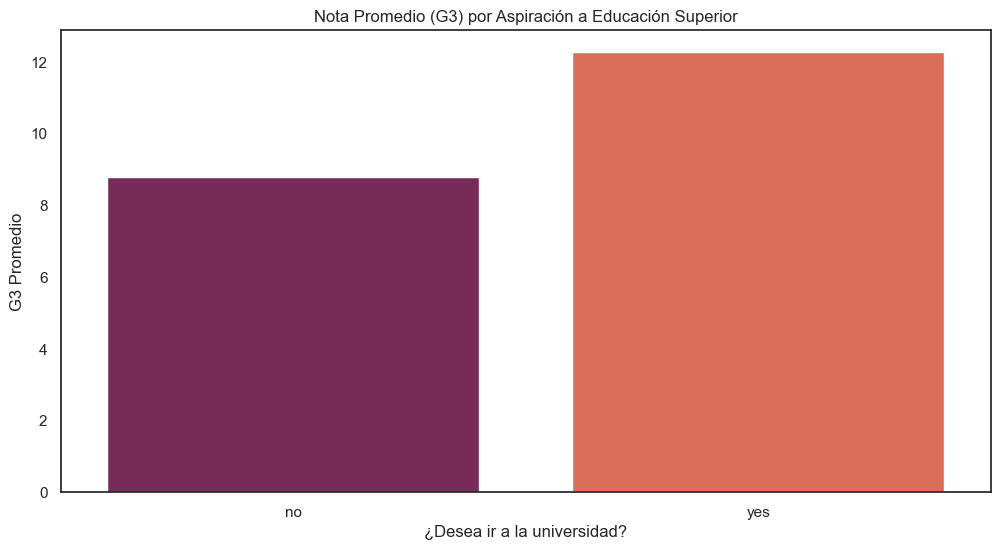

In [23]:
binarias = ['schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']

plt.figure(figsize=(12, 6))
df_grouped = df_por.groupby('higher')['G3'].mean().reset_index()
sns.barplot(data=df_grouped, x='higher', y='G3', palette='rocket')
plt.title("Nota Promedio (G3) por Aspiración a Educación Superior")
plt.ylabel("G3 Promedio")
plt.xlabel("¿Desea ir a la universidad?")
plt.show()

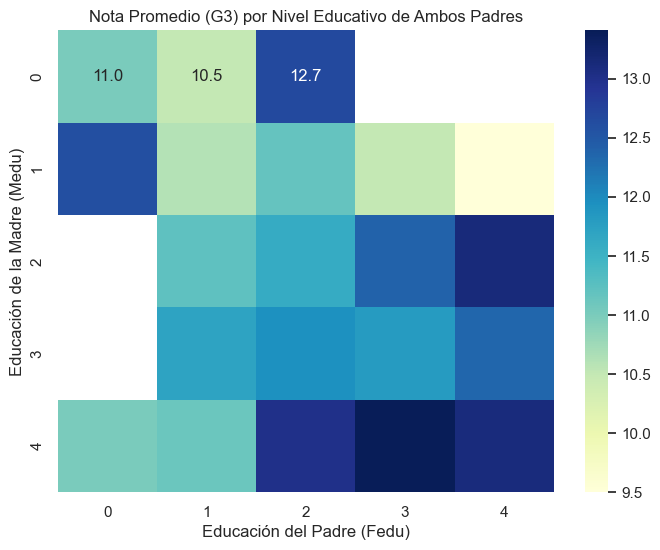

In [24]:
# Agrupar por dos variables categóricas y calcular G3 promedio
pivot_table = df_por.pivot_table(values='G3', index='Medu', columns='Fedu', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Nota Promedio (G3) por Nivel Educativo de Ambos Padres")
plt.xlabel("Educación del Padre (Fedu)")
plt.ylabel("Educación de la Madre (Medu)")
plt.show()

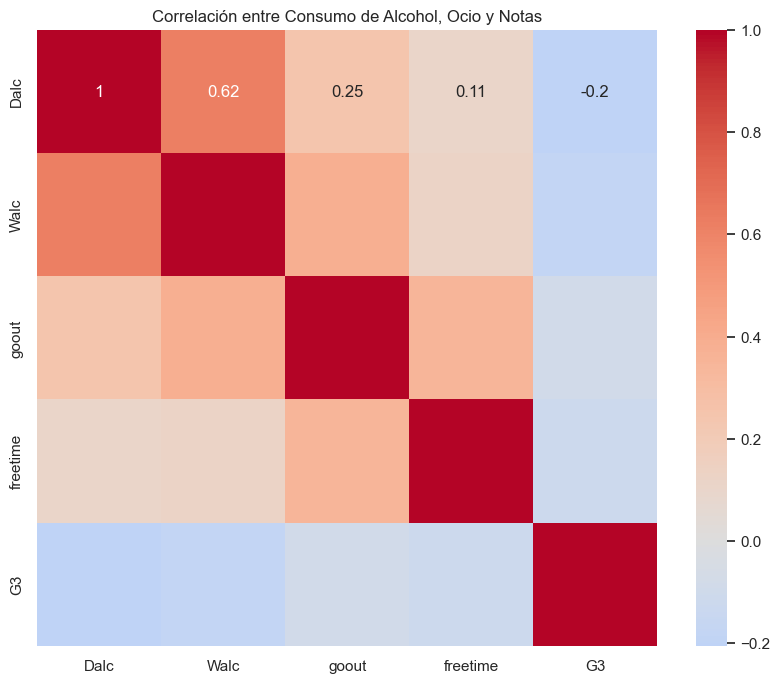

In [25]:
alcohol_vars = ['Dalc', 'Walc', 'goout', 'freetime']

plt.figure(figsize=(10, 8))
sns.heatmap(df_por[alcohol_vars + ['G3']].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlación entre Consumo de Alcohol, Ocio y Notas")
plt.show()

# Ajuste de los modelos

## Regresión Multilineal

In [26]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV


# ————————————————————————————————————————————————
# 0. Creación de una nueva variable objetivo
# ————————————————————————————————————————————————

 #data['passed'] = (data['G3'] >= 10).astype(int)
  #  X = data.drop(columns=['G1', 'G2', 'G3', 'passed'])
   # y = data['passed']   

# ————————————————————————————————————————————————
# 1. Prepara X, y y detecta columnas
# ————————————————————————————————————————————————
y = df_por['G3']
X = df_por.drop(columns=['G1', 'G2', 'G3'])

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ————————————————————————————————————————————————
# 2. Crea el preprocesador
# ————————————————————————————————————————————————
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('passthru', 'passthrough', num_cols)
])

# ————————————————————————————————————————————————
# 3. Validación cruzada con OLS simple
# ————————————————————————————————————————————————
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ols_pipe = make_pipeline(preprocessor, LinearRegression())

cv_scores = cross_val_score(
    ols_pipe, X, y,
    cv=kf,
    scoring='r2'
)

print("R² CV (OLS):", cv_scores)
print("R² CV media:", cv_scores.mean())

# ————————————————————————————————————————————————
# 4. Ajuste final del modelo 
# ————————————————————————————————————————————————
# Aquí usamos Ridge con búsqueda interna de α vía CV
ridge_pipe = make_pipeline(
    preprocessor,
    RidgeCV(alphas=[0.1, 1.0, 10.0], cv=kf)
)
ridge_pipe.fit(X, y)

best_alpha = ridge_pipe.named_steps['ridgecv'].alpha_
print(f"Mejor α (RidgeCV): {best_alpha:.3f}")
print("R² en todo el set (Ridge):", ridge_pipe.score(X, y))

# Si prefieres Lasso:
lasso_pipe = make_pipeline(
    preprocessor,
    LassoCV(alphas=[0.01, 0.1, 1.0], cv=kf, max_iter=5000)
)
lasso_pipe.fit(X, y)
best_alpha_l = lasso_pipe.named_steps['lassocv'].alpha_
print(f"Mejor α (LassoCV): {best_alpha_l:.3f}")
print("R² en todo el set (Lasso):", lasso_pipe.score(X, y))



R² CV (OLS): [0.16016992 0.3609556  0.26625703 0.3085361  0.13588923]
R² CV media: 0.24636157744742743
Mejor α (RidgeCV): 10.000
R² en todo el set (Ridge): 0.3583819714985821
Mejor α (LassoCV): 0.010
R² en todo el set (Lasso): 0.3577478460178505


## Regresión Binomial

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def clasificacion_binaria(
    df,
    target='G3',
    eliminar_cols=None,
    test_size=0.25,
    random_state=42,
    mostrar_info=True,
    penalty_type='l2',  # Nuevo parámetro: 'l1', 'l2' o 'elasticnet'
    C=0.01,  # Fuerza de regularización (inverso)
    l1_ratio=0.5,  # Solo relevante para elasticnet
    mostrar_correlacion=True,  # Nuevo parámetro para activar el gráfico
    umbral_correlacion=0.5  # Umbral para destacar correlaciones altas
):
    """
    Clasificación binaria realista con LogisticRegression.
    Incluye métricas realistas y manejo de desbalance.

    Parámetros:
    - df: DataFrame.
    - target: columna numérica base (e.g. 'G3') para definir 'passed'.
    - eliminar_cols: columnas a eliminar además de target (e.g. 'G1', 'G2').
    - test_size: proporción para test split.
    - random_state: para reproducibilidad.
    - mostrar_info: si True, imprime métricas resumidas.
    - penalty_type: 'l1', 'l2' o 'elasticnet' (tipo de penalización)
    - C: inverso de la fuerza de regularización (valores más bajos = más regularización)
    - l1_ratio: proporción de L1 en elasticnet (0.5 = 50% L1, 50% L2)

    Retorna:
    - Diccionario con métricas, predicciones y el modelo entrenado.
    """
    df = df.copy()
    df['passed'] = (df[target] >= 10).astype(int)
    y = df['passed']

    drop_cols = [target, 'passed']
    if eliminar_cols:
        drop_cols.extend(eliminar_cols)
    X = df.drop(columns=drop_cols)

    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X.select_dtypes(include=['number']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
        ('passthru', 'passthrough', num_cols)
    ])

    # Split con estratificación
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    solver_options = {
        'l1': 'liblinear',
        'l2': 'lbfgs',
        'elasticnet': 'saga'
    }
    
    clf = LogisticRegression(
        penalty=penalty_type,
        C=C,
        solver=solver_options[penalty_type],
        l1_ratio=l1_ratio if penalty_type == 'elasticnet' else None,
        class_weight='balanced',
        max_iter=5000,
        random_state=random_state
    )
    clf_pipe = make_pipeline(preprocessor, clf)
    clf_pipe.fit(X_train, y_train)

    y_pred = clf_pipe.predict(X_test)
    y_pred_proba = clf_pipe.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec_pos = precision_score(y_test, y_pred)
    prec_neg = precision_score(y_test, y_pred, pos_label=0)
    rec_pos = recall_score(y_test, y_pred)
    rec_neg = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    if mostrar_info:
        cv_scores = cross_val_score(
            make_pipeline(preprocessor, clf), 
            X, y, cv=5, scoring='accuracy'
        )
        print(f"Accuracy: {acc:.3f}")
        print(f"ROC AUC: {auc:.3f}")
        print(f"Precisión positiva: {prec_pos:.3f}")
        print(f"Precisión negativa: {prec_neg:.3f}")
        print(f"Recall positivo: {rec_pos:.3f}")
        print(f"Recall negativo: {rec_neg:.3f}")
        print(f"F1-score: {f1:.3f}")
        print("Matriz de confusión:\n", cm)

    
    return {
        'Accuracy (test)': acc,
        'ROC AUC (test)': auc,
        'Precision positiva': prec_pos,
        'Precision negativa': prec_neg,
        'Recall positivo': rec_pos,
        'Recall negativo': rec_neg,
        'F1-score': f1,
        'Confusion matrix': cm,
        'Reporte': report,
        'Modelo': clf_pipe,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def clasificacion_binaria_sin_pen(
    df,
    target='G3',
    eliminar_cols=None,
    test_size=0.25,
    random_state=42,
    mostrar_info=True,
    penalty_type='l2',  # Nuevo parámetro: 'l1', 'l2' o 'elasticnet'
    C=0.01,  # Fuerza de regularización (inverso)
    l1_ratio=0.5,  # Solo relevante para elasticnet
    mostrar_correlacion=True,  # Nuevo parámetro para activar el gráfico
    umbral_correlacion=0.5  # Umbral para destacar correlaciones altas
):
    """
    Clasificación binaria realista con LogisticRegression.
    Incluye métricas realistas y manejo de desbalance.

    Parámetros:
    - df: DataFrame.
    - target: columna numérica base (e.g. 'G3') para definir 'passed'.
    - eliminar_cols: columnas a eliminar además de target (e.g. 'G1', 'G2').
    - test_size: proporción para test split.
    - random_state: para reproducibilidad.
    - mostrar_info: si True, imprime métricas resumidas.
    - penalty_type: 'l1', 'l2' o 'elasticnet' (tipo de penalización)
    - C: inverso de la fuerza de regularización (valores más bajos = más regularización)
    - l1_ratio: proporción de L1 en elasticnet (0.5 = 50% L1, 50% L2)

    Retorna:
    - Diccionario con métricas, predicciones y el modelo entrenado.
    """
    df = df.copy()
    df['passed'] = (df[target] >= 10).astype(int)
    y = df['passed']

    drop_cols = [target, 'passed']
    if eliminar_cols:
        drop_cols.extend(eliminar_cols)
    X = df.drop(columns=drop_cols)

    cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X.select_dtypes(include=['number']).columns.tolist()

    preprocessor = ColumnTransformer([
        ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
        ('passthru', 'passthrough', num_cols)
    ])

    # Split con estratificación
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    solver_options = {
        'l1': 'liblinear',
        'l2': 'lbfgs',
        'elasticnet': 'saga'
    }
    
    clf = LogisticRegression(
        penalty=None,
        C=C,
        solver=solver_options[penalty_type],
        l1_ratio=l1_ratio if penalty_type == 'elasticnet' else None,
        class_weight='balanced',
        max_iter=5000,
        random_state=random_state
    )
    clf_pipe = make_pipeline(preprocessor, clf)
    clf_pipe.fit(X_train, y_train)

    y_pred = clf_pipe.predict(X_test)
    y_pred_proba = clf_pipe.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    prec_pos = precision_score(y_test, y_pred)
    prec_neg = precision_score(y_test, y_pred, pos_label=0)
    rec_pos = recall_score(y_test, y_pred)
    rec_neg = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    if mostrar_info:
        cv_scores = cross_val_score(
            make_pipeline(preprocessor, clf), 
            X, y, cv=5, scoring='accuracy'
        )
        print(f"Accuracy: {acc:.3f}")
        print(f"ROC AUC: {auc:.3f}")
        print(f"Precisión positiva: {prec_pos:.3f}")
        print(f"Precisión negativa: {prec_neg:.3f}")
        print(f"Recall positivo: {rec_pos:.3f}")
        print(f"Recall negativo: {rec_neg:.3f}")
        print(f"F1-score: {f1:.3f}")
        print("Matriz de confusión:\n", cm)

    
    return {
        'Accuracy (test)': acc,
        'ROC AUC (test)': auc,
        'Precision positiva': prec_pos,
        'Precision negativa': prec_neg,
        'Recall positivo': rec_pos,
        'Recall negativo': rec_neg,
        'F1-score': f1,
        'Confusion matrix': cm,
        'Reporte': report,
        'Modelo': clf_pipe,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


### Resultados para la base de Portugués

In [87]:

resultados = clasificacion_binaria_sin_pen(
    df=df_por,
    target='G3',
    eliminar_cols=['G1', 'G2'],
)


Accuracy: 0.675
ROC AUC: 0.666
Precisión positiva: 0.890
Precisión negativa: 0.241
Recall positivo: 0.703
Recall negativo: 0.520
F1-score: 0.785
Matriz de confusión:
 [[13 12]
 [41 97]]


In [88]:
# Paso 1: Obtén el modelo entrenado desde resultados
modelo_entrenado = resultados['Modelo']

# Paso 2: Accede al preprocesador y al modelo interno
preprocessor = modelo_entrenado.named_steps['columntransformer']
modelo = modelo_entrenado.named_steps['logisticregression']

# Paso 3: Recupera los nombres de variables después de one-hot encoding
cat_cols = preprocessor.transformers_[0][2]
num_cols = preprocessor.transformers_[1][2]
ohe = preprocessor.named_transformers_['ohe']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([ohe_features, num_cols])

# Paso 4: Obtén los coeficientes y ordénalos por importancia absoluta
coefs = modelo.coef_[0]
import pandas as pd

importancia = pd.DataFrame({'Variable': all_features, 'Coeficiente': coefs})
importancia['Importancia absoluta'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values('Importancia absoluta', ascending=False)

# Paso 5: Muestra el top 10 de factores más importantes
print("Top 10 factores más relevantes (valor absoluto):")
print(importancia.head(10))

Top 10 factores más relevantes (valor absoluto):
           Variable  Coeficiente  Importancia absoluta
0         school_MS    -2.710254              2.710254
23       higher_yes     2.286082              2.286082
16  guardian_mother    -1.992025              1.992025
8      Mjob_teacher     1.951751              1.951751
11    Fjob_services    -1.935899              1.935899
17   guardian_other    -1.895875              1.895875
31         failures    -1.457590              1.457590
5       Mjob_health     1.300971              1.300971
10       Fjob_other    -0.965785              0.965785
3       famsize_LE3     0.812214              0.812214


### Resultados penalizados por Lasso (L1) para la base de Portugués

In [90]:
resultados = clasificacion_binaria(
    df=df_por,
    target='G3',
    eliminar_cols=['G1', 'G2'],
    penalty_type='l1',
    C=0.1  # Regularización fuerte
)

Accuracy: 0.699
ROC AUC: 0.719
Precisión positiva: 0.908
Precisión negativa: 0.278
Recall positivo: 0.717
Recall negativo: 0.600
F1-score: 0.802
Matriz de confusión:
 [[15 10]
 [39 99]]


In [91]:
# Paso 1: Obtén el modelo entrenado desde resultados
modelo_entrenado = resultados['Modelo']

# Paso 2: Accede al preprocesador y al modelo interno
preprocessor = modelo_entrenado.named_steps['columntransformer']
modelo = modelo_entrenado.named_steps['logisticregression']

# Paso 3: Recupera los nombres de variables después de one-hot encoding
cat_cols = preprocessor.transformers_[0][2]
num_cols = preprocessor.transformers_[1][2]
ohe = preprocessor.named_transformers_['ohe']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([ohe_features, num_cols])

# Paso 4: Obtén los coeficientes y ordénalos por importancia absoluta
coefs = modelo.coef_[0]
import pandas as pd

importancia = pd.DataFrame({'Variable': all_features, 'Coeficiente': coefs})
importancia['Importancia absoluta'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values('Importancia absoluta', ascending=False)

# Paso 5: Muestra el top 10 de factores más importantes
print("Top 10 factores más relevantes (valor absoluto):")
print(importancia.head(10))

Top 10 factores más relevantes (valor absoluto):
           Variable  Coeficiente  Importancia absoluta
0         school_MS    -1.390946              1.390946
31         failures    -0.958985              0.958985
23       higher_yes     0.841326              0.841326
16  guardian_mother    -0.238076              0.238076
27             Medu     0.212017              0.212017
30        studytime     0.137309              0.137309
33         freetime    -0.109912              0.109912
35             Dalc    -0.099876              0.099876
36             Walc    -0.090146              0.090146
38         absences    -0.068472              0.068472


### Resultados penalizados por Ridge (L2) para la base de Portugués

In [92]:
resultados = clasificacion_binaria(
    df=df_por,
    target='G3',
    eliminar_cols=['G1', 'G2'],
    penalty_type='l2',
    C=0.1  # Regularización fuerte
)

Accuracy: 0.669
ROC AUC: 0.678
Precisión positiva: 0.889
Precisión negativa: 0.236
Recall positivo: 0.696
Recall negativo: 0.520
F1-score: 0.780
Matriz de confusión:
 [[13 12]
 [42 96]]


In [93]:
# Paso 1: Obtén el modelo entrenado desde resultados
modelo_entrenado = resultados['Modelo']

# Paso 2: Accede al preprocesador y al modelo interno
preprocessor = modelo_entrenado.named_steps['columntransformer']
modelo = modelo_entrenado.named_steps['logisticregression']

# Paso 3: Recupera los nombres de variables después de one-hot encoding
cat_cols = preprocessor.transformers_[0][2]
num_cols = preprocessor.transformers_[1][2]
ohe = preprocessor.named_transformers_['ohe']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([ohe_features, num_cols])

# Paso 4: Obtén los coeficientes y ordénalos por importancia absoluta
coefs = modelo.coef_[0]
import pandas as pd

importancia = pd.DataFrame({'Variable': all_features, 'Coeficiente': coefs})
importancia['Importancia absoluta'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values('Importancia absoluta', ascending=False)

# Paso 5: Muestra el top 10 de factores más importantes
print("Top 10 factores más relevantes (valor absoluto):")
print(importancia.head(10))

Top 10 factores más relevantes (valor absoluto):
             Variable  Coeficiente  Importancia absoluta
0           school_MS    -1.157570              1.157570
31           failures    -0.911354              0.911354
23         higher_yes     0.815818              0.815818
16    guardian_mother    -0.602505              0.602505
2           address_U     0.446147              0.446147
15  reason_reputation     0.334682              0.334682
11      Fjob_services    -0.332102              0.332102
20           paid_yes    -0.286655              0.286655
8        Mjob_teacher     0.279366              0.279366
3         famsize_LE3     0.238968              0.238968


### Resultados para la base de Matemáticas

In [81]:
resultados = clasificacion_binaria_sin_pen(
    df=df_mat,
    target='G3',
    eliminar_cols=['G1', 'G2'],
)

Accuracy: 0.576
ROC AUC: 0.567
Precisión positiva: 0.694
Precisión negativa: 0.378
Recall positivo: 0.652
Recall negativo: 0.424
F1-score: 0.672
Matriz de confusión:
 [[14 19]
 [23 43]]


In [82]:
# Paso 1: Obtén el modelo entrenado desde resultados
modelo_entrenado = resultados['Modelo']

# Paso 2: Accede al preprocesador y al modelo interno
preprocessor = modelo_entrenado.named_steps['columntransformer']
modelo = modelo_entrenado.named_steps['logisticregression']

# Paso 3: Recupera los nombres de variables después de one-hot encoding
cat_cols = preprocessor.transformers_[0][2]
num_cols = preprocessor.transformers_[1][2]
ohe = preprocessor.named_transformers_['ohe']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([ohe_features, num_cols])

# Paso 4: Obtén los coeficientes y ordénalos por importancia absoluta
coefs = modelo.coef_[0]
import pandas as pd

importancia = pd.DataFrame({'Variable': all_features, 'Coeficiente': coefs})
importancia['Importancia absoluta'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values('Importancia absoluta', ascending=False)

# Paso 5: Muestra el top 10 de factores más importantes
print("Top 10 factores más relevantes (valor absoluto):")
print(importancia.head(10))

Top 10 factores más relevantes (valor absoluto):
          Variable  Coeficiente  Importancia absoluta
31        failures    -1.555340              1.555340
23      higher_yes     1.231674              1.231674
18   schoolsup_yes    -1.170145              1.170145
17  guardian_other    -1.130696              1.130696
8     Mjob_teacher    -0.939603              0.939603
4        Pstatus_T    -0.924759              0.924759
5      Mjob_health     0.903120              0.903120
11   Fjob_services    -0.740512              0.740512
9      Fjob_health    -0.650360              0.650360
6       Mjob_other    -0.640376              0.640376


### Resultados penalizados por Lasso (L1) para la base de Matemáticas

In [83]:
resultados = clasificacion_binaria(
    df=df_mat,
    target='G3',
    eliminar_cols=['G1', 'G2'],
    penalty_type='l1',
    C=0.1  # Regularización fuerte
)


Accuracy: 0.606
ROC AUC: 0.603
Precisión positiva: 0.690
Precisión negativa: 0.393
Recall positivo: 0.742
Recall negativo: 0.333
F1-score: 0.715
Matriz de confusión:
 [[11 22]
 [17 49]]


In [84]:
# Paso 1: Obtén el modelo entrenado desde resultados
modelo_entrenado = resultados['Modelo']

# Paso 2: Accede al preprocesador y al modelo interno
preprocessor = modelo_entrenado.named_steps['columntransformer']
modelo = modelo_entrenado.named_steps['logisticregression']

# Paso 3: Recupera los nombres de variables después de one-hot encoding
cat_cols = preprocessor.transformers_[0][2]
num_cols = preprocessor.transformers_[1][2]
ohe = preprocessor.named_transformers_['ohe']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([ohe_features, num_cols])

# Paso 4: Obtén los coeficientes y ordénalos por importancia absoluta
coefs = modelo.coef_[0]
import pandas as pd

importancia = pd.DataFrame({'Variable': all_features, 'Coeficiente': coefs})
importancia['Importancia absoluta'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values('Importancia absoluta', ascending=False)

# Paso 5: Muestra el top 10 de factores más importantes
print("Top 10 factores más relevantes (valor absoluto):")
print(importancia.head(10))

Top 10 factores más relevantes (valor absoluto):
        Variable  Coeficiente  Importancia absoluta
31      failures    -0.809448              0.809448
34         goout    -0.232754              0.232754
36          Walc     0.134232              0.134232
27          Medu     0.065638              0.065638
26           age     0.037295              0.037295
38      absences    -0.014830              0.014830
32        famrel     0.007176              0.007176
22   nursery_yes     0.000000              0.000000
23    higher_yes     0.000000              0.000000
24  internet_yes     0.000000              0.000000


### Resultados penalizados por Ridge (L2) para la base de Matemáticas

In [85]:
resultados = clasificacion_binaria(
    df=df_mat,
    target='G3',
    eliminar_cols=['G1', 'G2'],
    penalty_type='l2',
    C=0.1  # Regularización fuerte
)

Accuracy: 0.616
ROC AUC: 0.609
Precisión positiva: 0.712
Precisión negativa: 0.424
Recall positivo: 0.712
Recall negativo: 0.424
F1-score: 0.712
Matriz de confusión:
 [[14 19]
 [19 47]]


In [86]:
# Paso 1: Obtén el modelo entrenado desde resultados
modelo_entrenado = resultados['Modelo']

# Paso 2: Accede al preprocesador y al modelo interno
preprocessor = modelo_entrenado.named_steps['columntransformer']
modelo = modelo_entrenado.named_steps['logisticregression']

# Paso 3: Recupera los nombres de variables después de one-hot encoding
cat_cols = preprocessor.transformers_[0][2]
num_cols = preprocessor.transformers_[1][2]
ohe = preprocessor.named_transformers_['ohe']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([ohe_features, num_cols])

# Paso 4: Obtén los coeficientes y ordénalos por importancia absoluta
coefs = modelo.coef_[0]
import pandas as pd

importancia = pd.DataFrame({'Variable': all_features, 'Coeficiente': coefs})
importancia['Importancia absoluta'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values('Importancia absoluta', ascending=False)

# Paso 5: Muestra el top 10 de factores más importantes
print("Top 10 factores más relevantes (valor absoluto):")
print(importancia.head(10))

Top 10 factores más relevantes (valor absoluto):
          Variable  Coeficiente  Importancia absoluta
31        failures    -0.852184              0.852184
34           goout    -0.445063              0.445063
18   schoolsup_yes    -0.400671              0.400671
8     Mjob_teacher    -0.337661              0.337661
36            Walc     0.301682              0.301682
7    Mjob_services     0.257222              0.257222
5      Mjob_health     0.254349              0.254349
23      higher_yes     0.254166              0.254166
21  activities_yes    -0.219490              0.219490
4        Pstatus_T    -0.199078              0.199078


## Importancias

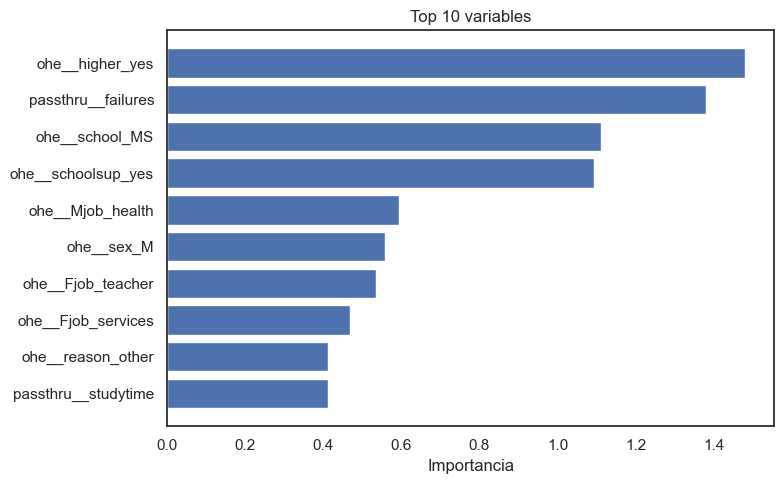

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

# ————————————————————————————————————————————————
# 1. 
# ————————————————————————————————————————————————

# Columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocesador
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
    ('passthru', 'passthrough', num_cols)
])

# 5-fold CV para Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_pipe = make_pipeline(
    preprocessor,
    RidgeCV(alphas=[0.1, 1.0, 10.0], cv=kf)
)

# Ajuste
ridge_pipe.fit(X, y)

# Extraer nombres de variables y coeficientes
feature_names = ridge_pipe.named_steps['columntransformer'].get_feature_names_out()
coefs = ridge_pipe.named_steps['ridgecv'].coef_.flatten()

# Importancia = valor absoluto del coeficiente
importances = np.abs(coefs)
imp_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Top 10 variables
top_n = 10
top_imp = imp_series.head(top_n)

# Gráfico de barras horizontales
plt.figure(figsize=(8, 5))
plt.barh(top_imp.index[::-1], top_imp.values[::-1])
plt.xlabel('Importancia')
plt.title(f'Top {top_n} variables')
plt.tight_layout()
plt.show()


In [33]:
print(top_imp)

ohe__higher_yes        1.480742
passthru__failures     1.380219
ohe__school_MS         1.110512
ohe__schoolsup_yes     1.092946
ohe__Mjob_health       0.592498
ohe__sex_M             0.559046
ohe__Fjob_teacher      0.535480
ohe__Fjob_services     0.467047
ohe__reason_other      0.412789
passthru__studytime    0.410848
dtype: float64


## XGBoost


INICIANDO ANÁLISIS PARA: MATEMÁTICAS

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros encontrados:
  classifier__subsample: 1.0
  classifier__reg_lambda: 2.0
  classifier__reg_alpha: 0.1
  classifier__max_depth: 3
  classifier__learning_rate: 0.01
  classifier__gamma: 0.0
  classifier__colsample_bytree: 0.7
AUC en CV estimado (mejor): 0.723

--- Resultados de Evaluación para Matemáticas ---
Accuracy en hold-out (20%): 0.759
AUC en hold-out (20%):       0.687

Top 10 variables más importantes:
        feature  importance
       failures    0.073690
          goout    0.043364
         famrel    0.041959
   romantic_yes    0.038467
       absences    0.038421
   reason_other    0.037176
          sex_M    0.034950
guardian_mother    0.034320
guardian_father    0.032930
      Pstatus_T    0.030459


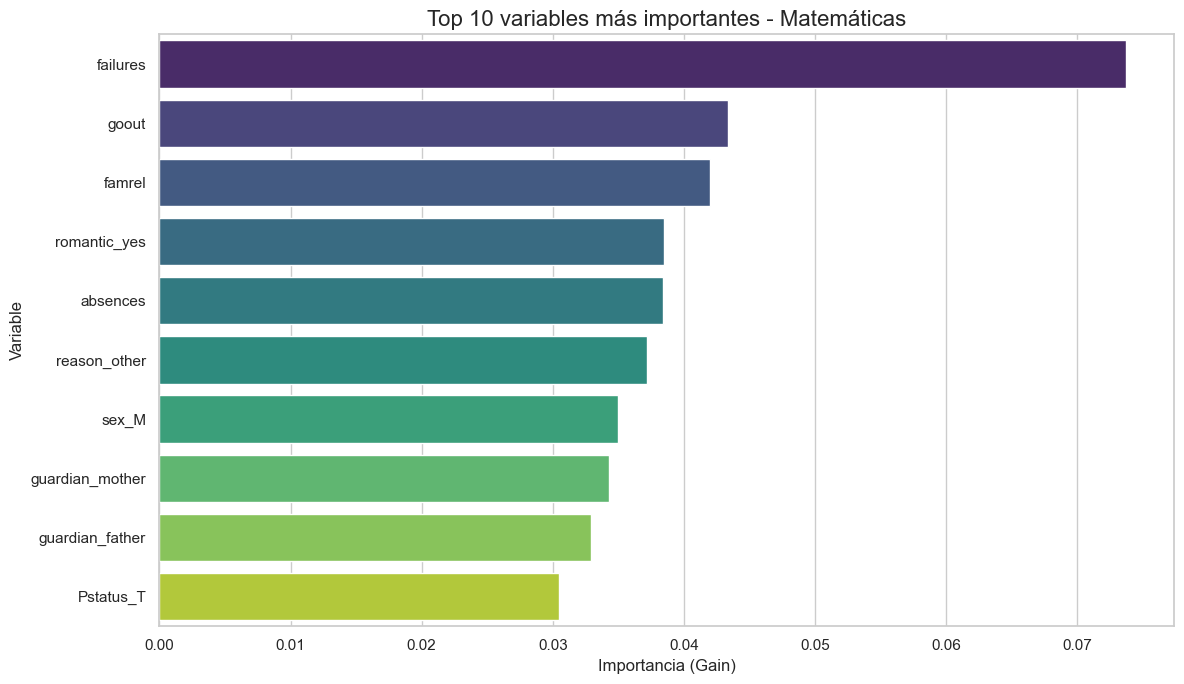


Matriz de confusión para Matemáticas:
[[ 9 17]
 [ 2 51]]


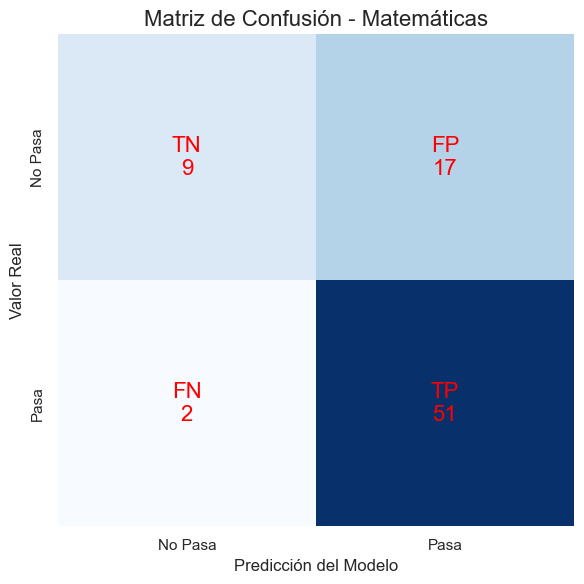


INICIANDO ANÁLISIS PARA: PORTUGUÉS

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros encontrados:
  classifier__subsample: 1.0
  classifier__reg_lambda: 5.0
  classifier__reg_alpha: 1.0
  classifier__max_depth: 5
  classifier__learning_rate: 0.03
  classifier__gamma: 0.5
  classifier__colsample_bytree: 0.8
AUC en CV estimado (mejor): 0.835

--- Resultados de Evaluación para Portugués ---
Accuracy en hold-out (20%): 0.877
AUC en hold-out (20%):       0.834

Top 10 variables más importantes:
        feature  importance
       failures    0.143057
      school_MS    0.100540
     higher_yes    0.075077
guardian_father    0.050906
    reason_home    0.046552
guardian_mother    0.039672
       freetime    0.028751
      studytime    0.024004
           Fedu    0.023961
         famrel    0.021989


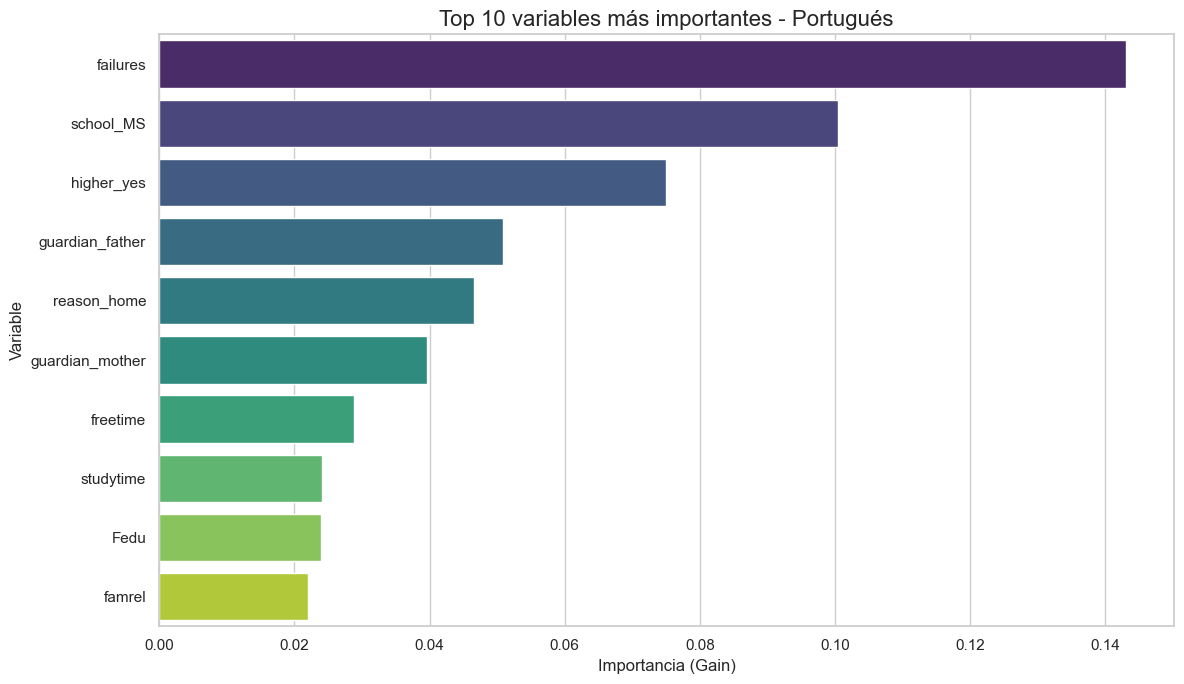


Matriz de confusión para Portugués:
[[  7  13]
 [  3 107]]


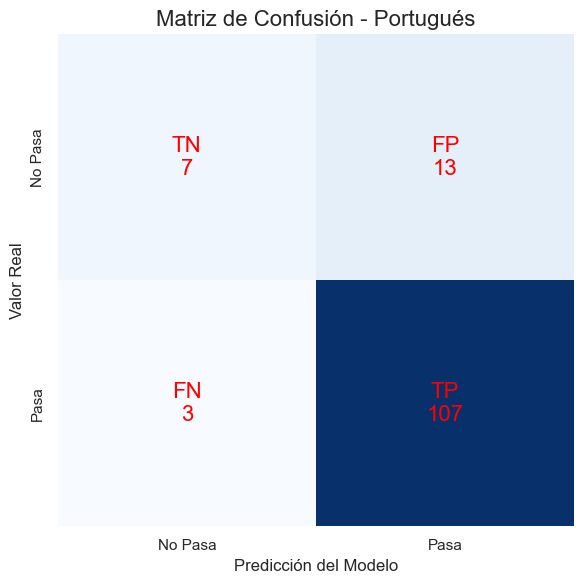

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de los archivos Excel (ya como DataFrames)
student_mat_df = pd.read_excel("data/student-mat.xlsx")
student_por_df = pd.read_excel("data/student-por.xlsx")

def analizar_dataset_XGBoost(data, subject_name):
    """
    Función que preprocesa, entrena y evalúa un modelo XGBoost
    para predecir la aprobación de un estudiante en una materia específica.
    """
    print(f"\n{'='*60}")
    print(f"INICIANDO ANÁLISIS PARA: {subject_name.upper()}")
    print(f"{'='*60}\n")

    # 1. Crear variable objetivo 'passed' para mejorar precision pues intentar predecir nota es muy ambicioso
    data['passed'] = (data['G3'] >= 10).astype(int)
    X = data.drop(columns=['G1', 'G2', 'G3', 'passed'])
    y = data['passed']

    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=0.20,
        random_state=73,
        stratify=y
    )

    # 2. Definición de columnas por tipo
    binary_cols = [
        'school', 'sex', 'address', 'famsize', 'Pstatus',
        'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'
    ]
    nominal_cat_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
    ordinal_num_cols = [
        'Medu', 'Fedu', 'traveltime', 'studytime',
        'failures', 'famrel', 'freetime', 'goout',
        'Dalc', 'Walc', 'health'
    ]
    numerical_cols = ['age', 'absences']

    # 3. Preprocesamiento
    preprocessor = ColumnTransformer([
        ('binary',  OneHotEncoder(drop='if_binary', sparse_output=False), binary_cols),
        ('nominal', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), nominal_cat_cols),
        ('pass',    'passthrough', ordinal_num_cols + numerical_cols)
    ])

    # 4. Pipeline de XGBoost
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier',   xgb.XGBClassifier(
            objective='binary:logistic',
            random_state=73,
            n_estimators=1000,
            use_label_encoder=False,
            eval_metric='logloss'
        ))
    ])

    # 5. Búsqueda de hiperparámetros
    param_dist = {
        'classifier__learning_rate':    [0.01, 0.03, 0.05, 0.1],
        'classifier__max_depth':        [3, 4, 5, 6],
        'classifier__subsample':        [0.5, 0.7, 0.8, 1.0],
        'classifier__colsample_bytree': [0.5, 0.7, 0.8, 1.0],
        'classifier__gamma':            [0.0, 0.1, 0.5, 1.0],
        'classifier__reg_alpha':        [0.0, 0.01, 0.1, 1.0],
        'classifier__reg_lambda':       [0.5, 1.0, 2.0, 5.0]
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=73)
    
    rand_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=50,
        scoring='roc_auc',
        cv=cv,
        n_jobs=-1,
        random_state=73,
        verbose=1
    )

    rand_search.fit(X_train, y_train)

    print("Mejores hiperparámetros encontrados:")
    best_params_raw = rand_search.best_params_
    for k, v in best_params_raw.items():
        print(f"  {k}: {v}")
    print(f"AUC en CV estimado (mejor): {rand_search.best_score_:.3f}")

    # 6. Entrenamiento del modelo final
    X_train_tr = preprocessor.fit_transform(X_train)
    X_val_tr   = preprocessor.transform(X_val)

    best_params = {
        k.replace('classifier__', ''): v
        for k, v in best_params_raw.items()
    }

    final_xgb = xgb.XGBClassifier(
        objective='binary:logistic',
        random_state=73,
        n_estimators=1000,
        use_label_encoder=False,
        eval_metric='logloss',
        **best_params,
        callbacks=[xgb.callback.EarlyStopping(rounds=50, save_best=True)]
    )

    final_xgb.fit(
        X_train_tr, y_train,
        eval_set=[(X_val_tr, y_val)],
        verbose=False
    )

    # 7. Evaluación
    y_val_pred = final_xgb.predict(X_val_tr)
    y_val_proba = final_xgb.predict_proba(X_val_tr)[:, 1]

    print(f"\n--- Resultados de Evaluación para {subject_name} ---")
    print(f"Accuracy en hold-out (20%): {accuracy_score(y_val, y_val_pred):.3f}")
    print(f"AUC en hold-out (20%):       {roc_auc_score(y_val, y_val_proba):.3f}")

    # 8. Importancia de características
    
    # Obtener los nombres de las características del preprocesador
    feat_names_raw = preprocessor.get_feature_names_out()

    # --- INICIO DE LA CORRECCIÓN ---
    # Limpiar los nombres para eliminar los prefijos del pipeline
    feat_names_clean = [
        name.replace('pass__', '').replace('binary__', '').replace('nominal__', '') 
        for name in feat_names_raw
    ]
    # --- FIN DE LA CORRECCIÓN ---

    importances = pd.DataFrame({
        # Usar los nombres limpios en el DataFrame
        'feature': feat_names_clean,
        'importance': final_xgb.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 variables más importantes:")
    print(importances.head(10).to_string(index=False))

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.barplot(
        data=importances.head(10),
        y="feature", x="importance",
        palette="viridis", ax=ax
    )
    ax.set_title(f"Top 10 variables más importantes - {subject_name}", fontsize=16)
    ax.set_xlabel("Importancia (Gain)", fontsize=12)
    ax.set_ylabel("Variable", fontsize=12)
    plt.tight_layout()
    plt.show()

    # 9. Matriz de confusión con etiquetas TN, FP, FN, TP
    cm = confusion_matrix(y_val, y_val_pred)
    
    # Imprimir matriz numérica
    print(f"\nMatriz de confusión para {subject_name}:")
    print(cm)
    
    # Crear gráfico personalizado con seaborn
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
                xticklabels=['No Pasa', 'Pasa'], 
                yticklabels=['No Pasa', 'Pasa'],
                cbar=False)

    # Añadir valores y etiquetas juntos
    for i in range(2):
        for j in range(2):
            label = ''
            if i == 0 and j == 0:
                label = f"TN\n{cm[i,j]}"
            elif i == 0 and j == 1:
                label = f"FP\n{cm[i,j]}"
            elif i == 1 and j == 0:
                label = f"FN\n{cm[i,j]}"
            else:
                label = f"TP\n{cm[i,j]}"
                
            plt.text(j+0.5, i+0.5, label, 
                     ha='center', va='center', 
                     fontsize=16, color='red')

    plt.title(f"Matriz de Confusión - {subject_name}", fontsize=16)
    plt.xlabel("Predicción del Modelo", fontsize=12)
    plt.ylabel("Valor Real", fontsize=12)
    plt.tight_layout()
    plt.show()


# Ejecución para Matemáticas y Portugués
datasets_to_analyze = [
    {'data': student_mat_df, 'subject': 'Matemáticas'},
    {'data': student_por_df, 'subject': 'Portugués'}
]

for dataset in datasets_to_analyze:
    analizar_dataset_XGBoost(dataset['data'], dataset['subject'])

## Random Forest

Acierto promedio Mate : 0.7266
AUC promedio Mate     : 0.6994
Matriz de confusión para Mate:
[[ 47  83]
 [ 25 240]]

Acierto promedio Port : 0.8552
AUC promedio Port     : 0.8154
Matriz de confusión para Port:
[[ 17  83]
 [ 11 538]]


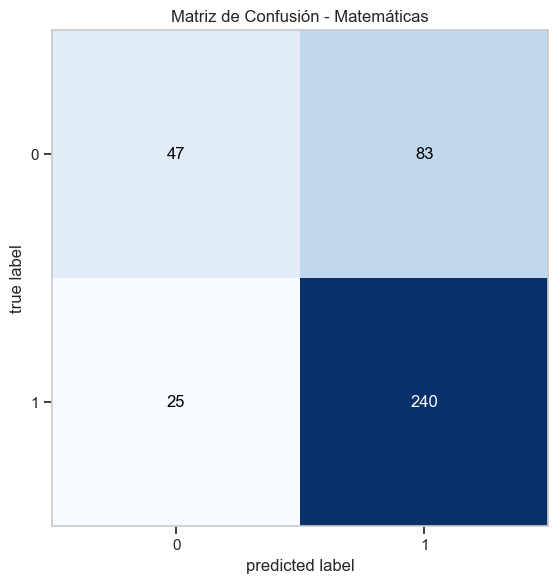

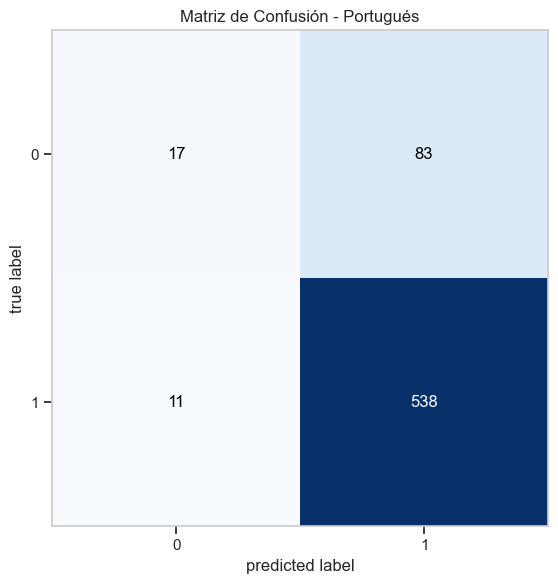

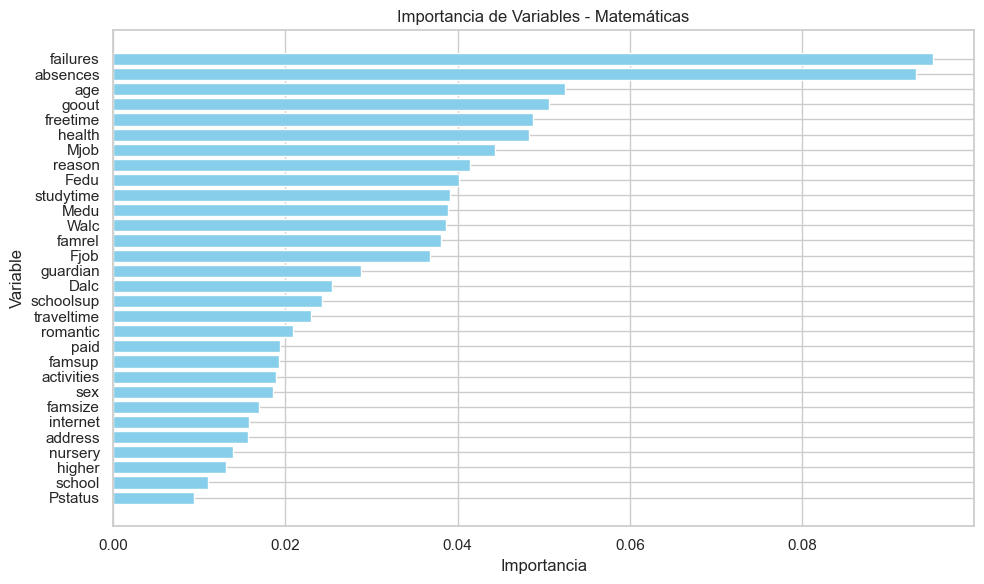

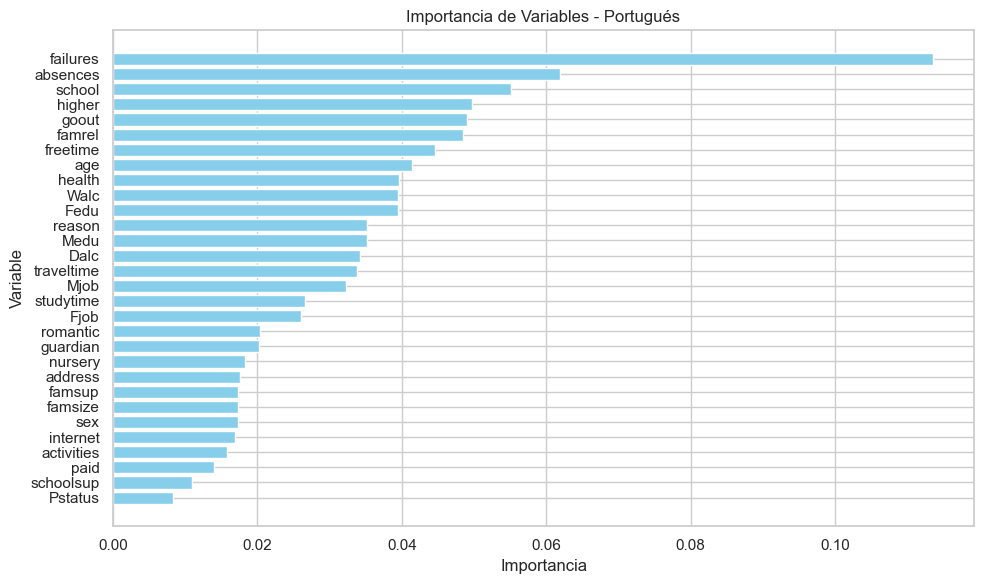

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix  # Nota: Esta es la función correcta

# Leer los datos
d1 = pd.read_csv("data/student-mat.csv", sep=";")
d2 = pd.read_csv("data/student-por.csv", sep=";")


data1 = d1.copy()
data2 = d2.copy()

# Crear variables objetivo binaria
data1["pasa_mate"] = (data1["G3"] >= 10).astype(int)
data2["pasa_port"] = (data2["G3"] >= 10).astype(int)

# Eliminar columnas de notas
data_clean1 = data1.drop(columns=["G1", "G2", "G3"])
data_clean2 = data2.drop(columns=["G1", "G2", "G3"])

# Codificar variables categóricas
data_encoded1 = data_clean1.copy()
data_encoded2 = data_clean2.copy()

for col in data_encoded1.select_dtypes(include="object").columns:
    data_encoded1[col] = LabelEncoder().fit_transform(data_encoded1[col])
    
for col in data_encoded2.select_dtypes(include="object").columns:
    data_encoded2[col] = LabelEncoder().fit_transform(data_encoded2[col])

# Separar variables predictoras y objetivo
X1 = data_encoded1.drop(columns="pasa_mate")
y1 = data_encoded1["pasa_mate"]

X2 = data_encoded2.drop(columns="pasa_port")
y2 = data_encoded2["pasa_port"]

# Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=20)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Evaluar para Matemáticas
accuracy_scores_1 = cross_val_score(modelo, X1, y1, cv=cv, scoring='accuracy')
auc_scores_1 = cross_val_score(modelo, X1, y1, cv=cv, scoring='roc_auc')
y1_pred_cv = cross_val_predict(modelo, X1, y1, cv=cv)
conf_matrix1 = confusion_matrix(y1, y1_pred_cv)

# Evaluar para Portugués
accuracy_scores_2 = cross_val_score(modelo, X2, y2, cv=cv, scoring='accuracy')
auc_scores_2 = cross_val_score(modelo, X2, y2, cv=cv, scoring='roc_auc')
y2_pred_cv = cross_val_predict(modelo, X2, y2, cv=cv)
conf_matrix2 = confusion_matrix(y2, y2_pred_cv)

# Resultados
print(f"Acierto promedio Mate : {accuracy_scores_1.mean():.4f}")
print(f"AUC promedio Mate     : {auc_scores_1.mean():.4f}")
print("Matriz de confusión para Mate:")
print(conf_matrix1)

print(f"\nAcierto promedio Port : {accuracy_scores_2.mean():.4f}")
print(f"AUC promedio Port     : {auc_scores_2.mean():.4f}")
print("Matriz de confusión para Port:")
print(conf_matrix2)


# 1. Matriz de confusión para Matemáticas
plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), show_normed=False)
plt.title("Matriz de Confusión - Matemáticas")
plt.tight_layout()
plt.show()
plt.close() 

# 2. Matriz de confusión para Portugués 
plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), show_normed=False)
plt.title("Matriz de Confusión - Portugués")
plt.tight_layout()
plt.show()
plt.close()




# 3. Importancia de variables Matemáticas
modelo.fit(X1, y1)  # Ajustar el modelo con los datos de Matemáticas para obtener importancias correctas
importancias = modelo.feature_importances_
variables = X1.columns

bosque_importancias = pd.DataFrame({
    "Feature": variables,
    "Importance": importancias  
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(bosque_importancias["Feature"], bosque_importancias["Importance"], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Variables - Matemáticas')
plt.tight_layout()
plt.show()
plt.close()


# 4. Importancia de variables Portugués
modelo.fit(X2, y2)  # Ajustar el modelo con los datos de Portugués para obtener importancias correctas
importancias = modelo.feature_importances_
variables = X2.columns

bosque_importancias = pd.DataFrame({
    "Feature": variables,
    "Importance": importancias  
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(bosque_importancias["Feature"], bosque_importancias["Importance"], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Variables - Portugués')
plt.tight_layout()
plt.show()
plt.close()

## Árbol de decisión

Acierto promedio Mate : 0.5772
AUC promedio Mate     : 0.5262
Matriz de confusión para Mate:
[[ 49  81]
 [ 86 179]]

Acierto promedio Port : 0.8074
AUC promedio Port     : 0.6817
Matriz de confusión para Port:
[[ 50  50]
 [ 75 474]]


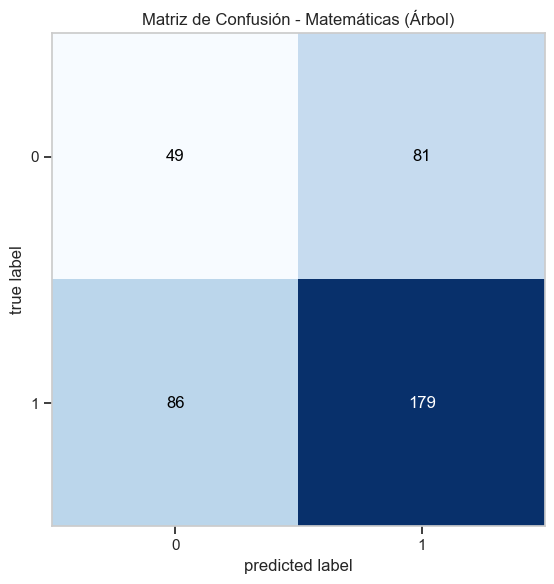

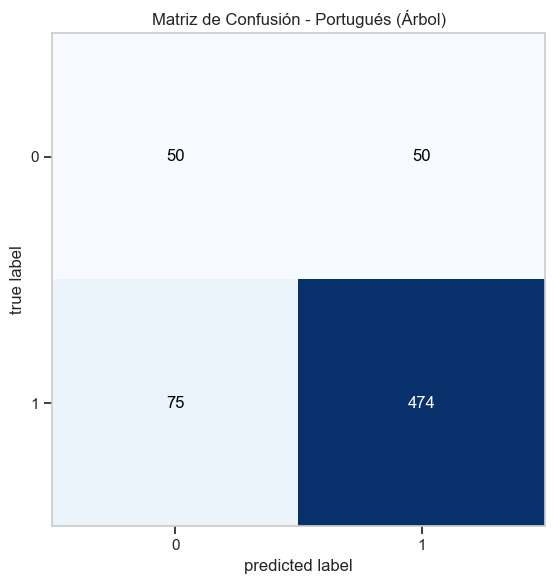

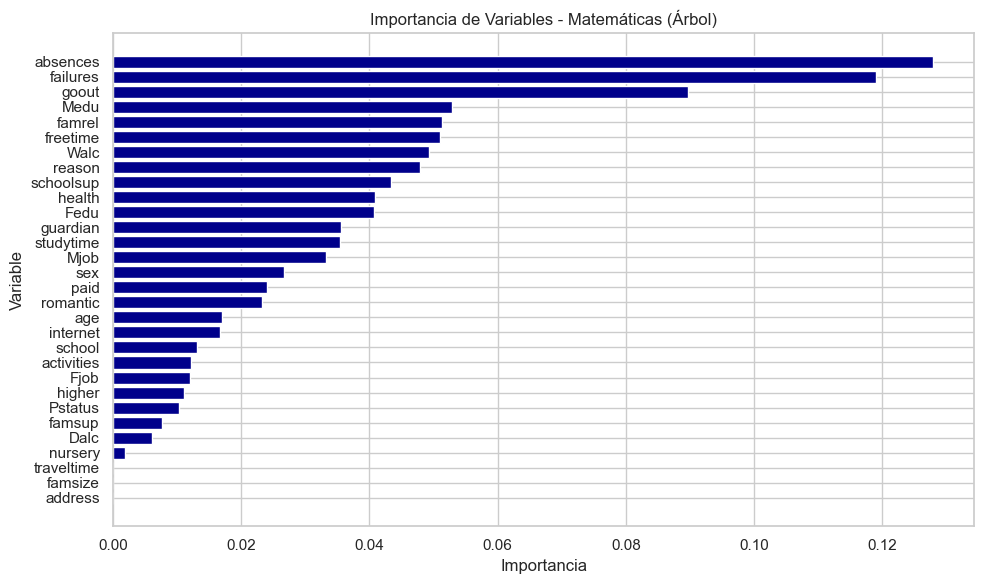

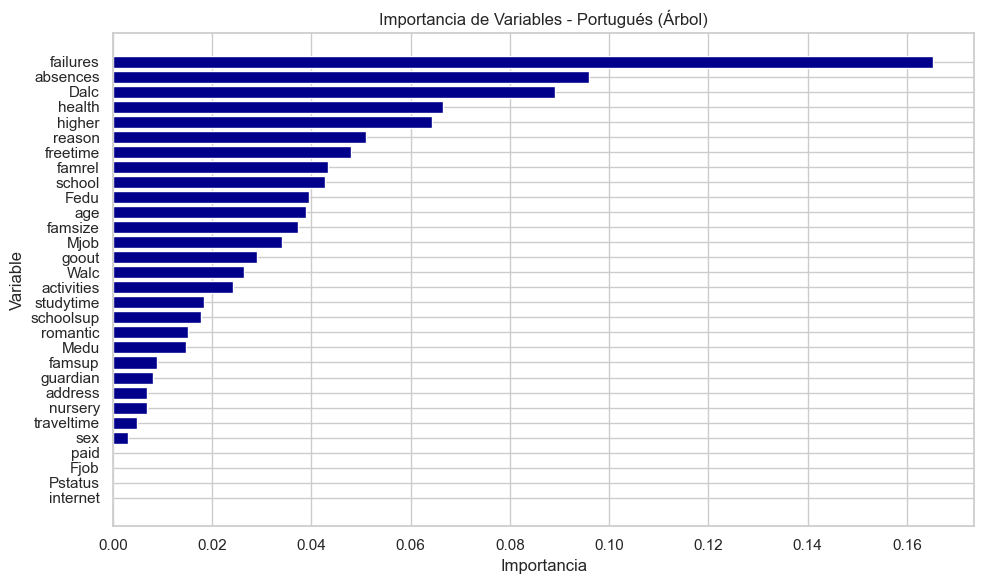

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix

# Leer datos
d1 = pd.read_csv("data/student-mat.csv", sep=";")
d2 = pd.read_csv("data/student-por.csv", sep=";")

data1 = d1.copy()
data2 = d2.copy()

# Variable binaria objetivo
data1["pasa_mate"] = (data1["G3"] >= 10).astype(int)
data2["pasa_port"] = (data2["G3"] >= 10).astype(int)

# Eliminar columnas de notas
data_clean1 = data1.drop(columns=["G1", "G2", "G3"])
data_clean2 = data2.drop(columns=["G1", "G2", "G3"])

# Codificar variables categóricas
for col in data_clean1.select_dtypes(include="object").columns:
    data_clean1[col] = LabelEncoder().fit_transform(data_clean1[col])

for col in data_clean2.select_dtypes(include="object").columns:
    data_clean2[col] = LabelEncoder().fit_transform(data_clean2[col])

# Separar variables predictoras y objetivo
X1 = data_clean1.drop(columns="pasa_mate")
y1 = data_clean1["pasa_mate"]
X2 = data_clean2.drop(columns="pasa_port")
y2 = data_clean2["pasa_port"]

# Modelo de Árbol de Decisión
modelo = DecisionTreeClassifier(random_state=20, max_depth=None)  # max_depth=None -> árbol sin poda
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Evaluar Matemáticas
accuracy_scores_1 = cross_val_score(modelo, X1, y1, cv=cv, scoring='accuracy')
auc_scores_1 = cross_val_score(modelo, X1, y1, cv=cv, scoring='roc_auc')
y1_pred_cv = cross_val_predict(modelo, X1, y1, cv=cv)
conf_matrix1 = confusion_matrix(y1, y1_pred_cv)

# Evaluar Portugués
accuracy_scores_2 = cross_val_score(modelo, X2, y2, cv=cv, scoring='accuracy')
auc_scores_2 = cross_val_score(modelo, X2, y2, cv=cv, scoring='roc_auc')
y2_pred_cv = cross_val_predict(modelo, X2, y2, cv=cv)
conf_matrix2 = confusion_matrix(y2, y2_pred_cv)

# Resultados
print(f"Acierto promedio Mate : {accuracy_scores_1.mean():.4f}")
print(f"AUC promedio Mate     : {auc_scores_1.mean():.4f}")
print("Matriz de confusión para Mate:")
print(conf_matrix1)

print(f"\nAcierto promedio Port : {accuracy_scores_2.mean():.4f}")
print(f"AUC promedio Port     : {auc_scores_2.mean():.4f}")
print("Matriz de confusión para Port:")
print(conf_matrix2)

# Matriz de confusión gráficas
plot_confusion_matrix(conf_mat=conf_matrix1, figsize=(6, 6), show_normed=False)
plt.title("Matriz de Confusión - Matemáticas (Árbol)")
plt.tight_layout()
plt.show()

plot_confusion_matrix(conf_mat=conf_matrix2, figsize=(6, 6), show_normed=False)
plt.title("Matriz de Confusión - Portugués (Árbol)")
plt.tight_layout()
plt.show()

# Importancia de variables Matemáticas
modelo.fit(X1, y1)
importancias = modelo.feature_importances_
variables = X1.columns

arbol_importancias = pd.DataFrame({
    "Feature": variables,
    "Importance": importancias
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(arbol_importancias["Feature"], arbol_importancias["Importance"], color='darkblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Variables - Matemáticas (Árbol)')
plt.tight_layout()
plt.show()

# Importancia de variables Portugués
modelo.fit(X2, y2)
importancias = modelo.feature_importances_
variables = X2.columns

arbol_importancias = pd.DataFrame({
    "Feature": variables,
    "Importance": importancias
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(arbol_importancias["Feature"], arbol_importancias["Importance"], color='darkblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de Variables - Portugués (Árbol)')
plt.tight_layout()
plt.show()
